![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/00.SparkNLP_for_OpenSource_3h_Notebook.ipynb)

# Spark NLP Open Source Workshop - 3 hr

📚 This is the 3 hr workshop version of the entire training notebooks :
[Spark NLP Open Source](https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/open-source-nlp)


**`Additional blogposts and videos:`**

📍 [An intro article for Spark NLP](https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59)



📍 [1-How to start Spark NLP in 2 weeks](https://towardsdatascience.com/how-to-get-started-with-sparknlp-in-2-weeks-cb47b2ba994d)

📍 [2-How to start Spark NLP in 2 weeks](https://towardsdatascience.com/how-to-wrap-your-head-around-spark-nlp-a6f6a968b7e8)


📍 [1-Article for NER and text classification in Spark NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

📍 [2-Article for NER and text classification in Spark NLP](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

📍 [3-Article for NER and text classification in Spark NLP](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32)

📍[A webinar to show how to train a NER model from scratch (90 min)](https://www.youtube.com/watch?v=djWX0MR2Ooo)


📍[Workshop repo that you can start playing with Spark NLP in Colab](https://github.com/JohnSnowLabs/spark-nlp-workshop/tree/master/open-source-nlp)

(you will also see Databricks notebook under each folder)



# 🎬 Colab Setup

In [ ]:
!pip install -q pyspark==3.4.1 spark-nlp==5.1.2
!pip install -q spark-nlp-display

In [2]:
import sparknlp

from sparknlp.base import *
from sparknlp.annotator import *

from pyspark.ml import Pipeline
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col

import pandas as pd

spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 5.1.2
Apache Spark version: 3.4.1


# 📍 Spark NLP Basics and Pretrained Pipelines

📚 For more user experience and information, check out this notebooks : [SparkNLP_Basics](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/01.0.SparkNLP_Basics.ipynb)




In [ ]:
from sparknlp.pretrained import ResourceDownloader
ResourceDownloader.showPublicPipelines(lang="en")

+---------------------------------------------------------------------------------------------------------------+------+---------+
| Pipeline                                                                                                      | lang | version |
+---------------------------------------------------------------------------------------------------------------+------+---------+
| dependency_parse                                                                                              |  en  | 2.0.2   |
| check_spelling                                                                                                |  en  | 2.1.0   |
| match_datetime                                                                                                |  en  | 2.1.0   |
| match_pattern                                                                                                 |  en  | 2.1.0   |
| clean_pattern                                                                    


⛓️[You can find all these models and more NLP Models Hub](https://nlp.johnsnowlabs.com/models)

## 🚩 NER Pretrained Pipeline

**✔︎ Explain Document DL**

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline_dl = PretrainedPipeline('explain_document_dl', lang='en')


explain_document_dl download started this may take some time.
Approx size to download 168 MB
[OK!]


In [ ]:
pipeline_dl.model.stages

[document_7939d5bf1083,
 SENTENCE_05265b07c745,
 REGEX_TOKENIZER_b3f969d18fa3,
 SPELL_e4ea67180337,
 LEMMATIZER_c62ad8f355f9,
 STEMMER_ba49f7631065,
 POS_d01c734956fe,
 WORD_EMBEDDINGS_MODEL_48cffc8b9a76,
 NerDLModel_d4424c9af5f4,
 NER_CONVERTER_a81db9af2d23]

In [ ]:
testDoc = '''
Peter is a very good persn.
My life in Russia is very intersting.
John and Peter are brthers. However they don't support each other that much.
Lucas Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = pipeline_dl.annotate(testDoc)


In [ ]:
result.keys()

dict_keys(['entities', 'stem', 'checked', 'lemma', 'document', 'pos', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
result['entities']

['Peter', 'Russia', 'John', 'Peter', 'Lucas Dunbercker', 'Europe']

In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 100)

df = pd.DataFrame({'token':result['token'],
                   'ner_label':result['ner'],
                   'spell_corrected':result['checked'],
                   'POS':result['pos'],
                   'lemmas':result['lemma'],
                   'stems':result['stem']})

df

token ner_label spell_corrected   POS      lemmas     stems
0        Peter     B-PER           Peter   NNP       Peter     peter
1           is         O              is   VBZ          be         i
2            a         O               a    DT           a         a
3         very         O            very    RB        very      veri
4         good         O            good    JJ        good      good
5        persn         O          person    NN      person    person
6            .         O               .     .           .         .
7           My         O              My  PRP$          My        my
8         life         O            life    NN        life      life
9           in         O              in    IN          in        in
10      Russia     B-LOC          Russia   NNP      Russia    russia
11          is         O              is   VBZ          be         i
12        very         O            very    RB        very      veri
13  intersting         O     interesting   VBG    interest  interest
14           .         O               .     .           .         .
15        John     B-PER            John   NNP        John      john
16         and         O             and    CC         and       and
17       Peter     B-PER           Peter   NNP       Peter     peter
18         are         O             are   VBP          be        ar
19     brthers         O        brothers   NNS     brother   brother
20           .         O               .     .           .         .
21     However         O         However    RB     However     howev
22        they         O            they   PRP        they      thei
23       don't         O           don't   VBP       don't     don't
24     support         O         support    VB     support   support
25        each         O            each    DT        each      each
26       other         O           other    JJ       other     other
27        that         O            that    IN        that      that
28        much         O            much    JJ        much      much
29           .         O               .     .           .         .
30       Lucas     B-PER           Lucas   NNP       Lucas      luca
31  Dunbercker     I-PER      Dunbercker   NNP  Dunbercker  dunberck
32          is         O              is   VBZ          be         i
33          no         O              no    DT          no        no
34      longer         O          longer    RB        long    longer
35       happy         O           happy    JJ       happy     happi
36           .         O               .     .           .         .
37          He         O              He   PRP          He        he
38         has         O             has   VBZ        have        ha
39           a         O               a    DT           a         a
40        good         O            good    JJ        good      good
41         car         O             car    NN         car       car
42      though         O          though    IN      though    though
43           .         O               .     .           .         .
44      Europe     B-LOC          Europe   NNP      Europe     europ
45          is         O              is   VBZ          be         i
46        very         O            very    RB        very      veri
47     culture         O         culture    RB     culture    cultur
48        rich         O            rich    JJ        rich      rich
49           .         O               .     .           .         .
50       There         O           There    EX       There     there
51         are         O             are   VBP          be        ar
52        huge         O            huge    JJ        huge      huge
53    churches         O        churches   NNS      church    church
54           !         O               !     .           !         !
55         and         O             and    CC         and       and
56         big         O             big    JJ         big       big
57     

 ***✔︎ Using fullAnnotate to get more details***



In [ ]:
detailed_result = pipeline_dl.fullAnnotate(testDoc)

detailed_result[0]['entities']

[Annotation(chunk, 1, 5, Peter, {'entity': 'PER', 'sentence': '0', 'chunk': '0'}, []),
 Annotation(chunk, 40, 45, Russia, {'entity': 'LOC', 'sentence': '1', 'chunk': '1'}, []),
 Annotation(chunk, 67, 70, John, {'entity': 'PER', 'sentence': '2', 'chunk': '2'}, []),
 Annotation(chunk, 76, 80, Peter, {'entity': 'PER', 'sentence': '2', 'chunk': '3'}, []),
 Annotation(chunk, 144, 159, Lucas Dunbercker, {'entity': 'PER', 'sentence': '4', 'chunk': '4'}, []),
 Annotation(chunk, 207, 212, Europe, {'entity': 'LOC', 'sentence': '6', 'chunk': '5'}, [])]

In [ ]:
chunks=[]
entities=[]

for n in detailed_result[0]['entities']:
  chunks.append(n.result)
  entities.append(n.metadata['entity'])

df = pd.DataFrame({'chunks':chunks, 'entities':entities})
df

chunks entities
0             Peter      PER
1            Russia      LOC
2              John      PER
3             Peter      PER
4  Lucas Dunbercker      PER
5            Europe      LOC

In [ ]:
tuples = []

for x,y,z in zip(detailed_result[0]["token"], detailed_result[0]["pos"], detailed_result[0]["ner"]):
  tuples.append((int(x.metadata['sentence']), x.result, x.begin, x.end, y.result, z.result))

df = pd.DataFrame(tuples, columns=['sent_id','token','start','end','pos', 'ner'])

df.head(15)


sent_id       token  start  end   pos    ner
0         0       Peter      1    5   NNP  B-PER
1         0          is      7    8   VBZ      O
2         0           a     10   10    DT      O
3         0        very     12   15    RB      O
4         0        good     17   20    JJ      O
5         0       persn     22   26    NN      O
6         0           .     27   27     .      O
7         1          My     29   30  PRP$      O
8         1        life     32   35    NN      O
9         1          in     37   38    IN      O
10        1      Russia     40   45   NNP  B-LOC
11        1          is     47   48   VBZ      O
12        1        very     50   53    RB      O
13        1  intersting     55   64   VBG      O
14        1           .     65   65     .      O

## 🚩 Clean Stop Words Pretrained Pipeline

In [ ]:
clean_stop = PretrainedPipeline('clean_stop', lang='en')

clean_stop download started this may take some time.
Approx size to download 13.8 KB
[OK!]


In [ ]:
clean_stop.model.stages # clean stop pipeline stages

[document_90b4be8a6e0b,
 SENTENCE_8ba1e4f73af0,
 REGEX_TOKENIZER_8af63c5a17f5,
 STOPWORDS_CLEANER_b5d381c851f5]

In [ ]:
result = clean_stop.annotate(testDoc)
result.keys()

dict_keys(['document', 'sentence', 'token', 'cleanTokens'])

In [ ]:
' '.join(result['cleanTokens'])

"Peter good persn . life Russia intersting . John Peter brthers . don't support . Lucas Dunbercker longer happy . good car . Europe culture rich . huge churches ! big houses !"

## 🚩 Spell Checker Pretrained Pipeline




📌 [Applying Context Aware Spell Checking in Spark NLP](https://medium.com/spark-nlp/applying-context-aware-spell-checking-in-spark-nlp-3c29c46963bc)

📌 [Norvig Algo](https://norvig.com/spell-correct.html)

In [ ]:
spell_checker = PretrainedPipeline('check_spelling', lang='en')

check_spelling download started this may take some time.
Approx size to download 884.9 KB
[OK!]


In [ ]:
testDoc = '''
Peter is a very good persn.
My lifee in Russia is very intersting.
John and Peter are brthers. However they don't support each other that much.
Lucas Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!
'''

result = spell_checker.annotate(testDoc)

result.keys()

dict_keys(['document', 'sentence', 'token', 'checked'])

In [ ]:
list(zip(result['token'], result['checked']))

[('Peter', 'Peter'),
 ('is', 'is'),
 ('a', 'a'),
 ('very', 'very'),
 ('good', 'good'),
 ('persn', 'person'),
 ('.', '.'),
 ('My', 'My'),
 ('lifee', 'life'),
 ('in', 'in'),
 ('Russia', 'Russia'),
 ('is', 'is'),
 ('very', 'very'),
 ('intersting', 'interesting'),
 ('.', '.'),
 ('John', 'John'),
 ('and', 'and'),
 ('Peter', 'Peter'),
 ('are', 'are'),
 ('brthers', 'brothers'),
 ('.', '.'),
 ('However', 'However'),
 ('they', 'they'),
 ("don't", "don't"),
 ('support', 'support'),
 ('each', 'each'),
 ('other', 'other'),
 ('that', 'that'),
 ('much', 'much'),
 ('.', '.'),
 ('Lucas', 'Lucas'),
 ('Dunbercker', 'Dunbercker'),
 ('is', 'is'),
 ('no', 'no'),
 ('longer', 'longer'),
 ('happy', 'happy'),
 ('.', '.'),
 ('He', 'He'),
 ('has', 'has'),
 ('a', 'a'),
 ('good', 'good'),
 ('car', 'car'),
 ('though', 'though'),
 ('.', '.'),
 ('Europe', 'Europe'),
 ('is', 'is'),
 ('very', 'very'),
 ('culture', 'culture'),
 ('rich', 'rich'),
 ('.', '.'),
 ('There', 'There'),
 ('are', 'are'),
 ('huge', 'huge'),
 ('ch

## 🚩 Sentiment Analysis Pretrained Pipeline



📌[Fast and accurate sentiment classification using an enhanced Naive Bayes model](https://arxiv.org/abs/1305.6143)

📌[vivek algo-code](https://github.com/vivekn/sentiment)


In [ ]:
sentiment = PretrainedPipeline('analyze_sentiment', lang='en')

analyze_sentiment download started this may take some time.
Approx size to download 4.8 MB
[OK!]


In [ ]:
result = sentiment.annotate("The movie I watched today was not a good one")

result['sentiment']

['negative']

***✔︎ DL version:***


*   Trained on imdb




In [ ]:
sentiment_imdb_glove = PretrainedPipeline('analyze_sentimentdl_glove_imdb', lang='en')

analyze_sentimentdl_glove_imdb download started this may take some time.
Approx size to download 154.1 MB
[OK!]


In [ ]:
comment = '''
It's a very scary film but what impressed me was how true the film sticks to the original's tricks; it isn't filled with loud in-your-face jump scares, in fact, a lot of what makes this film scary is the slick cinematography and intricate shadow play. The use of lighting and creation of atmosphere is what makes this film so tense, which is why it's perfectly suited for those who like Horror movies but without the obnoxious gore.
'''
result = sentiment_imdb_glove.annotate(comment)
result['sentiment']

['pos']

In [ ]:
sentiment_imdb_glove.fullAnnotate(comment)[0]['sentiment']

[Annotation(category, 0, 433, pos, {'sentence': '0', 'pos': '0.98675287', 'neg': '0.013247096'}, [])]

# 📍Annotators and Transformer Concepts


📚 For more user experience and information, check out this notebooks:



- [Text_Preprocessing_with_SparkNLP_Annotators_Transformers](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/02.0.Text_Preprocessing_with_SparkNLP_Annotators_Transformers.ipynb)


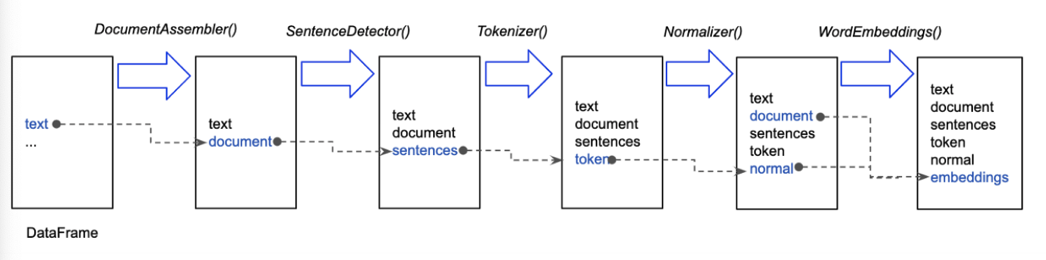

📌 [Introduction to Spark NLP: Foundations and Basic Components](https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59)


**📌 Transformers**

📌 In Spark NLP, we have five different transformers that are mainly used for getting the data in or transform the data from one AnnotatorType to another. Here is the list of transformers:

* **DocumentAssembler :** To get through the NLP process, we need to get raw data
annotated. This is a special transformer that does this for us; it creates the first annotation of type Document which may be used by annotators down the road.

* **TokenAssembler :** This transformer reconstructs a Document type annotation from tokens, usually after these have been, lemmatized, normalized, spell checked, etc, to use this document annotation in further annotators.

* **Doc2Chunk :** Converts DOCUMENT type annotations into CHUNK type with the contents of a chunkCol.

* **Chunk2Doc :** Converts a CHUNK type column back into DOCUMENT. Useful when trying to re-tokenize or do further analysis on a CHUNK result.

* **Finisher :** Once we have our NLP pipeline ready to go, we might want to use our annotation results somewhere else where it is easy to use. The Finisher outputs annotation(s) values into a string.

📌 In Spark NLP, we have the following types:

`Document`, `token`, `chunk`, `pos`, `word_embeddings`, `date`, `entity`, `sentiment`, `named_entity`, `dependency`, `labeled_dependency`.

***✔︎ Create Spark Dataframe:***

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/examples/python/annotation/text/english/spark-nlp-basics/sample-sentences-en.txt

In [ ]:
with open('./sample-sentences-en.txt') as f:
  print (f.read())

Peter is a very good person.
My life in Russia is very interesting.
John and Peter are brothers. However they don't support each other that much.
Lucas Nogal Dunbercker is no longer happy. He has a good car though.
Europe is very culture rich. There are huge churches! and big houses!


In [ ]:
spark_df = spark.read.text('./sample-sentences-en.txt').toDF('text')

spark_df.select('text').show(truncate=False)

+-----------------------------------------------------------------------------+
|text                                                                         |
+-----------------------------------------------------------------------------+
|Peter is a very good person.                                                 |
|My life in Russia is very interesting.                                       |
|John and Peter are brothers. However they don't support each other that much.|
|Lucas Nogal Dunbercker is no longer happy. He has a good car though.         |
|Europe is very culture rich. There are huge churches! and big houses!        |
+-----------------------------------------------------------------------------+



In [ ]:
textFiles = spark.sparkContext.wholeTextFiles("./*.txt",4)

spark_df_folder = textFiles.toDF(schema=['path','text'])

spark_df_folder.show(truncate=30)

+------------------------------+------------------------------+
|                          path|                          text|
+------------------------------+------------------------------+
|file:/content/sample-senten...|Peter is a very good person...|
+------------------------------+------------------------------+



In [ ]:
spark_df_folder.select('text').take(1)

[Row(text="Peter is a very good person.\nMy life in Russia is very interesting.\nJohn and Peter are brothers. However they don't support each other that much.\nLucas Nogal Dunbercker is no longer happy. He has a good car though.\nEurope is very culture rich. There are huge churches! and big houses!")]

In [ ]:
spark_df_folder.select('text').collect()

[Row(text="Peter is a very good person.\nMy life in Russia is very interesting.\nJohn and Peter are brothers. However they don't support each other that much.\nLucas Nogal Dunbercker is no longer happy. He has a good car though.\nEurope is very culture rich. There are huge churches! and big houses!")]

In [ ]:
spark_df.show(truncate=False)

+-----------------------------------------------------------------------------+
|text                                                                         |
+-----------------------------------------------------------------------------+
|Peter is a very good person.                                                 |
|My life in Russia is very interesting.                                       |
|John and Peter are brothers. However they don't support each other that much.|
|Lucas Nogal Dunbercker is no longer happy. He has a good car though.         |
|Europe is very culture rich. There are huge churches! and big houses!        |
+-----------------------------------------------------------------------------+



## 🚩 Document Assembler



📌 To get through the process in Spark NLP, we need to get raw data transformed into Document type at first.

DocumentAssembler() is a special transformer that does this for us; it creates the first annotation of type Document which may be used by annotators down the road.

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")\
    .setCleanupMode("shrink")

doc_df = documentAssembler.transform(spark_df)

doc_df.show(truncate=False)

+-----------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+
|text                                                                         |document                                                                                                               |
+-----------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+
|Peter is a very good person.                                                 |[{document, 0, 27, Peter is a very good person., {sentence -> 0}, []}]                                                 |
|My life in Russia is very interesting.                                       |[{document, 0, 37, My life in Russia is very interesting., {sentence -> 0}, []}]                                       |


In [ ]:
doc_df.select('document.result','document.begin','document.end').show(truncate=False)

+-------------------------------------------------------------------------------+-----+----+
|result                                                                         |begin|end |
+-------------------------------------------------------------------------------+-----+----+
|[Peter is a very good person.]                                                 |[0]  |[27]|
|[My life in Russia is very interesting.]                                       |[0]  |[37]|
|[John and Peter are brothers. However they don't support each other that much.]|[0]  |[76]|
|[Lucas Nogal Dunbercker is no longer happy. He has a good car though.]         |[0]  |[67]|
|[Europe is very culture rich. There are huge churches! and big houses!]        |[0]  |[68]|
+-------------------------------------------------------------------------------+-----+----+



In [ ]:
doc_df.withColumn(
    "tmp",
    F.explode("document"))\
    .select("tmp.*")\
    .show(truncate=False)

+-------------+-----+---+-----------------------------------------------------------------------------+---------------+----------+
|annotatorType|begin|end|result                                                                       |metadata       |embeddings|
+-------------+-----+---+-----------------------------------------------------------------------------+---------------+----------+
|document     |0    |27 |Peter is a very good person.                                                 |{sentence -> 0}|[]        |
|document     |0    |37 |My life in Russia is very interesting.                                       |{sentence -> 0}|[]        |
|document     |0    |76 |John and Peter are brothers. However they don't support each other that much.|{sentence -> 0}|[]        |
|document     |0    |67 |Lucas Nogal Dunbercker is no longer happy. He has a good car though.         |{sentence -> 0}|[]        |
|document     |0    |68 |Europe is very culture rich. There are huge churches! and 

## 🚩 Sentence Detector



📌 Finds sentence bounds in raw text.

In [ ]:
# we feed the document column coming from Document Assembler

sentenceDetector = SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentences')

In [ ]:
text ='The patient was prescribed 1 capsule of Advil for 5 days. He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night, 12 units of insulin lispro with meals, and metformin 1000 mg two times a day. It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months.'

spark_df = spark.createDataFrame([[text]]).toDF("text")
spark_df.show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                                                                                                                                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
doc_df = documentAssembler.transform(spark_df)

sent_df = sentenceDetector.transform(doc_df)

sent_df.show(truncate=50)

+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                              text|                                          document|                                         sentences|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|The patient was prescribed 1 capsule of Advil f...|[{document, 0, 334, The patient was prescribed ...|[{document, 0, 56, The patient was prescribed 1...|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+



In [ ]:
sent_df.select('sentences.result').take(1)

[Row(result=['The patient was prescribed 1 capsule of Advil for 5 days.', 'He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night, 12 units of insulin lispro with meals, and metformin 1000 mg two times a day.', 'It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months.'])]

In [ ]:
# setExplodeSentences: Whether to split sentences into different Dataset rows. Useful for higher parallelism in fat rows. Defaults to false.
sentenceDetector.setExplodeSentences(True)

sent_df = sentenceDetector.transform(doc_df)
sent_df.show(truncate=50)

+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                              text|                                          document|                                         sentences|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|The patient was prescribed 1 capsule of Advil f...|[{document, 0, 334, The patient was prescribed ...|[{document, 0, 56, The patient was prescribed 1...|
|The patient was prescribed 1 capsule of Advil f...|[{document, 0, 334, The patient was prescribed ...|[{document, 58, 240, He was seen by the endocri...|
|The patient was prescribed 1 capsule of Advil f...|[{document, 0, 334, The patient was prescribed ...|[{document, 242, 334, It was determined that al...|
+--------------------------------------------------+------------------

In [ ]:
sent_df.select(F.explode('sentences.result')).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|col                                                                                                                                                                                    |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|The patient was prescribed 1 capsule of Advil for 5 days.                                                                                                                              |
|He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night, 12 units of insulin lispro with meals, and metformin 1000 mg two times a day.|
|It was determined that all SGLT2 inhibitors should be discontinued in

## 🚩 Sentence Detector DL

In [ ]:
documenter = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentences')\

sentencerDL = SentenceDetectorDLModel\
    .pretrained("sentence_detector_dl", "en") \
    .setInputCols(["document"]) \
    .setOutputCol("sentences")


sd_pipeline = PipelineModel(stages=[documenter, sentenceDetector])
sendetec_model = LightPipeline(sd_pipeline)


# DL version
sd_dl_pipeline = PipelineModel(stages=[documenter, sentencerDL])
sentdetec_dl_model = LightPipeline(sd_dl_pipeline)

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [ ]:
text = """John loves Mary.Mary loves Peter
Peter loves Helen .Helen loves John;
Total: four people involved."""

In [ ]:
# sd_model
for anno in sendetec_model.fullAnnotate(text)[0]["sentences"]:
    print("{}\t{}\t{}\t{}".format(
        anno.metadata["sentence"], anno.begin, anno.end, anno.result))

0	0	51	John loves Mary.Mary loves Peter
Peter loves Helen .
1	52	68	Helen loves John;
2	70	97	Total: four people involved.


In [ ]:
# sd_dl_model
for anno in sentdetec_dl_model.fullAnnotate(text)[0]["sentences"]:
    print("{}\t{}\t{}\t{}".format(
        anno.metadata["sentence"], anno.begin, anno.end, anno.result))

0	0	15	John loves Mary.
1	16	31	Mary loves Peter
2	33	51	Peter loves Helen .
3	52	68	Helen loves John;
4	70	97	Total: four people involved.


## 🚩 Tokenizer



📌 Identifies tokens with tokenization open standards. It is an Annotator Approach, so it requires .fit().

In [ ]:
text = 'Peter Parker (Spiderman) is a nice guy and lives in New York but has no e-mail!'
spark_df = spark.createDataFrame([[text]]).toDF("text")

In [4]:
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token") \
    .setSplitChars(['-']) \
    .setContextChars(['?', '!']) \
    .addException("New York")


In [ ]:
doc_df = documentAssembler.transform(spark_df)

token_df = tokenizer.fit(doc_df).transform(doc_df)

token_df.show(truncate=100)

+-------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                           text|                                                                                            document|                                                                                               token|
+-------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|Peter Parker (Spiderman) is a nice guy and lives in New York but has no e-mail!|[{document, 0, 78, Peter Parker (Spiderman) is a nice guy and lives

In [ ]:
token_df.select('token.result').take(1)

[Row(result=['Peter', 'Parker', '(Spiderman)', 'is', 'a', 'nice', 'guy', 'and', 'lives', 'in', 'New York', 'but', 'has', 'no', 'e', 'mail', '!'])]

## 🚩 Regex Tokenizer

In [ ]:
pattern = '\\s+|(?=[-.:;"*+,$&?!%\\[\\]\\(\\)\\/])|(?<=[-.:;"*+,$&?!%\\[\\]\\(\\)\\/])'

documenter = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetector()\
    .setInputCols('document')\
    .setOutputCol('sentence')

regexTokenizer = RegexTokenizer() \
    .setInputCols("sentence") \
    .setOutputCol("RegexToken")

#The setPattern parameter should be used to divide the text into tokens according to desired regex patterns.
regexTokenizer_with_pattern = RegexTokenizer() \
    .setInputCols("sentence") \
    .setOutputCol("RegexToken_with_pattern") \
    .setPattern(pattern)

docPatternRemoverPipeline = Pipeline().setStages([documenter,
                                                  sentenceDetector,
                                                  regexTokenizer,
                                                  regexTokenizer_with_pattern])



In [ ]:
content = "1. T1-T2 DATE**[12/24/13] $1.99 () (10/12) ph+ 90% sting? or hi!"

df = spark.createDataFrame([content], StringType()).withColumnRenamed("value", "text")

result = docPatternRemoverPipeline.fit(df).transform(df)
result.selectExpr("RegexToken.result as RegexToken", "RegexToken_with_pattern.result as RegexToken_with_Pattern").show(truncate=False)

+----------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------+
|RegexToken                                                                  |RegexToken_with_Pattern                                                                                                     |
+----------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------+
|[1., T1-T2, DATE**[12/24/13], $1.99, (), (10/12), ph+, 90%, sting?, or, hi!]|[1, ., T1, -, T2, DATE, *, *, [, 12, /, 24, /, 13, ], $, 1, ., 99, (, ), (, 10, /, 12, ), ph, +, 90, %, sting, ?, or, hi, !]|
+----------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------

## 🚩 Normalizer

📌 Removes all dirty characters from text following a regex pattern and transforms words based on a provided dictionary

- `setCleanupPatterns(patterns)`: Regular expressions list for normalization, defaults [^A-Za-z]

- `setLowercase(value)`: lowercase tokens, default false

- `setSlangDictionary(path)`: txt file with delimited words to be transformed into something else

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
spark_df = spark.read.text('./sample-sentences-en.txt').toDF('text')

spark_df.show(truncate=False)

+-----------------------------------------------------------------------------+
|text                                                                         |
+-----------------------------------------------------------------------------+
|Peter is a very good person.                                                 |
|My life in Russia is very interesting.                                       |
|John and Peter are brothers. However they don't support each other that much.|
|Lucas Nogal Dunbercker is no longer happy. He has a good car though.         |
|Europe is very culture rich. There are huge churches! and big houses!        |
+-----------------------------------------------------------------------------+



In [ ]:
from sparknlp.base import *
from sparknlp.annotator import *

documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized")\
    .setLowercase(True)\
    .setCleanupPatterns(["[^\w\d\s]"]) # remove punctuations (keep alphanumeric chars)
    # if we don't set CleanupPatterns, it will only keep alphabet letters ([^A-Za-z])

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        normalizer])

result = nlpPipeline.fit(spark_df).transform(spark_df)

In [ ]:
result.select('token').take(2)

[Row(token=[Row(annotatorType='token', begin=0, end=4, result='Peter', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=6, end=7, result='is', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=9, end=9, result='a', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=11, end=14, result='very', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=16, end=19, result='good', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=21, end=26, result='person', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=27, end=27, result='.', metadata={'sentence': '0'}, embeddings=[])]),
 Row(token=[Row(annotatorType='token', begin=0, end=1, result='My', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=3, end=6, result='life', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=8, end=9, result='in',

In [ ]:
result.select('normalized.result').take(2)

[Row(result=['peter', 'is', 'a', 'very', 'good', 'person']),
 Row(result=['my', 'life', 'in', 'russia', 'is', 'very', 'interesting'])]

In [ ]:
result.select('normalized').take(2)

[Row(normalized=[Row(annotatorType='token', begin=0, end=4, result='peter', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=6, end=7, result='is', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=9, end=9, result='a', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=11, end=14, result='very', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=16, end=19, result='good', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=21, end=26, result='person', metadata={'sentence': '0'}, embeddings=[])]),
 Row(normalized=[Row(annotatorType='token', begin=0, end=1, result='my', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=3, end=6, result='life', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=8, end=9, result='in', metadata={'sentence': '0'}, embeddings=[]), Row(annotatorType='token', begin=11, end=16, r

## 🚩 Document Normalizer

📚 For more user experience and information, check out this notebooks:[Document Normalizer](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/annotation/english/document-normalizer/document_normalizer_notebook.ipynb)

📌 The DocumentNormalizer is an annotator that can be used after the DocumentAssembler to narmalize documents once that they have been processed and indexed

In [ ]:
text = '''
  <div id="theworldsgreatest" class='my-right my-hide-small my-wide toptext' style="font-family:'Segoe UI',Arial,sans-serif">
    THE WORLD'S LARGEST WEB DEVELOPER SITE
    <h1 style="font-size:300%;">THE WORLD'S LARGEST WEB DEVELOPER SITE</h1>
    <p style="font-size:160%;">Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum..</p>
  </div>

</div>'''


spark_df = spark.createDataFrame([[text]]).toDF("text")

spark_df.show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                

In [ ]:
documentNormalizer = DocumentNormalizer() \
    .setInputCols("document") \
    .setOutputCol("normalizedDocument")

documentNormalizer.extractParamMap()

{Param(parent='DocumentNormalizer_cb03f1cf8363', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='DocumentNormalizer_cb03f1cf8363', name='action', doc='action to perform applying regex patterns on text'): 'clean',
 Param(parent='DocumentNormalizer_cb03f1cf8363', name='patterns', doc='normalization regex patterns which match will be removed from document. Defaults is <[^>]*>'): ['<[^>]*>'],
 Param(parent='DocumentNormalizer_cb03f1cf8363', name='replacement', doc='replacement string to apply when regexes match'): ' ',
 Param(parent='DocumentNormalizer_cb03f1cf8363', name='lowercase', doc='whether to convert strings to lowercase'): False,
 Param(parent='DocumentNormalizer_cb03f1cf8363', name='policy', doc='policy to remove pattern from text'): 'pretty_all',
 Param(parent='DocumentNormalizer_cb03f1cf8363', name='encoding', doc='file encoding to apply on normalized documents'): 'UTF-8',
 Param(parent='DocumentNormalizer_cb03f

In [ ]:
documentAssembler = DocumentAssembler() \
    .setInputCol('text') \
    .setOutputCol('document')

#default
cleanUpPatterns = ["<[^>]*>"]

documentNormalizer = DocumentNormalizer() \
    .setInputCols("document") \
    .setOutputCol("normalizedDocument") \
    .setAction("clean") \
    .setPatterns(cleanUpPatterns) \
    .setReplacement(" ") \
    .setPolicy("pretty_all") \
    .setLowercase(True)

docPatternRemoverPipeline = Pipeline() \
    .setStages([documentAssembler,
                documentNormalizer])

pipelineModel = docPatternRemoverPipeline.fit(spark_df).transform(spark_df)

In [ ]:
pipelineModel.select('normalizedDocument.result').show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                                                                                                                              

## 🚩 StopWords Cleaner

📌 This annotator excludes from a sequence of strings (e.g. the output of a Tokenizer, Normalizer, Lemmatizer, and Stemmer) and drops all the stop words from the input sequences.

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stopwords_cleaner = StopWordsCleaner()\
      .setInputCols("token")\
      .setOutputCol("cleanTokens")\
      .setCaseSensitive(False)\
      #.setStopWords(["no", "without"]) (e.g. read a list of words from a txt)

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stopwords_cleaner])

In [ ]:
stopwords_cleaner.getStopWords()[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [ ]:
spark_df = spark.read.text('./sample-sentences-en.txt').toDF('text')

result = nlpPipeline.fit(spark_df).transform(spark_df)

result.show(truncate=40)

+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+
|                                    text|                                document|                                   token|                             cleanTokens|
+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+
|            Peter is a very good person.|[{document, 0, 27, Peter is a very go...|[{token, 0, 4, Peter, {sentence -> 0}...|[{token, 0, 4, Peter, {sentence -> 0}...|
|  My life in Russia is very interesting.|[{document, 0, 37, My life in Russia ...|[{token, 0, 1, My, {sentence -> 0}, [...|[{token, 3, 6, life, {sentence -> 0},...|
|John and Peter are brothers. However ...|[{document, 0, 76, John and Peter are...|[{token, 0, 3, John, {sentence -> 0},...|[{token, 0, 3, John, {sentence -> 0},...|
|Luc

In [ ]:
result.select('cleanTokens.result').take(1)


[Row(result=['Peter', 'good', 'person', '.'])]

## 🚩 Stemmer

📌 Returns hard-stems out of words with the objective of retrieving the meaningful part of the word

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer])

result = nlpPipeline.fit(spark_df).transform(spark_df)

result.show(truncate=40)

+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+
|                                    text|                                document|                                   token|                                    stem|
+----------------------------------------+----------------------------------------+----------------------------------------+----------------------------------------+
|            Peter is a very good person.|[{document, 0, 27, Peter is a very go...|[{token, 0, 4, Peter, {sentence -> 0}...|[{token, 0, 4, peter, {sentence -> 0}...|
|  My life in Russia is very interesting.|[{document, 0, 37, My life in Russia ...|[{token, 0, 1, My, {sentence -> 0}, [...|[{token, 0, 1, my, {sentence -> 0}, [...|
|John and Peter are brothers. However ...|[{document, 0, 76, John and Peter are...|[{token, 0, 3, John, {sentence -> 0},...|[{token, 0, 3, john, {sentence -> 0},...|
|Luc

In [ ]:
result.select('stem.result').show(truncate=False)

+-------------------------------------------------------------------------------------------+
|result                                                                                     |
+-------------------------------------------------------------------------------------------+
|[peter, i, a, veri, good, person, .]                                                       |
|[my, life, in, russia, i, veri, interest, .]                                               |
|[john, and, peter, ar, brother, ., howev, thei, don't, support, each, other, that, much, .]|
|[luca, nogal, dunberck, i, no, longer, happi, ., he, ha, a, good, car, though, .]          |
|[europ, i, veri, cultur, rich, ., there, ar, huge, church, !, and, big, hous, !]           |
+-------------------------------------------------------------------------------------------+



In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.stem.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("stem")).toPandas()

result_df.head(10)

token    stem
0   Peter   peter
1      is       i
2       a       a
3    very    veri
4    good    good
5  person  person
6       .       .
7      My      my
8    life    life
9      in      in

## 🚩 Lemmatizer

📌 Retrieves lemmas out of words with the objective of returning a base dictionary word

|index|model|index|model|index|model|index|model|
|-----:|:-----|-----:|:-----|-----:|:-----|-----:|:-----|
| 1| [lemma_antbnc](https://nlp.johnsnowlabs.com/2021/11/22/lemma_antbnc_en.html)  | 2| [lemma_atis](https://nlp.johnsnowlabs.com/2022/03/31/lemma_atis_en_3_0.html)  | 3| [lemma_esl](https://nlp.johnsnowlabs.com/2022/03/31/lemma_esl_en_3_0.html)  | 4| [lemma_ewt](https://nlp.johnsnowlabs.com/2022/05/01/lemma_ewt_en_3_0.html)  |
| 5| [lemma_gum](https://nlp.johnsnowlabs.com/2022/03/31/lemma_gum_en_3_0.html)  | 6| [lemma_lines](https://nlp.johnsnowlabs.com/2022/05/01/lemma_lines_en_3_0.html)  | 7| [lemma_partut](https://nlp.johnsnowlabs.com/2022/03/31/lemma_partut_en_3_0.html)  | 8| [lemma_spacylookup](https://nlp.johnsnowlabs.com/2022/03/08/lemma_spacylookup_en_3_0.html)  |

In [ ]:
!wget -q https://raw.githubusercontent.com/mahavivo/vocabulary/master/lemmas/AntBNC_lemmas_ver_001.txt

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")

lemmatizer = Lemmatizer() \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \
    .setDictionary("./AntBNC_lemmas_ver_001.txt", value_delimiter ="\t", key_delimiter = "->")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer,
        lemmatizer])


In [ ]:
lemmatizer.extractParamMap()

{Param(parent='Lemmatizer_5747c36db4a6', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='Lemmatizer_5747c36db4a6', name='formCol', doc='Column that correspends to CoNLLU(formCol=) output'): 'form',
 Param(parent='Lemmatizer_5747c36db4a6', name='lemmaCol', doc='Column that correspends to CoNLLU(lemmaCol=) output'): 'lemma',
 Param(parent='Lemmatizer_5747c36db4a6', name='inputCols', doc='previous annotations columns, if renamed'): ['token'],
 Param(parent='Lemmatizer_5747c36db4a6', name='outputCol', doc='output annotation column. can be left default.'): 'lemma',
 Param(parent='Lemmatizer_5747c36db4a6', name='dictionary', doc="lemmatizer external dictionary. needs 'keyDelimiter' and 'valueDelimiter' in options for parsing target text"): JavaObject id=o4117}

In [ ]:
result = nlpPipeline.fit(spark_df).transform(spark_df)
result.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|               token|                stem|               lemma|
+--------------------+--------------------+--------------------+--------------------+--------------------+
|Peter is a very g...|[{document, 0, 27...|[{token, 0, 4, Pe...|[{token, 0, 4, pe...|[{token, 0, 4, Pe...|
|My life in Russia...|[{document, 0, 37...|[{token, 0, 1, My...|[{token, 0, 1, my...|[{token, 0, 1, My...|
|John and Peter ar...|[{document, 0, 76...|[{token, 0, 3, Jo...|[{token, 0, 3, jo...|[{token, 0, 3, Jo...|
|Lucas Nogal Dunbe...|[{document, 0, 67...|[{token, 0, 4, Lu...|[{token, 0, 4, lu...|[{token, 0, 4, Lu...|
|Europe is very cu...|[{document, 0, 68...|[{token, 0, 5, Eu...|[{token, 0, 5, eu...|[{token, 0, 5, Eu...|
+--------------------+--------------------+--------------------+--------------------+--------------------+



In [ ]:
result.select('lemma.result').show(truncate=False)

+---------------------------------------------------------------------------------------------+
|result                                                                                       |
+---------------------------------------------------------------------------------------------+
|[Peter, be, a, very, good, person, .]                                                        |
|[My, life, in, Russia, be, very, interest, .]                                                |
|[John, and, Peter, be, brother, ., However, they, don't, support, each, other, that, much, .]|
|[Lucas, Nogal, Dunbercker, be, no, long, happy, ., He, have, a, good, car, though, .]        |
|[Europe, be, very, culture, rich, ., There, be, huge, church, !, and, big, house, !]         |
+---------------------------------------------------------------------------------------------+



In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.stem.result,
                                                 result.lemma.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("stem"),
                          F.expr("cols['2']").alias("lemma")).toPandas()

result_df.head(10)

token    stem   lemma
0   Peter   peter   Peter
1      is       i      be
2       a       a       a
3    very    veri    very
4    good    good    good
5  person  person  person
6       .       .       .
7      My      my      My
8    life    life    life
9      in      in      in

## 🚩 Text Matcher

📌 Annotator to match entire phrases (by token) provided in a file against a Document

In [ ]:
entity_extractor = TextMatcher() \
    .setInputCols(["document",'token'])\
    .setOutputCol("matched_entities")\

entity_extractor.extractParamMap()

{Param(parent='TextMatcher_c13301c474fc', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='TextMatcher_c13301c474fc', name='inputCols', doc='previous annotations columns, if renamed'): ['document',
  'token'],
 Param(parent='TextMatcher_c13301c474fc', name='caseSensitive', doc='whether to match regardless of case. Defaults true'): True,
 Param(parent='TextMatcher_c13301c474fc', name='mergeOverlapping', doc='whether to merge overlapping matched chunks. Defaults false'): False,
 Param(parent='TextMatcher_c13301c474fc', name='outputCol', doc='output annotation column. can be left default.'): 'matched_entities'}

In [ ]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv

news_df = spark.read \
      .option("header", True) \
      .csv("news_category_train.csv")


In [ ]:
news_df.show(5, truncate=50)

+--------+--------------------------------------------------+
|category|                                       description|
+--------+--------------------------------------------------+
|Business| Short sellers, Wall Street's dwindling band of...|
|Business| Private investment firm Carlyle Group, which h...|
|Business| Soaring crude prices plus worries about the ec...|
|Business| Authorities have halted oil export flows from ...|
|Business| Tearaway world oil prices, toppling records an...|
+--------+--------------------------------------------------+
only showing top 5 rows



In [ ]:
# write the target entities to txt file

entities = ['Wall Street', 'USD', 'stock', 'NYSE']
with open ('financial_entities.txt', 'w') as f:
    for i in entities:
        f.write(i+'\n')


entities = ['soccer', 'world cup', 'Messi', 'FC Barcelona']
with open ('sport_entities.txt', 'w') as f:
    for i in entities:
        f.write(i+'\n')

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("description")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

financial_entity_extractor = TextMatcher() \
    .setInputCols(["document",'token'])\
    .setOutputCol("financial_entities")\
    .setEntities("financial_entities.txt")\
    .setCaseSensitive(False)\
    .setEntityValue('financial_entity')

sport_entity_extractor = TextMatcher() \
    .setInputCols(["document",'token'])\
    .setOutputCol("sport_entities")\
    .setEntities("sport_entities.txt")\
    .setCaseSensitive(False)\
    .setEntityValue('sport_entity')

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        financial_entity_extractor,
        sport_entity_extractor
        ])

result = nlpPipeline.fit(news_df).transform(news_df)

In [ ]:
result.select('financial_entities.result','sport_entities.result').take(3)
# result will be empty, this means there is no financial or sport entity in first 2 lines. Try .take(3)

[Row(result=[], result=[]),
 Row(result=[], result=[]),
 Row(result=['stock'], result=[])]

In [ ]:
result.select('description','financial_entities.result','sport_entities.result')\
      .toDF('text','financial_matches','sport_matches').filter((F.size('financial_matches')>1) | (F.size('sport_matches')>1))\
      .show(truncate=70)

+----------------------------------------------------------------------+----------------------------------+-------------------+
|                                                                  text|                 financial_matches|      sport_matches|
+----------------------------------------------------------------------+----------------------------------+-------------------+
|"Company launched the biggest electronic auction of stock in Wall S...|              [stock, Wall Street]|                 []|
|Google, Inc. significantly cut the expected share price for its ini...|                    [stock, stock]|                 []|
|Google, Inc. significantly cut the expected share price this mornin...|                    [stock, stock]|                 []|
| Shares of Air Canada  (AC.TO) fell by more than half on Wednesday,...|                    [Stock, stock]|                 []|
|Stock prices are lower in moderate trading. The Dow Jones Industria...|                    [Stock, Stoc

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.financial_entities.result,
                                                 result.financial_entities.begin,
                                                 result.financial_entities.end)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("clinical_entities"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end")).toPandas()

result_df.head(10)

clinical_entities  begin  end
0             stock    112  116
1             stock    114  118
2             stock     45   49
3             stock    126  130
4             stock    188  192
5             stock     52   56
6       Wall Street     61   71
7             stock     70   74
8             stock    143  147
9             stock    294  298

## 🚩 RegexMatcher

In [ ]:
! wget -q	https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/pubmed/pubmed-sample.csv

pubMedDF = spark.read\
              .option("header", "true")\
              .csv("./pubmed-sample.csv")\
              .filter("AB IS NOT null")\
              .withColumnRenamed("AB", "text")\
              .drop("TI")

pubMedDF.show(truncate=50)

+--------------------------------------------------+
|                                              text|
+--------------------------------------------------+
|The human KCNJ9 (Kir 3.3, GIRK3) is a member of...|
|BACKGROUND: At present, it is one of the most i...|
|OBJECTIVE: To investigate the relationship betw...|
|Combined EEG/fMRI recording has been used to lo...|
|Kohlschutter syndrome is a rare neurodegenerati...|
|Statistical analysis of neuroimages is commonly...|
|The synthetic DOX-LNA conjugate was characteriz...|
|Our objective was to compare three different me...|
|We conducted a phase II study to assess the eff...|
|"Monomeric sarcosine oxidase (MSOX) is a flavoe...|
|We presented the tachinid fly Exorista japonica...|
|The literature dealing with the water conductin...|
|A novel approach to synthesize chitosan-O-isopr...|
|An HPLC-ESI-MS-MS method has been developed for...|
|The localizing and lateralizing values of eye a...|
|OBJECTIVE: To evaluate the effectiveness and 

**setExternalRules**

In [ ]:
rules = '''
renal\s\w+, started with 'renal'
cardiac\s\w+, started with 'cardiac'
\w*ly\b, ending with 'ly'
\S*\d+\S*, match any word that contains numbers
(\d+).?(\d*)\s*(mg|ml|g), match medication metrics
'''

with open('regex_rules.txt', 'w') as f:

    f.write(rules)

In [ ]:
RegexMatcher().extractParamMap()

{Param(parent='RegexMatcher_b64aa7a81567', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='RegexMatcher_b64aa7a81567', name='strategy', doc='MATCH_FIRST|MATCH_ALL|MATCH_COMPLETE'): 'MATCH_ALL'}

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

regex_matcher = RegexMatcher()\
    .setInputCols('document')\
    .setStrategy("MATCH_ALL")\
    .setOutputCol("regex_matches")\
    .setExternalRules(path='./regex_rules.txt', delimiter=',')


nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        regex_matcher
        ])

match_df = nlpPipeline.fit(pubMedDF).transform(pubMedDF)
match_df.select('regex_matches.result').take(3)

[Row(result=['inwardly', 'family', 'spansapproximately', 'byapproximately', 'approximately', 'respectively', 'poly', 'KCNJ9', '3.3,', 'GIRK3)', 'KCNJ9', '1q21-23', '7.6', '2.2', '2.6', 'identified14', 'aVal366Ala', '8', 'KCNJ9', 'KCNJ9', '9 g']),
 Row(result=['previously', 'previously', 'intravenously', 'previously', '25', 'mg/m(2)', '1', '8', 'a3', '50', '20.0%', '(10', '50;', '95%', 'interval,10.0-33.7%).', '58.0%', '[10', '18', '50].', '(50%', '115.0', '17.3%', '52).', '25 mg']),
 Row(result=['renal failure', 'cardiac surgery', 'cardiac surgery', 'cardiac surgical', 'early', 'statistically', 'analy', '1995', '2005', '=9796).', '2.9', '11years).', '11.3%', '1105),', '7.2%', '30%', '0.0001),', '1.55,95%', '1.42-1.70,', '0.0001).'])]

In [ ]:
match_df.select('text','regex_matches.result')\
        .toDF('text','matches').filter(F.size('matches')>1)\
        .show(10, truncate=70)

+----------------------------------------------------------------------+----------------------------------------------------------------------+
|                                                                  text|                                                               matches|
+----------------------------------------------------------------------+----------------------------------------------------------------------+
|The human KCNJ9 (Kir 3.3, GIRK3) is a member of the G-protein-activ...|[inwardly, family, spansapproximately, byapproximately, approximate...|
|BACKGROUND: At present, it is one of the most important issues for ...|[previously, previously, intravenously, previously, 25, mg/m(2), 1,...|
|OBJECTIVE: To investigate the relationship between preoperative atr...|[renal failure, cardiac surgery, cardiac surgery, cardiac surgical,...|
|Combined EEG/fMRI recording has been used to localize the generator...|[normally, significantly, effectively, analy, only, considerably

**setRules**

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

regexmatcher = RegexMatcher()\
    .setRules(["\\d{4}\\/\\d\\d\\/\\d\\d,date", "\\d{2}\\/\\d\\d\\/\\d\\d,short_date"])\
    .setDelimiter(",") \
    .setInputCols('document')\
    .setStrategy("MATCH_ALL")\
    .setOutputCol("regex_matches")


nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        regexmatcher
        ])

match_df2 = nlpPipeline.fit(pubMedDF).transform(pubMedDF)

In [ ]:
match_df2.select('text','regex_matches.result')\
        .toDF('text','matches').filter(F.size('matches')>1)\
        .show(10, truncate=70)

+----------------------------------------------------------------------+--------------------+
|                                                                  text|             matches|
+----------------------------------------------------------------------+--------------------+
|BACKGROUND CONTEXT: In the last decade, the number of patients unde...|[64/63/65, 27/24/27]|
+----------------------------------------------------------------------+--------------------+



## 🚩 MultiDateMatcher

📌 Extract exact & normalize dates from relative date-time phrases. The default anchor date will be the date the code is run.

In [ ]:
MultiDateMatcher().extractParamMap()

{Param(parent='MultiDateMatcher_6669fc7bb36f', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='MultiDateMatcher_6669fc7bb36f', name='inputFormats', doc='input formats list of patterns to match'): [''],
 Param(parent='MultiDateMatcher_6669fc7bb36f', name='outputFormat', doc='desired output format for dates extracted'): 'yyyy/MM/dd',
 Param(parent='MultiDateMatcher_6669fc7bb36f', name='readMonthFirst', doc='Whether to parse july 07/05/2015 or as 05/07/2015'): True,
 Param(parent='MultiDateMatcher_6669fc7bb36f', name='defaultDayWhenMissing', doc='which day to set when it is missing from parsed input'): 1}

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

date_matcher = MultiDateMatcher() \
    .setInputCols('document') \
    .setOutputCol("date")\
    .setOutputFormat("yyyy/MM/dd")\
    .setSourceLanguage("en")


date_pipeline = PipelineModel(
    stages=[
        documentAssembler,
        date_matcher
        ])

sample_df = spark.createDataFrame([['I saw him yesterday and he told me that he will visit us next week']]).toDF("text")

result = date_pipeline.transform(sample_df)
result.select('date.result').show(truncate=False)

+------------------------+
|result                  |
+------------------------+
|[2023/10/10, 2023/10/02]|
+------------------------+



Let's set the Input Format and Output Format to specific format

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

date_matcher = MultiDateMatcher() \
    .setInputCols('document') \
    .setOutputCol("date")\
    .setInputFormats(["dd/MM/yyyy"])\
    .setOutputFormat("yyyy/MM/dd")\
    .setSourceLanguage("en")

date_pipeline = PipelineModel(
    stages=[
        documentAssembler,
        date_matcher
])

sample_df = spark.createDataFrame([["the last payment date of this invoice is 21/05/2022"]]).toDF("text")

result = date_pipeline.transform(sample_df)
result.select('date.result').show(truncate=False)

+------------+
|result      |
+------------+
|[2022/05/21]|
+------------+



## 🚩 LightPipeline

📌 https://medium.com/spark-nlp/spark-nlp-101-lightpipeline-a544e93f20f1

LightPipelines are Spark NLP specific Pipelines, equivalent to Spark ML Pipeline, but meant to deal with smaller amounts of data. They’re useful working with small datasets, debugging results, or when running either training or prediction from an API that serves one-off requests.
Spark NLP LightPipelines are Spark ML pipelines converted into a single machine but the multi-threaded task, becoming more than 10x times faster for smaller amounts of data (small is relative, but 50k sentences are roughly a good maximum). To use them, we simply plug in a trained (fitted) pipeline and then annotate a plain text. We don't even need to convert the input text to DataFrame in order to feed it into a pipeline that's accepting DataFrame as an input in the first place. This feature would be quite useful when it comes to getting a prediction for a few lines of text from a trained ML model.
It is nearly 10x faster than using Spark ML Pipeline
LightPipeline(someTrainedPipeline).annotate(someStringOrArray)

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")

lemmatizer = Lemmatizer() \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \
    .setDictionary("./AntBNC_lemmas_ver_001.txt", value_delimiter ="\t", key_delimiter = "->")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer,
        lemmatizer
])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)
nlpPipeline.fit(empty_df).transform(spark_df).show()

+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|               token|                stem|               lemma|
+--------------------+--------------------+--------------------+--------------------+--------------------+
|Peter is a very g...|[{document, 0, 27...|[{token, 0, 4, Pe...|[{token, 0, 4, pe...|[{token, 0, 4, Pe...|
|My life in Russia...|[{document, 0, 37...|[{token, 0, 1, My...|[{token, 0, 1, my...|[{token, 0, 1, My...|
|John and Peter ar...|[{document, 0, 76...|[{token, 0, 3, Jo...|[{token, 0, 3, jo...|[{token, 0, 3, Jo...|
|Lucas Nogal Dunbe...|[{document, 0, 67...|[{token, 0, 4, Lu...|[{token, 0, 4, lu...|[{token, 0, 4, Lu...|
|Europe is very cu...|[{document, 0, 68...|[{token, 0, 5, Eu...|[{token, 0, 5, eu...|[{token, 0, 5, Eu...|
+--------------------+--------------------+--------------------+--------------------+--------------------+



In [ ]:
from sparknlp.base import LightPipeline

light_model = LightPipeline(pipelineModel)

In [ ]:
light_result = light_model.fullAnnotate("John and Peter are brothers. However they don't support each other that much.")
light_result

[{'document': [Annotation(document, 0, 76, John and Peter are brothers. However they don't support each other that much., {}, [])],
  'token': [Annotation(token, 0, 3, John, {'sentence': '0'}, []),
   Annotation(token, 5, 7, and, {'sentence': '0'}, []),
   Annotation(token, 9, 13, Peter, {'sentence': '0'}, []),
   Annotation(token, 15, 17, are, {'sentence': '0'}, []),
   Annotation(token, 19, 26, brothers, {'sentence': '0'}, []),
   Annotation(token, 27, 27, ., {'sentence': '0'}, []),
   Annotation(token, 29, 35, However, {'sentence': '0'}, []),
   Annotation(token, 37, 40, they, {'sentence': '0'}, []),
   Annotation(token, 42, 46, don't, {'sentence': '0'}, []),
   Annotation(token, 48, 54, support, {'sentence': '0'}, []),
   Annotation(token, 56, 59, each, {'sentence': '0'}, []),
   Annotation(token, 61, 65, other, {'sentence': '0'}, []),
   Annotation(token, 67, 70, that, {'sentence': '0'}, []),
   Annotation(token, 72, 75, much, {'sentence': '0'}, []),
   Annotation(token, 76, 76, .

In [ ]:
light_result = light_model.annotate("John and Peter are brothers. However they don't support each other that much.")
list(zip(light_result['token'], light_result['stem'], light_result['lemma']))

[('John', 'john', 'John'),
 ('and', 'and', 'and'),
 ('Peter', 'peter', 'Peter'),
 ('are', 'ar', 'be'),
 ('brothers', 'brother', 'brother'),
 ('.', '.', '.'),
 ('However', 'howev', 'However'),
 ('they', 'thei', 'they'),
 ("don't", "don't", "don't"),
 ('support', 'support', 'support'),
 ('each', 'each', 'each'),
 ('other', 'other', 'other'),
 ('that', 'that', 'that'),
 ('much', 'much', 'much'),
 ('.', '.', '.')]

In [ ]:
text_list= ["How did serfdom develop in and then leave Russia ?",
"There will be some exciting breakthroughs in NLP this year."]

light_model.annotate(text_list)

[{'document': ['How did serfdom develop in and then leave Russia ?'],
  'token': ['How',
   'did',
   'serfdom',
   'develop',
   'in',
   'and',
   'then',
   'leave',
   'Russia',
   '?'],
  'stem': ['how',
   'did',
   'serfdom',
   'develop',
   'in',
   'and',
   'then',
   'leav',
   'russia',
   '?'],
  'lemma': ['How',
   'do',
   'serfdom',
   'develop',
   'in',
   'and',
   'then',
   'leave',
   'Russia',
   '?']},
 {'document': ['There will be some exciting breakthroughs in NLP this year.'],
  'token': ['There',
   'will',
   'be',
   'some',
   'exciting',
   'breakthroughs',
   'in',
   'NLP',
   'this',
   'year',
   '.'],
  'stem': ['there',
   'will',
   'be',
   'some',
   'excit',
   'breakthrough',
   'in',
   'nlp',
   'thi',
   'year',
   '.'],
  'lemma': ['There',
   'will',
   'be',
   'some',
   'exciting',
   'breakthrough',
   'in',
   'NLP',
   'this',
   'year',
   '.']}]

# 📍 Spark NLP Pretrained Models

📚 For more user experience and information, check out this notebook ➤➤ [SparkNLP_Pretrained_Models](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/03.0.SparkNLP_Pretrained_Models.ipynb)



📌 Spark NLP offers the following pre-trained models in 250+ languages and all you need to do is to load the pre-trained model into your disk by specifying the model name and then configuring the model parameters as per your use case and dataset. Then you will not need to worry about training a new model from scratch and will be able to enjoy the pre-trained SOTA algorithms directly applied to your own data with transform().

📌 In the official documentation, you can find detailed information regarding how these models are trained by using which algorithms and datasets.

⛓️ https://github.com/JohnSnowLabs/spark-nlp-models

## 🚩 PerceptronModel (POS)

In [ ]:
!wget -q -O news_category_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

news_df = spark.read\
                .option("header", "true")\
                .csv("news_category_test.csv")\
                .withColumnRenamed("description", "text")

news_df.show(truncate=50)

+--------+--------------------------------------------------+
|category|                                              text|
+--------+--------------------------------------------------+
|Business|Unions representing workers at Turner   Newall ...|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers...|
|Sci/Tech| A company founded by a chemistry researcher at...|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts ...|
|Sci/Tech| Southern California's smog fighting agency wen...|
|Sci/Tech|"The British Department for Education and Skill...|
|Sci/Tech|"confessed author of the Netsky and Sasser viru...|
|Sci/Tech|\\FOAF/LOAF  and bloom filters have a lot of in...|
|Sci/Tech|"Wiltshire Police warns about ""phishing"" afte...|
|Sci/Tech|In its first two years, the UK's dedicated card...|
|Sci/Tech| A group of technology companies  including Tex...|
|Sci/Tech| Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday ...|
|Sci/Tech| Free Record Shop, a Dutch music  retail chain,...|
|Sci/Tec

In [ ]:
pos_df= pd.read_html('https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html', header=0)
pos_df[0]

Number   Tag                               Description
0      1.0    CC                  Coordinating conjunction
1      2.0    CD                           Cardinal number
2      3.0    DT                                Determiner
3      4.0    EX                         Existential there
4      5.0    FW                              Foreign word
5      6.0    IN  Preposition or subordinating conjunction
6      7.0    JJ                                 Adjective
7      8.0   JJR                    Adjective, comparative
8      9.0   JJS                    Adjective, superlative
9     10.0    LS                          List item marker
10    11.0    MD                                     Modal
11    12.0    NN                    Noun, singular or mass
12    13.0   NNS                              Noun, plural
13    14.0   NNP                     Proper noun, singular
14    15.0  NNPS                       Proper noun, plural
15    16.0   PDT                             Predeterminer
16    17.0   POS                         Possessive ending
17    18.0   PRP                          Personal pronoun
18    19.0  PRP$                        Possessive pronoun
19    20.0    RB                                    Adverb
20    21.0   RBR                       Adverb, comparative
21    22.0   RBS                       Adverb, superlative
22    23.0    RP                                  Particle
23    24.0   SYM                                    Symbol
24    25.0    TO                                        to
25    26.0    UH                              Interjection
26    27.0    VB                           Verb, base form
27    28.0   VBD                          Verb, past tense
28    29.0   VBG        Verb, gerund or present participle
29    30.0   VBN                     Verb, past participle
30    31.0   VBP     Verb, non-3rd person singular present
31    32.0   VBZ         Verb, 3rd person singular present
32    33.0   WDT                             Wh-determiner
33    34.0    WP                                Wh-pronoun
34    35.0   WP$                     Possessive wh-pronoun
35    36.0   WRB                                 Wh-adverb

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")

lemmatizer = LemmatizerModel.pretrained('lemma_antbnc', 'en') \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \

pos = PerceptronModel.pretrained("pos_anc", 'en')\
    .setInputCols("document", "token")\
    .setOutputCol("pos")


nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer,
        lemmatizer,
        pos
])


news_df = news_df.limit(100)
result = nlpPipeline.fit(news_df).transform(news_df)
result.show(5)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|                 pos|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[{document, 0, 12...|[{token, 0, 5, Un...|[{token, 0, 5, un...|[{token, 0, 5, Un...|[{pos, 0, 5, NNP,...|
|Sci/Tech| TORONTO, Canada ...|[{document, 0, 22...|[{token, 1, 7, TO...|[{token, 1, 7, to...|[{token, 1, 7, TO...|[{pos, 1, 7, NNP,...|
|Sci/Tech| A company founde...|[{document, 0, 20...|[{token, 1, 1, A,...|[{token, 1, 1, a,...|[{token, 1, 1, A,...|[{pos, 1,

In [ ]:
# applying this pipeline to top 100 rows and then converting to Pandas

result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.token.begin,
                                                 result.token.end,
                                                 result.stem.result,
                                                 result.lemma.result,
                                                 result.pos.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end"),
                          F.expr("cols['3']").alias("stem"),
                          F.expr("cols['4']").alias("lemma"),
                          F.expr("cols['5']").alias("pos")).toPandas()

result_df.head(10)

token  begin  end    stem      lemma  pos
0        Unions      0    5   union     Unions  NNP
1  representing      7   18  repres  represent  VBG
2       workers     20   26  worker     worker  NNS
3            at     28   29      at         at   IN
4        Turner     31   36  turner     Turner  NNP
5        Newall     40   45   newal     Newall  NNP
6           say     47   49     sai        say  VBP
7          they     51   54    thei       they  PRP
8           are     56   58      ar         be  VBP
9             '     60   60       '          '  POS

## 🚩 Chunker


📌 Meaningful phrase matching. This annotator matches a pattern of part-of-speech tags in order to return meaningful phrases from document

In [ ]:
# applying POS chunker to find a custom pattern

chunker = Chunker()\
    .setInputCols(["document", "pos"])\
    .setOutputCol("chunk")\
    .setRegexParsers(["<NNP>+", "<DT>?<JJ>*<NN>"])

# NNP: Proper Noun
# NN: COmmon Noun
# DT: Determinator (e.g. the)
# JJ: Adjective

chunker.extractParamMap()

{Param(parent='Chunker_04c72f29fada', name='lazyAnnotator', doc='Whether this AnnotatorModel acts as lazy in RecursivePipelines'): False,
 Param(parent='Chunker_04c72f29fada', name='inputCols', doc='previous annotations columns, if renamed'): ['document',
  'pos'],
 Param(parent='Chunker_04c72f29fada', name='outputCol', doc='output annotation column. can be left default.'): 'chunk',
 Param(parent='Chunker_04c72f29fada', name='regexParsers', doc='an array of grammar based chunk parsers'): ['<NNP>+',
  '<DT>?<JJ>*<NN>']}

In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer,
        lemmatizer,
        pos,
        chunker])

result = nlpPipeline.fit(news_df).transform(news_df.limit(100))
result.show(5)

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|category|                text|            document|               token|                stem|               lemma|                 pos|               chunk|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Business|Unions representi...|[{document, 0, 12...|[{token, 0, 5, Un...|[{token, 0, 5, un...|[{token, 0, 5, Un...|[{pos, 0, 5, NNP,...|[{chunk, 0, 5, Un...|
|Sci/Tech| TORONTO, Canada ...|[{document, 0, 22...|[{token, 1, 7, TO...|[{token, 1, 7, to...|[{token, 1, 7, TO...|[{pos, 1, 7, NNP,...|[{chunk, 1, 7, TO...|
|Sci/Tech| A company founde...|[{document, 0, 20...|[{token, 1, 1, A,...|[{token, 1, 1, a,...|[{token, 1, 1, A,...|[{pos, 1, 1, DT, ...|[{chunk, 52, 61, ...|
|Sci/Tech| It's barely dawn...|[{document, 0, 26...|

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.chunk.result,
                                                 result.chunk.begin,
                                                 result.chunk.end)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("chunk"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end")).toPandas()

result_df.head(10)

chunk  begin  end
0           Unions      0    5
1  Turner   Newall     31   45
2    Federal Mogul    113  125
3         stricken     92   99
4           parent    101  106
5             firm    108  111
6          TORONTO      1    7
7           Canada     10   15
8   Ansari X Prize     82   95
9    A second team     20   32

## 🚩 Dependency Parser


📌 The practice of analyzing the relationships between sentences in a phrase to ascertain its grammatical structure is known as dependency parsing (DP). Based on this, sentences are frequently broken up into multiple sections. The method is predicated on the idea that each language component in a phrase has a direct link with the others. Dependencies are the names given to these relationships.

In [ ]:
dep_parser = DependencyParserModel.pretrained('dependency_conllu')\
    .setInputCols(["document", "pos", "token"])\
    .setOutputCol("dependency")

dependency_conllu download started this may take some time.
Approximate size to download 16.7 MB
[OK!]


In [ ]:
typed_dep_parser = TypedDependencyParserModel.pretrained('dependency_typed_conllu')\
    .setInputCols(["token", "pos", "dependency"])\
    .setOutputCol("dependency_type")

dependency_typed_conllu download started this may take some time.
Approximate size to download 2.4 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer,
        lemmatizer,
        pos,
        dep_parser,
        typed_dep_parser
    ])

result = nlpPipeline.fit(news_df).transform(news_df.limit(100))

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.token.begin,
                                                 result.token.end,
                                                 result.dependency.result,
                                                 result.dependency_type.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("chunk"),
                          F.expr("cols['1']").alias("begin"),
                          F.expr("cols['2']").alias("end"),
                          F.expr("cols['3']").alias("dependency"),
                          F.expr("cols['4']").alias("dependency_type")).toPandas()

result_df.head(10)

chunk  begin  end    dependency dependency_type
0        Unions      0    5          ROOT            root
1  representing      7   18       workers            amod
2       workers     20   26        Unions            flat
3            at     28   29        Turner            case
4        Turner     31   36       workers            flat
5        Newall     40   45           say           nsubj
6           say     47   49        Unions       parataxis
7          they     51   54  disappointed           nsubj
8           are     56   58  disappointed           nsubj
9             '     60   60  disappointed            case

**✔︎ Dependency Parser Visualization**

In [ ]:
pipelineModel = nlpPipeline.fit(spark.createDataFrame([['']]).toDF("text"))
lmodel = LightPipeline(pipelineModel)

text = ['John Snow is a good man.']
result = lmodel.fullAnnotate(text)[0]

In [ ]:
from sparknlp_display import DependencyParserVisualizer

dependency_vis = DependencyParserVisualizer()
dependency_vis.display(result, 'pos', 'dependency', 'dependency_type')

## 🚩 Graph Extraction




📌 We can leverage the output of Dependency Parser and NER to extract paths from a dependency tree to find relevant relationships between words and entities.

Using the parameter setRelationshipTypes we can set a list of token-ENTITY relationships we want to extract paths from. Following the Dependency Parser tree depicted above, we can extract paths for the following pair of tokens-ENTITIES:

- `You-PER`, will output the path between You and John
- `You-LOC`, will output the path between You and Denver
- `prefer-LOC`, will output the path between prefer and Denver
- `morning-LOC`, will output the path between morning and Denver
- `flight-LOC`, will output the path between fligth and Denver
Any other pair of token,ENTITY will output an empty path since there is no path between them.

Here for example, we want to find the path between the token i.e.node prefer and all nodes that are tagged as LOC entity

In [ ]:
document_assembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer()\
    .setInputCols(["document"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained()\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

ner_tagger = NerDLModel.pretrained()\
    .setInputCols(["document", "token", "embeddings"])\
    .setOutputCol("ner")

# MergeEntities(True) Pos, Dependency Parser and Typed Dependency Parser features under the hood
graph_extraction = GraphExtraction() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("graph") \
    .setRelationshipTypes(["lad-PER", "lad-LOC"]) \
    .setMergeEntities(True)\
    .setExplodeEntities(True)


graph_pipeline = Pipeline().setStages([document_assembler,
                                       tokenizer,
                                       word_embeddings,
                                       ner_tagger,
                                       graph_extraction])

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
ner_dl download started this may take some time.
Approximate size to download 13.6 MB
[OK!]


In [ ]:
text = ['Peter Parker is a nice lad and lives in New York']
data_set = spark.createDataFrame(text, StringType()).toDF("text")

In [ ]:
# The result dataset has a graph column with the paths between prefer,LOC relationship
graph_data_set = graph_pipeline.fit(data_set).transform(data_set)
graph_data_set.select("graph").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------+
|graph                                                                                                                |
+---------------------------------------------------------------------------------------------------------------------+
|[{node, 23, 25, lad, {entities -> PER,LOC, left_path -> lad,flat,Peter Parker, right_path -> lad,flat,New York}, []}]|
+---------------------------------------------------------------------------------------------------------------------+



## 🚩 SpanBertCoref


📌 SpanBertCorefModel requires DOCUMENT and TOKEN type annotations. these are extracted first before being fed to the pretrained model for classification.

In [ ]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = SentenceDetector() \
    .setInputCols(["document"]) \
    .setOutputCol("sentences")

tokenizer = Tokenizer() \
    .setInputCols(["sentences"]) \
    .setOutputCol("tokens")

coref = SpanBertCorefModel() \
    .pretrained() \
    .setInputCols(["sentences", "tokens"]) \
    .setOutputCol("corefs")

pipeline = Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        tokenizer,
        coref
])

spanbert_base_coref download started this may take some time.
Approximate size to download 540.1 MB
[OK!]


In [ ]:
data = spark.createDataFrame([
    ["John loves Mary because she knows how to treat him. She is also fond of him. John said something to Mary but she didn't respond to him."],
]).toDF("text")



model = pipeline.fit(data)

model.transform(data) \
    .selectExpr("explode(corefs) AS coref") \
    .selectExpr("coref.result as token", "coref.metadata") \
    .show(truncate=False)

+-----+------------------------------------------------------------------------------------+
|token|metadata                                                                            |
+-----+------------------------------------------------------------------------------------+
|Mary |{head.sentence -> -1, head -> ROOT, head.begin -> -1, head.end -> -1, sentence -> 0}|
|she  |{head.sentence -> 0, head -> Mary, head.begin -> 11, head.end -> 14, sentence -> 0} |
|She  |{head.sentence -> 0, head -> Mary, head.begin -> 11, head.end -> 14, sentence -> 1} |
|Mary |{head.sentence -> 0, head -> Mary, head.begin -> 11, head.end -> 14, sentence -> 2} |
|she  |{head.sentence -> 0, head -> Mary, head.begin -> 11, head.end -> 14, sentence -> 2} |
|John |{head.sentence -> -1, head -> ROOT, head.begin -> -1, head.end -> -1, sentence -> 0}|
|him  |{head.sentence -> 0, head -> John, head.begin -> 0, head.end -> 3, sentence -> 0}   |
|him  |{head.sentence -> 0, head -> John, head.begin -> 0, head.end ->

## 🚩 SpellChecker

📌 **Norvig Spell Checker**

This annotator retrieves tokens and makes corrections automatically if not found in an English dictionary

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

stemmer = Stemmer() \
    .setInputCols(["token"]) \
    .setOutputCol("stem")

lemmatizer = LemmatizerModel.pretrained('lemma_antbnc', 'en') \
    .setInputCols(["token"]) \
    .setOutputCol("lemma") \

pos = PerceptronModel.pretrained("pos_anc", 'en')\
    .setInputCols("document", "token")\
    .setOutputCol("pos")

spell_checker_norvig = NorvigSweetingModel.pretrained('spellcheck_norvig')\
    .setInputCols("token")\
    .setOutputCol("corrected")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        stemmer,
        lemmatizer,
        pos,
        spell_checker_norvig
        ])

pipelineModel = nlpPipeline.fit(spark.createDataFrame([['']]).toDF("text"))

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]
spellcheck_norvig download started this may take some time.
Approximate size to download 4.2 MB
[OK!]


In [ ]:
text_list = ['Peter Parker is a nice persn and lives in New York.',
             'Bruce Wayne is also a nice guy and lives in Gotham City.']

spark_df = spark.createDataFrame(text_list, StringType()).toDF("text")

spark_df.show(truncate=False)

+--------------------------------------------------------+
|text                                                    |
+--------------------------------------------------------+
|Peter Parker is a nice persn and lives in New York.     |
|Bruce Wayne is also a nice guy and lives in Gotham City.|
+--------------------------------------------------------+



In [ ]:
result = pipelineModel.transform(spark_df)


result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.corrected.result,
                                                 result.stem.result,
                                                 result.lemma.result,
                                                 result.pos.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("corrected"),
                          F.expr("cols['2']").alias("stem"),
                          F.expr("cols['3']").alias("lemma"),
                          F.expr("cols['4']").alias("pos")).toPandas()

result_df.head(10)

token corrected    stem   lemma  pos
0   Peter     Peter   peter   Peter  NNP
1  Parker    Parker  parker  Parker  NNP
2      is        is       i      be  VBZ
3       a         a       a       a   DT
4    nice      nice    nice    nice   JJ
5   persn    person   persn   persn   NN
6     and       and     and     and   CC
7   lives     lives    live    life  NNS
8      in        in      in      in   IN
9     New       New     new     New  NNP

**📌 Context SpellChecker**

The idea for this annotator is to have a flexible, configurable and "re-usable by parts" model.

Flexibility is the ability to accommodate different use cases for spell checking like OCR text, keyboard-input text, ASR text, and general spelling problems due to orthographic errors.

We say this is a configurable annotator, as you can adapt it yourself to different use cases avoiding re-training as much as possible.

Spell Checking at three levels: The final ranking of a correction sequence is affected by three things,

Different correction candidates for each word - **word level**.

The surrounding text of each word, i.e. it's context - **sentence level**.

The relative cost of different correction candidates according to the edit operations at the character level it requires - **subword level**.

In [ ]:
spellModel = ContextSpellCheckerModel.pretrained('spellcheck_dl')\
    .setInputCols("token")\
    .setOutputCol("checked")

finisher = Finisher()\
    .setInputCols("checked")

pipeline = Pipeline(
    stages = [
        documentAssembler,
        tokenizer,
        spellModel,
        finisher
        ])

empty_ds = spark.createDataFrame([[""]]).toDF("text")

sc_model = pipeline.fit(empty_ds)
lp = LightPipeline(sc_model)

spellcheck_dl download started this may take some time.
Approximate size to download 95.1 MB
[OK!]


In [ ]:
lp.annotate("Plaese alliow me tao introdduce myhelf, I am a man of waelth and tiaste")

{'checked': ['Please',
  'allow',
  'me',
  'to',
  'introduce',
  'myself',
  ',',
  'I',
  'am',
  'a',
  'man',
  'of',
  'wealth',
  'and',
  'taste']}

In [ ]:
from pyspark.sql.types import StringType

examples = ['We will go to swimming if the ueather is sunny.',\
            "I have a black ueather jacket, so nice.",\
            "I introduce you to my sister, she is called ueather."]

spark_df = spark.createDataFrame(examples, StringType()).toDF("text")

results = sc_model.transform(spark_df)
results.show(truncate=False)

+----------------------------------------------------+-------------------------------------------------------------------+
|text                                                |finished_checked                                                   |
+----------------------------------------------------+-------------------------------------------------------------------+
|We will go to swimming if the ueather is sunny.     |[We, will, go, to, swimming, if, the, weather, is, sunny, .]       |
|I have a black ueather jacket, so nice.             |[I, have, a, black, leather, jacket, ,, so, nice, .]               |
|I introduce you to my sister, she is called ueather.|[I, introduce, you, to, my, sister, ,, she, is, called, Heather, .]|
+----------------------------------------------------+-------------------------------------------------------------------+



## 🚩 EntityRuler

Rule-based Entity Recognition with EntityRuler

- `EntityRulerApproach` fits an Annotator to match exact strings or regex patterns provided in a file against a Document and assigns them an named entity. The definitions can contain any number of named entities.
- `EntityRulerModel` is instantiated model of the `EntityRulerApproach`

**✔︎ EntityRulerModel**

In [ ]:
data = spark.createDataFrame([["Lord Eddard Stark was the head of House Stark. John Snow lives in Winterfell."]]).toDF("text")
data.show(truncate=False)

+-----------------------------------------------------------------------------+
|text                                                                         |
+-----------------------------------------------------------------------------+
|Lord Eddard Stark was the head of House Stark. John Snow lives in Winterfell.|
+-----------------------------------------------------------------------------+



In [ ]:
#Defining the source JSON file and saving
import json

keywords = [
          {
            "label": "PERSON",
            "patterns": ["Jon", "John", "John Snow", "Jon Snow"]
          },
          {
            "label": "PERSON",
            "patterns": ["Eddard", "Eddard Stark"]
          },
          {
            "label": "LOCATION",
            "patterns": ["Winterfell"]
          },
         ]

with open('keywords.json', 'w') as jsonfile:
    json.dump(keywords, jsonfile)

In [ ]:
document_assembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = SentenceDetector()\
    .setInputCols("document")\
    .setOutputCol("sentence")

entity_ruler = EntityRulerApproach() \
    .setInputCols(["sentence"]) \
    .setOutputCol("entity") \
    .setPatternsResource("keywords.json")

pipeline = Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        entity_ruler])

pipeline_model = pipeline.fit(data)
result= pipeline_model.transform(data)

✔︎ Saving the approach to disk

In [ ]:
pipeline_model.stages[2].write().overwrite().save('models/ruler_approach_model')

✔︎ Loading the saved model and using it with the EntityRulerModel() via load.

In [ ]:
entity_ruler = EntityRulerModel.load('/content/models/ruler_approach_model') \
    .setInputCols(["sentence"]) \
    .setOutputCol("entity")

pipeline = Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        entity_ruler])

pipeline_model = pipeline.fit(data)
result = pipeline_model.transform(data)

In [ ]:
result.select(F.explode(F.arrays_zip(result.entity.result, result.entity.metadata)).alias('col'))\
      .select(F.expr("col['0']").alias("keyword"),
              F.expr("col['1']['entity']").alias("label")).show()

+------------+--------+
|     keyword|   label|
+------------+--------+
|Eddard Stark|  PERSON|
|   John Snow|  PERSON|
|  Winterfell|LOCATION|
+------------+--------+



## 🚩 Language Detector




📌 Language detection and identification is the task of automatically detecting the language(s) present in a document based on the content of the document. LanguageDetectorDL is an annotator that detects the language of documents or sentences depending on the inputCols. In addition, LanguageDetetorDL can accurately detect language from documents with mixed languages by coalescing sentences and select the best candidate.

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

languageDetector = LanguageDetectorDL.pretrained("ld_wiki_tatoeba_cnn_375", "xx")\
    .setInputCols("document")\
    .setOutputCol("language")\
    .setThreshold(0.5)\
    .setCoalesceSentences(True)

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        languageDetector
    ])

pipelineModel = nlpPipeline.fit(spark.createDataFrame([['']]).toDF("text"))

ld_wiki_tatoeba_cnn_375 download started this may take some time.
Approximate size to download 8.8 MB
[OK!]


In [ ]:
text_en = "William Henry Gates III (born October 28, 1955) is an American business magnate, software developer, investor, and philanthropist. He is best known as the co-founder of Microsoft Corporation. During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014."

text_de = 'Als Sebastian Thrun 2007 bei Google anfing, an selbstfahrenden Autos zu arbeiten, nahmen ihn nur wenige Leute außerhalb des Unternehmens ernst.'

text_es = "La historia del procesamiento del lenguaje natural generalmente comenzó en la década de 1950, aunque se puede encontrar trabajo de períodos anteriores. En 1950, Alan Turing publicó un artículo titulado 'Maquinaria de computación e inteligencia' que proponía lo que ahora se llama la prueba de Turing como criterio de inteligencia"

text_it = "Geoffrey Everest Hinton è uno psicologo cognitivo e uno scienziato informatico canadese inglese, noto soprattutto per il suo lavoro sulle reti neurali artificiali. Dal 2013 divide il suo tempo lavorando per Google e l'Università di Toronto. Nel 2017 è stato cofondatore ed è diventato Chief Scientific Advisor del Vector Institute di Toronto."

text_tr = 'Doğal Dil İşleme (NLP), bilgisayar biliminin, insanlar doğal olarak konuşup yazdıkça insan dilini anlamasını sağlayan bilgisayar biliminin alt alanıdır. '

In [ ]:
light_model = LightPipeline(pipelineModel)

light_model.annotate(text_tr)['language']

['tr']

In [ ]:
light_model = LightPipeline(pipelineModel)

light_model.annotate(text_es)['language']

['es']

✔︎ PretrainedPipeline

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline("detect_language_220", lang = "xx")

pipeline.annotate("French author who helped pioneer the science-fiction genre.")

detect_language_220 download started this may take some time.
Approx size to download 9.1 MB
[OK!]


{'document': ['French author who helped pioneer the science-fiction genre.'],
 'sentence': ['French author who helped pioneer the science-fiction genre.'],
 'language': ['en']}

## 🚩 Embeddings

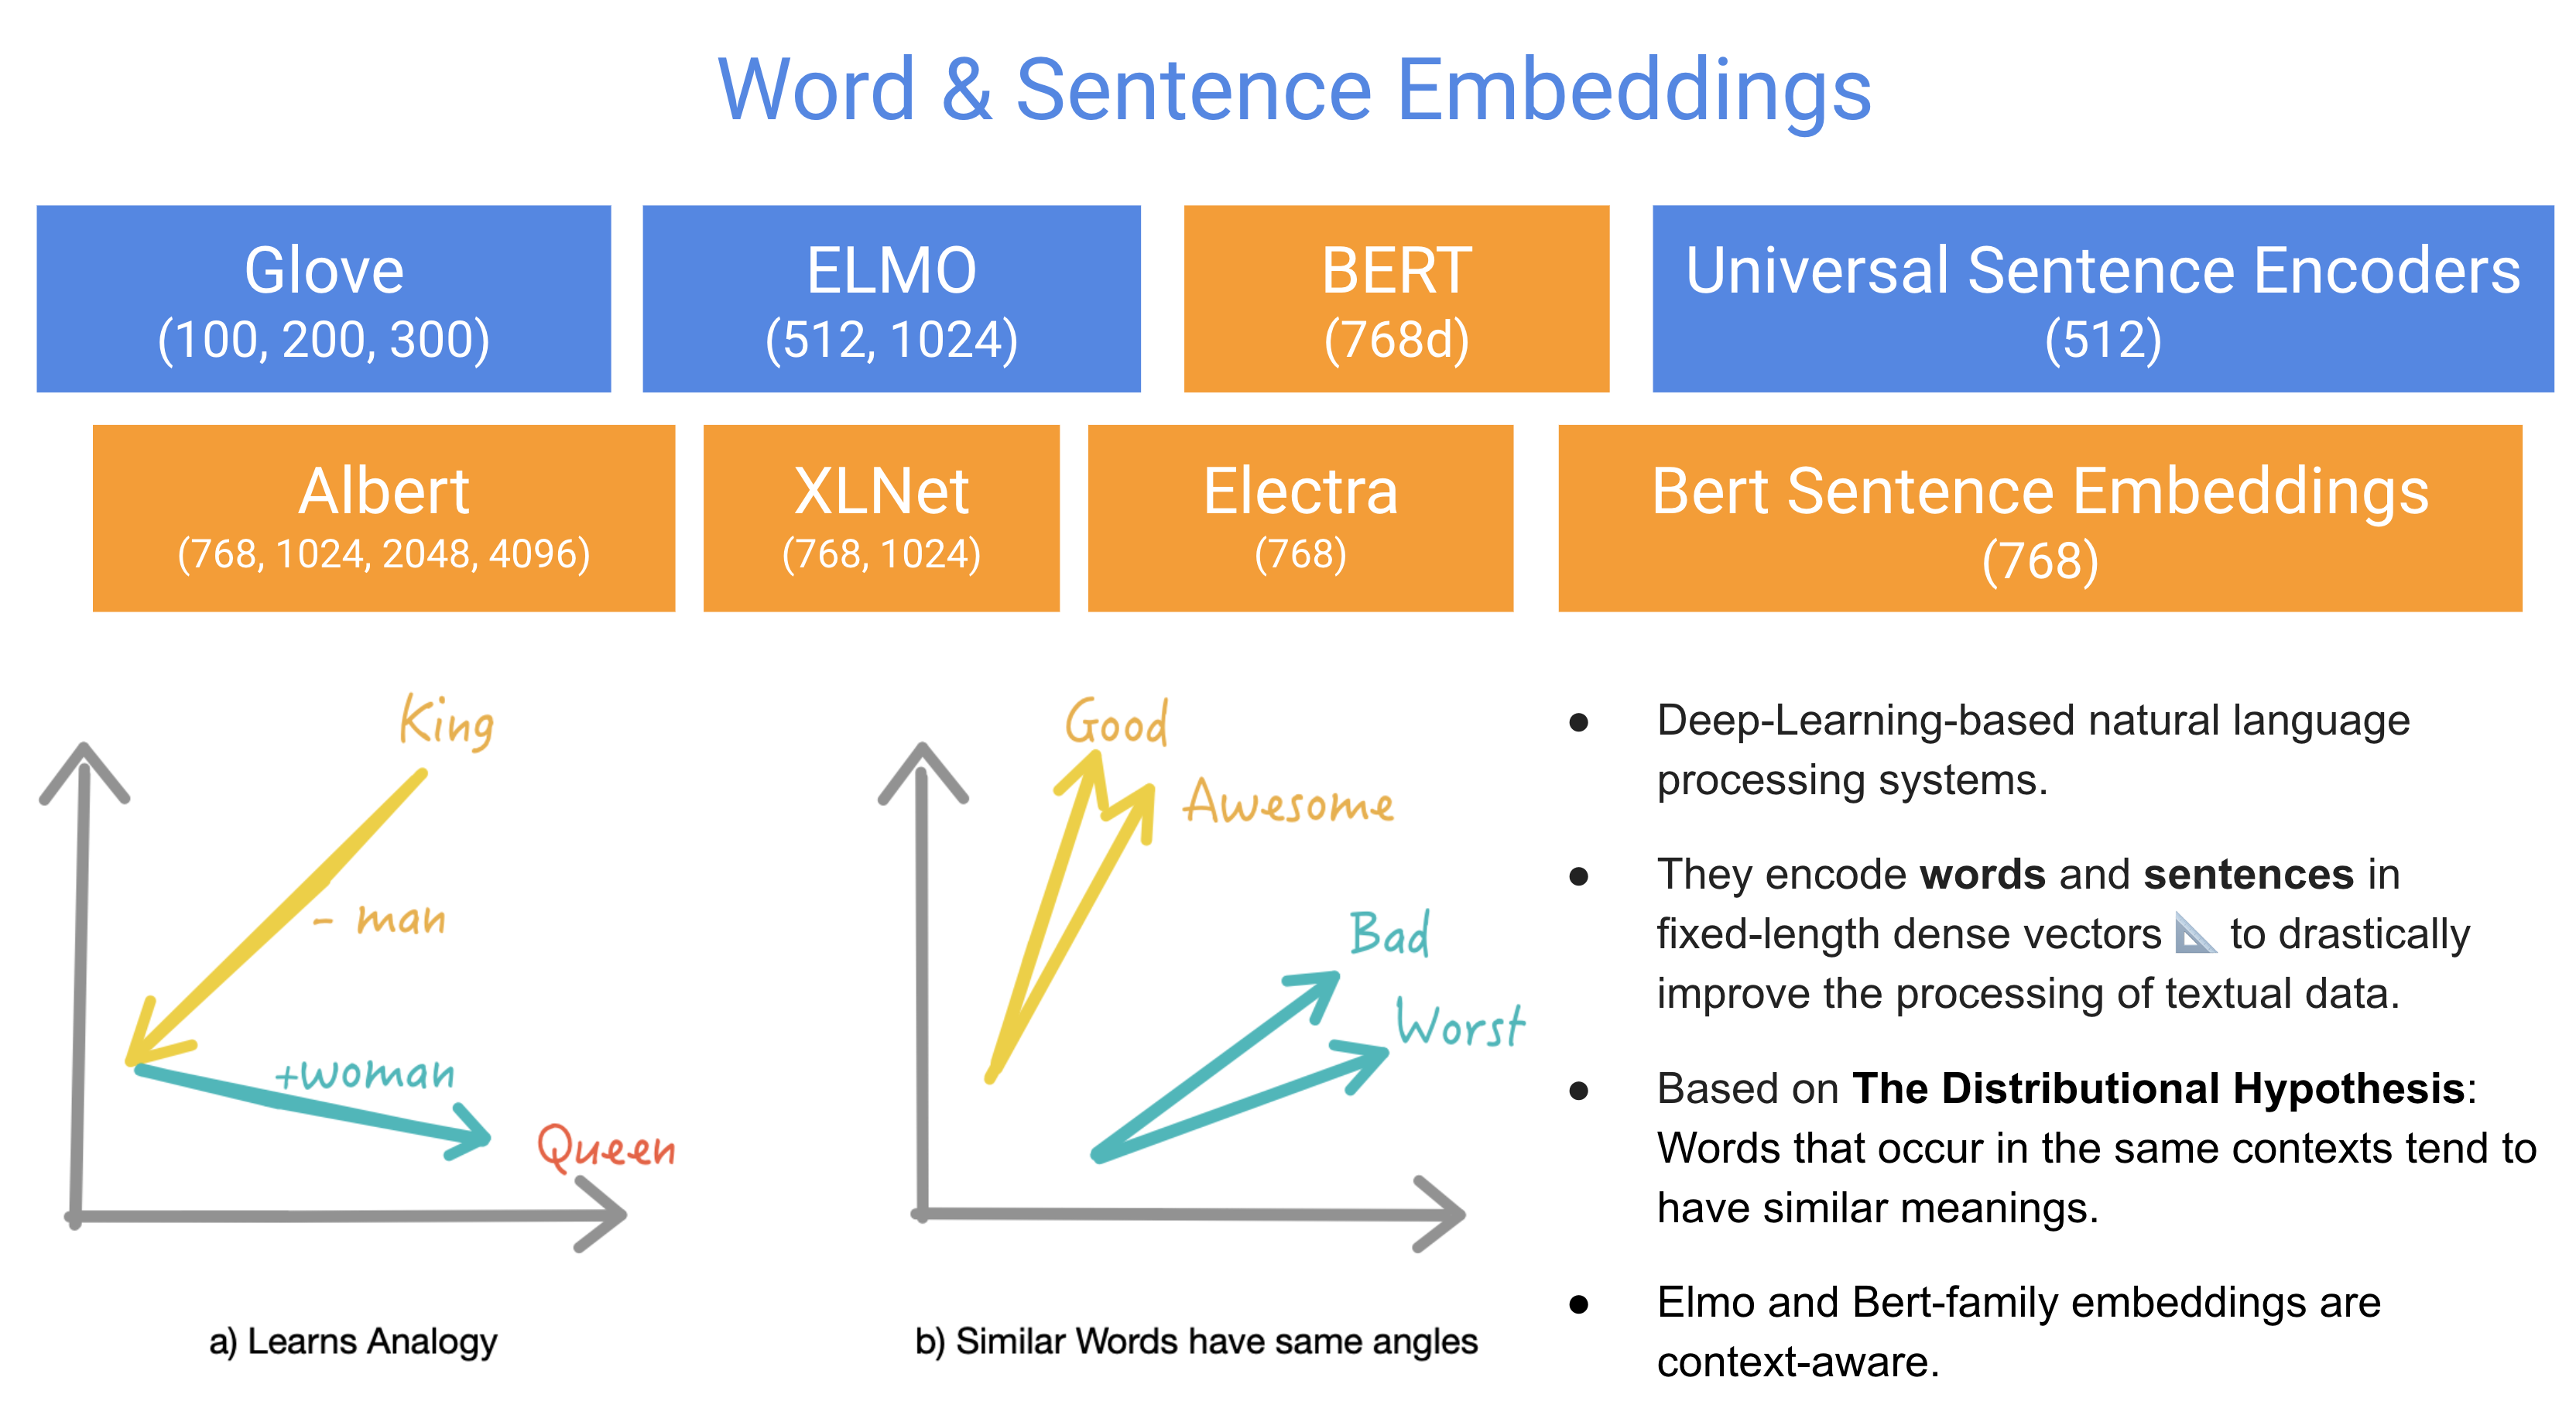

📌 You can find all these models and more [HERE](https://nlp.johnsnowlabs.com/models?task=Embeddings&edition=Spark+NLP)

### 🔹 Word Embeddings (Glove)

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        glove_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("embeddings"))

result_df.show(10, truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                          embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.71865, 0.80754, -1.1787, 0.27145, -0.48833, -0.18938, -1.1789, 0.17836, -0.21995, -0.7216, -0....|
|representing|[0.25671, 0.30035, -0.18006, 0.46666, 0.98501, 0.2321, -0.34959, 0.26997, -0.99667, -0.43404, -0....|
|     workers|[0.50592, 0.71717, -0.67236, -0.32112, -0.58285, -0.47977, -0.50243, 0.60594, 0.25709, 0.03974, -...|
|          at|[0.1766, 0.093851, 0.24351, 0.44313, -0.39037, 0.12524, -0.19918, 0.59855, -0.82035, 0.28006, 0.5...|
|      Turner|[0.51634, -0.37186, -0.21776, -1.0115, 0.4014, -0.4841, 0.36274, -0.2952, -0.42258, -0.62844, 0.6...|
|      Newall|[-0.38857, -1.1449, -0.41737, -0.31969, -0.16546, -0.7044,

**✔︎ Using your own Word Embeddings in Spark NLP**

In [ ]:
! wget -q https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.nl.300.vec.gz

!gunzip cc.nl.300.vec.gz

In [ ]:
custom_embeddings = WordEmbeddings()\
                        .setInputCols(["document", "token"])\
                        .setOutputCol("my_embeddings")\
                        .setStoragePath('cc.nl.300.vec', "TEXT")\
                        .setDimension(300)

custom_embeddings_model = custom_embeddings.fit(result.limit(10))# any df would be fine as long as it had document and token columns thru Spark NLP

In [ ]:
custom_embeddings_model.transform(result.limit(10)).select('my_embeddings.embeddings').show(truncate=100)

+----------------------------------------------------------------------------------------------------+
|                                                                                          embeddings|
+----------------------------------------------------------------------------------------------------+
|[[-0.0724, -0.0156, -0.031, -0.0285, 0.0037, 0.0091, -0.0524, -0.0528, -0.0572, -0.0975, 0.0156, ...|
|[[0.0123, -0.0048, -0.0016, 0.015, 0.0078, 0.0286, -0.0042, -0.0298, 0.0143, -0.1116, 0.0151, -0....|
|[[0.0807, 0.032, -0.0031, 0.0422, 0.14, 0.0321, -0.1067, -0.1257, -0.0627, -0.2708, -0.0688, 0.11...|
|[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...|
|[[-0.0471, 0.025, -0.007, 0.055, -0.019, 0.0615, -0.0303, -0.0282, -0.0087, -0.037, 0.0122, -0.02...|
|[[-0.2369, 0.1427, 0.0382, -0.0638, 0.0302, 0.0055, -0.0086, -0.0269, 0.0066, 0.1798, -0.0224, -0...|
|[[-0.2369, 0.1427, 0.0382, -0.0638, 0.0302, 0.0055, -0.0086, -0.0269, 0.

### 🔹 Bert Embeddings

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture
It can work with 3 different pooling layer options: 0, -1, or -2

In [ ]:
bert_embeddings = BertEmbeddings.pretrained('bert_base_uncased')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

bert_base_uncased download started this may take some time.
Approximate size to download 392.5 MB
[OK!]


In [ ]:
nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        bert_embeddings])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.embeddings.embeddings)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("bert_embeddings"))

result_df.show(truncate=100)

+------------+----------------------------------------------------------------------------------------------------+
|       token|                                                                                     bert_embeddings|
+------------+----------------------------------------------------------------------------------------------------+
|      Unions|[0.66706544, 0.07569191, -0.43506545, 0.13065222, 0.4481947, -0.07520919, -0.22416602, 0.18378535...|
|representing|[0.42402285, -0.15955882, -0.1757892, -0.539235, -0.40183234, 0.3813798, 0.12605947, -0.40928656,...|
|     workers|[0.72907203, 0.061318614, -0.5468205, -0.4750607, 0.334404, 0.03293561, 0.38784635, 0.8520443, 0....|
|          at|[0.10098237, 0.40903658, -0.44306678, -0.17509115, 0.16822204, 0.118960924, 0.41752362, 0.2806582...|
|      Turner|[0.64061344, 0.210727, 0.010704443, 0.06112908, 0.052616134, 0.48817602, 0.04534904, 0.36956036, ...|
|      Newall|[0.23471504, -0.47659007, -0.083988816, 0.05441724, 0.5981

**✔︎ Loading Models from local**



In [ ]:
!cd ~/cache_pretrained && pwd

/root/cache_pretrained


In [ ]:
!cd ~/cache_pretrained && ls -l

total 72
drwxr-xr-x 4 root root 4096 Oct  3 13:39 analyze_sentimentdl_glove_imdb_en_4.4.2_3.4_1685051273135
drwxr-xr-x 4 root root 4096 Oct  3 13:39 analyze_sentiment_en_4.4.2_3.4_1685040876208
drwxr-xr-x 4 root root 4096 Oct  3 13:48 bert_base_uncased_en_2.6.0_2.4_1598340514223
drwxr-xr-x 4 root root 4096 Oct  3 13:38 check_spelling_en_4.4.2_3.4_1685039983204
drwxr-xr-x 4 root root 4096 Oct  3 13:38 clean_stop_en_4.4.2_3.4_1685040188479
drwxr-xr-x 4 root root 4096 Oct  3 13:40 dependency_conllu_en_3.4.4_3.0_1656845289670
drwxr-xr-x 4 root root 4096 Oct  3 13:41 dependency_typed_conllu_en_3.4.4_3.0_1656850770275
drwxr-xr-x 4 root root 4096 Oct  3 13:44 detect_language_220_xx_2.7.0_2.4_1607185721383
drwxr-xr-x 4 root root 4096 Oct  3 13:38 explain_document_dl_en_4.4.2_3.4_1685040992507
drwxr-xr-x 4 root root 4096 Oct  3 13:41 glove_100d_en_2.4.0_2.4_1579690104032
drwxr-xr-x 4 root root 4096 Oct  3 13:44 ld_wiki_tatoeba_cnn_375_xx_2.7.0_2.4_1607184873730
drwxr-xr-x 4 root root 4096 Oct  

In [ ]:
glove_embeddings = WordEmbeddingsModel.load('/root/cache_pretrained/glove_100d_en_2.4.0_2.4_1579690104032').\
    setInputCols(["document", 'token']).\
    setOutputCol("glove_embeddings")

## 🚩 QuestionAnswering Models

📚 For more user experience and information, check out this notebooks:
[SparkNLP_Pretrained_Models](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/03.0.SparkNLP_Pretrained_Models.ipynb)


**✔︎ AlbertForQuestionAnswering**

In [ ]:
documentAssembler = MultiDocumentAssembler() \
    .setInputCols(["question", "context"]) \
    .setOutputCols(["document_question", "document_context"])

spanClassifier = AlbertForQuestionAnswering.pretrained("albert_qa_xxlargev1_squad2_512","en") \
    .setInputCols(["document_question", "document_context"]) \
    .setOutputCol("answer")\
    .setCaseSensitive(True)

pipeline = Pipeline(
    stages=[
        documentAssembler,
        spanClassifier])

data = spark.createDataFrame([["Which name is also used to describe the Amazon rainforest in English?","""The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species."""]]).toDF("question", "context")

result = pipeline.fit(data).transform(data)

albert_qa_xxlargev1_squad2_512 download started this may take some time.
Approximate size to download 735.9 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+-----------------------+
|result                 |
+-----------------------+
|[usuallyAmazonia;Frenc]|
+-----------------------+



▪︎ with LightPipeline

In [ ]:
empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = pipeline.fit(empty_df)

light_model = LightPipeline(pipelineModel)

In [ ]:
#annotate
light_model.annotate("Which name is also used to describe the Amazon rainforest in English?","""The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.""")

{'document_question': ['Which name is also used to describe the Amazon rainforest in English?'],
 'document_context': ['The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet\'s remaining

In [ ]:
#fullAnnotate
light_model.fullAnnotate("Which name is also used to describe the Amazon rainforest in English?","""The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet's remaining rainforests, and comprises the largest and most biodiverse tract of tropical rainforest in the world, with an estimated 390 billion individual trees divided into 16,000 species.""")

[{'document_question': [Annotation(document, 0, 68, Which name is also used to describe the Amazon rainforest in English?, {}, [])],
  'document_context': [Annotation(document, 0, 1056, The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their

**✔︎ BertForQuestionAnswering**

In [ ]:
document_assembler = MultiDocumentAssembler() \
          .setInputCols(["question", "context"]) \
          .setOutputCols(["document_question", "document_context"])

spanClassifier = BertForQuestionAnswering.pretrained("bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488","es") \
          .setInputCols(["document_question", "document_context"]) \
          .setOutputCol("answer") \
          .setCaseSensitive(True)


pipeline = Pipeline().setStages([document_assembler,
                                 spanClassifier])

# Question in Spanish: How many people speak Spanish?
# Context in Spanish: Spanish is the second most spoken language in the world with more than 442 million speakers

example = spark.createDataFrame([["¿Cuántas personas hablan español?", "El español es el segundo idioma más hablado del mundo con más de 442 millones de hablantes"]]).toDF("question", "context")

result = pipeline.fit(example).transform(example)

bert_qa_bert_base_spanish_wwm_cased_finetuned_spa_squad2_es_mrm8488 download started this may take some time.
Approximate size to download 391 MB
[OK!]


In [ ]:
result.select('answer.result').show(truncate=False)

+--------------+
|result        |
+--------------+
|[442 millones]|
+--------------+



## 🚩 NERDL Models

📌 Named-Entity recognition is a well-known technique in information extraction it is also known as entity identification, entity chunking and entity extraction. Knowing the relevant tags for each article help in automatically categorizing the articles in defined hierarchies and enable smooth content discovery.

### 🔹 NerDL OntoNotes 100D



📌This pipeline is based on&nbsp;<strong>NerDLApproach</strong> annotator with <strong>Char CNN - BiLSTM</strong> and <strong>GloVe Embeddings</strong> on the <strong>OntoNotes</strong> corpus and supports the identification of 18 entities.</p><p>Following NER types are supported in this pipeline:</p><table><thead><tr><th>Type</th><th>Description</th></tr></thead><tbody><tr><td><code>PERSON</code></td><td>People, including fictional.</td></tr><tr><td><code>NORP</code></td><td>Nationalities or religious or political groups.</td></tr><tr><td><code>FAC</code></td><td>Buildings, airports, highways, bridges, etc.</td></tr><tr><td><code>ORG</code></td><td>Companies, agencies, institutions, etc.</td></tr><tr><td><code>GPE</code></td><td>Countries, cities, states.</td></tr><tr><td><code>LOC</code></td><td>Non-GPE locations, mountain ranges, bodies of water.</td></tr><tr><td><code>PRODUCT</code></td><td>Objects, vehicles, foods, etc. (Not services.)</td></tr><tr><td><code>EVENT</code></td><td>Named hurricanes, battles, wars, sports events, etc.</td></tr><tr><td><code>WORK_OF_ART</code></td><td>Titles of books, songs, etc.</td></tr><tr><td><code>LAW</code></td><td>Named documents made into laws.</td></tr><tr><td><code>LANGUAGE</code></td><td>Any named language.</td></tr><tr><td><code>DATE</code></td><td>Absolute or relative dates or periods.</td></tr><tr><td><code>TIME</code></td><td>Times smaller than a day.</td></tr><tr><td><code>PERCENT</code></td><td>Percentage, including &rdquo;%&ldquo;.</td></tr><tr><td><code>MONEY</code></td><td>Monetary values, including unit.</td></tr><tr><td><code>QUANTITY</code></td><td>Measurements, as of weight or distance.</td></tr><tr><td><code>ORDINAL</code></td><td>&ldquo;first&rdquo;, &ldquo;second&rdquo;, etc.</td></tr><tr><td><code>CARDINAL</code></td><td>Numerals that do not fall under another type.</td></tr></tbody></table>

In [7]:
!wget -q -O news_category_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

news_df = spark.read\
                .option("header", "true")\
                .csv("news_category_test.csv")\
                .withColumnRenamed("description", "text")

news_df.show(truncate=50)

+--------+--------------------------------------------------+
|category|                                              text|
+--------+--------------------------------------------------+
|Business|Unions representing workers at Turner   Newall ...|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers...|
|Sci/Tech| A company founded by a chemistry researcher at...|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts ...|
|Sci/Tech| Southern California's smog fighting agency wen...|
|Sci/Tech|"The British Department for Education and Skill...|
|Sci/Tech|"confessed author of the Netsky and Sasser viru...|
|Sci/Tech|\\FOAF/LOAF  and bloom filters have a lot of in...|
|Sci/Tech|"Wiltshire Police warns about ""phishing"" afte...|
|Sci/Tech|In its first two years, the UK's dedicated card...|
|Sci/Tech| A group of technology companies  including Tex...|
|Sci/Tech| Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday ...|
|Sci/Tech| Free Record Shop, a Dutch music  retail chain,...|
|Sci/Tec

In [8]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# ner_dl model is trained with glove_100d. So we use the same embeddings in the pipeline
glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", 'token'])\
    .setOutputCol("embeddings")

onto_ner = NerDLModel.pretrained("onto_100", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        glove_embeddings,
        onto_ner])

result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


In [9]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

+------------+-------------+
|       token|    ner_label|
+------------+-------------+
|      Unions|            O|
|representing|            O|
|     workers|            O|
|          at|            O|
|      Turner|        B-ORG|
|      Newall|        I-ORG|
|         say|            O|
|        they|            O|
|         are|            O|
|           '|            O|
|disappointed|            O|
|           '|            O|
|       after|            O|
|       talks|            O|
|        with|            O|
|    stricken|            O|
|      parent|            O|
|        firm|            O|
|     Federal|        B-ORG|
|       Mogul|        I-ORG|
|           .|            O|
|     TORONTO|        B-GPE|
|           ,|            O|
|      Canada|        B-GPE|
|           A|            O|
|      second|    B-ORDINAL|
|        team|            O|
|          of|            O|
|  rocketeers|            O|
|   competing|            O|
|         for|            O|
|         the|

### 🔹 NER with Bert (CoNLL 2003)

In [10]:
bert_embeddings = BertEmbeddings.pretrained('bert_base_cased')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

onto_ner_bert = NerDLModel.pretrained("ner_dl_bert", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        bert_embeddings,
        onto_ner_bert
])

pipelineModel = nlpPipeline.fit(spark.createDataFrame([['']]).toDF("text"))

bert_base_cased download started this may take some time.
Approximate size to download 384.9 MB
[OK!]
ner_dl_bert download started this may take some time.
Approximate size to download 15.4 MB
[OK!]


In [11]:
# fullAnnotate in LightPipeline

light_model = LightPipeline(pipelineModel)

light_result = light_model.annotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')

list(zip(light_result['token'], light_result['ner']))

[('Peter', 'I-PER'),
 ('Parker', 'I-PER'),
 ('is', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('persn', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('New', 'I-LOC'),
 ('York', 'I-LOC'),
 ('.', 'O'),
 ('Bruce', 'I-PER'),
 ('Wayne', 'I-PER'),
 ('is', 'O'),
 ('also', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('guy', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('Gotham', 'I-LOC'),
 ('City', 'I-LOC'),
 ('.', 'O')]

> ➤➤➤ **Getting the NER chunks with NER Converter**





In [12]:
ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        tokenizer,
        bert_embeddings,
        onto_ner_bert,
        ner_converter
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

In [13]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result,
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-------------------------------------------+---------+
|chunk                                      |ner_label|
+-------------------------------------------+---------+
|Turner   Newall                            |ORG      |
|Federal Mogul                              |ORG      |
|TORONTO                                    |LOC      |
|Canada                                     |LOC      |
|Ansari X Prize                             |MISC     |
|University of Louisville                   |ORG      |
|Mike Fitzpatrick                           |PER      |
|Southern California's                      |LOC      |
|British Department for Education and Skills|ORG      |
|DfES                                       |ORG      |
|Netsky                                     |MISC     |
|Sasser                                     |MISC     |
|Sophos                                     |ORG      |
|Jaschan                                    |PER      |
|Germany                                    |LOC

### 🔹 Multi-Lingual NER


📌 These NER Models are able to extract entities from a variety of languages

**📌 Multi-Lingual NER (XLM-RoBERTa)**

[XlmRoBertaForTokenClassification](https://nlp.johnsnowlabs.com/docs/en/transformers#xlmrobertafortokenclassification) can load XLM-RoBERTa Models with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.




| Spark NLP Model Name                     | language   | predicted_entities                                     | Class   | Number of Languages supported                    |
|:-----------------------------------------|:-----------|:-------------------------------------------------------|:--------------------------------|:-----------------------|
| ner_wikiner_glove_840B_300               | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |8   |
| ner_wikiner_xlm_roberta_base             | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |8   |
| ner_xtreme_glove_840B_300                | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |40  |
| ner_xtreme_xlm_roberta_xtreme_base       | xx         | ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER'] | NerDLModel |40  |
| xlm_roberta_token_classifier_ner_40_lang | xx         | ['LOC', 'ORG', 'PER', 'O']                             | XlmRoBertaForTokenClassification |40  |



In [3]:
tokenClassifier = XlmRoBertaForTokenClassification() \
    .pretrained('xlm_roberta_token_classifier_ner_40_lang', 'xx') \
    .setInputCols(['token', 'document']) \
    .setOutputCol('ner')

xlm_roberta_token_classifier_ner_40_lang download started this may take some time.
Approximate size to download 921.6 MB
[OK!]


In [14]:
# No need for NER Converter
nlpPipeline = Pipeline(stages=[documentAssembler,
                               tokenizer,
                               tokenClassifier,])

text = [
    'Peter Parker is a nice lad and lives in New York',
    'Das Schloss Charlottenburg in Berlin ist eines der schoensten Staedte in Deutschland sagen viele Menschen',
    'Peter Parker est un gentil garçon et vit à New York',
    'پیٹر پارکر ایک اچھا لڑکا ہے اور وہ نیو یارک میں رہتا ھے',
]
data_set = spark.createDataFrame(text, StringType()).toDF("text")
result = nlpPipeline.fit(data_set).transform(data_set)


result.select(F.explode(F.arrays_zip(result.token.result,
                                     result.ner.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias('token'),
              F.expr("cols['1']").alias("ner_label")).show(100,truncate=False)

+--------------+---------+
|token         |ner_label|
+--------------+---------+
|Peter         |PER      |
|Parker        |PER      |
|is            |O        |
|a             |O        |
|nice          |O        |
|lad           |O        |
|and           |O        |
|lives         |O        |
|in            |O        |
|New           |LOC      |
|York          |LOC      |
|Das           |O        |
|Schloss       |ORG      |
|Charlottenburg|ORG      |
|in            |O        |
|Berlin        |LOC      |
|ist           |O        |
|eines         |O        |
|der           |O        |
|schoensten    |O        |
|Staedte       |O        |
|in            |O        |
|Deutschland   |LOC      |
|sagen         |O        |
|viele         |O        |
|Menschen      |O        |
|Peter         |PER      |
|Parker        |PER      |
|est           |O        |
|un            |O        |
|gentil        |O        |
|garçon        |O        |
|et            |O        |
|vit           |O        |
|

# 📍Named Entity Recognition (NER)





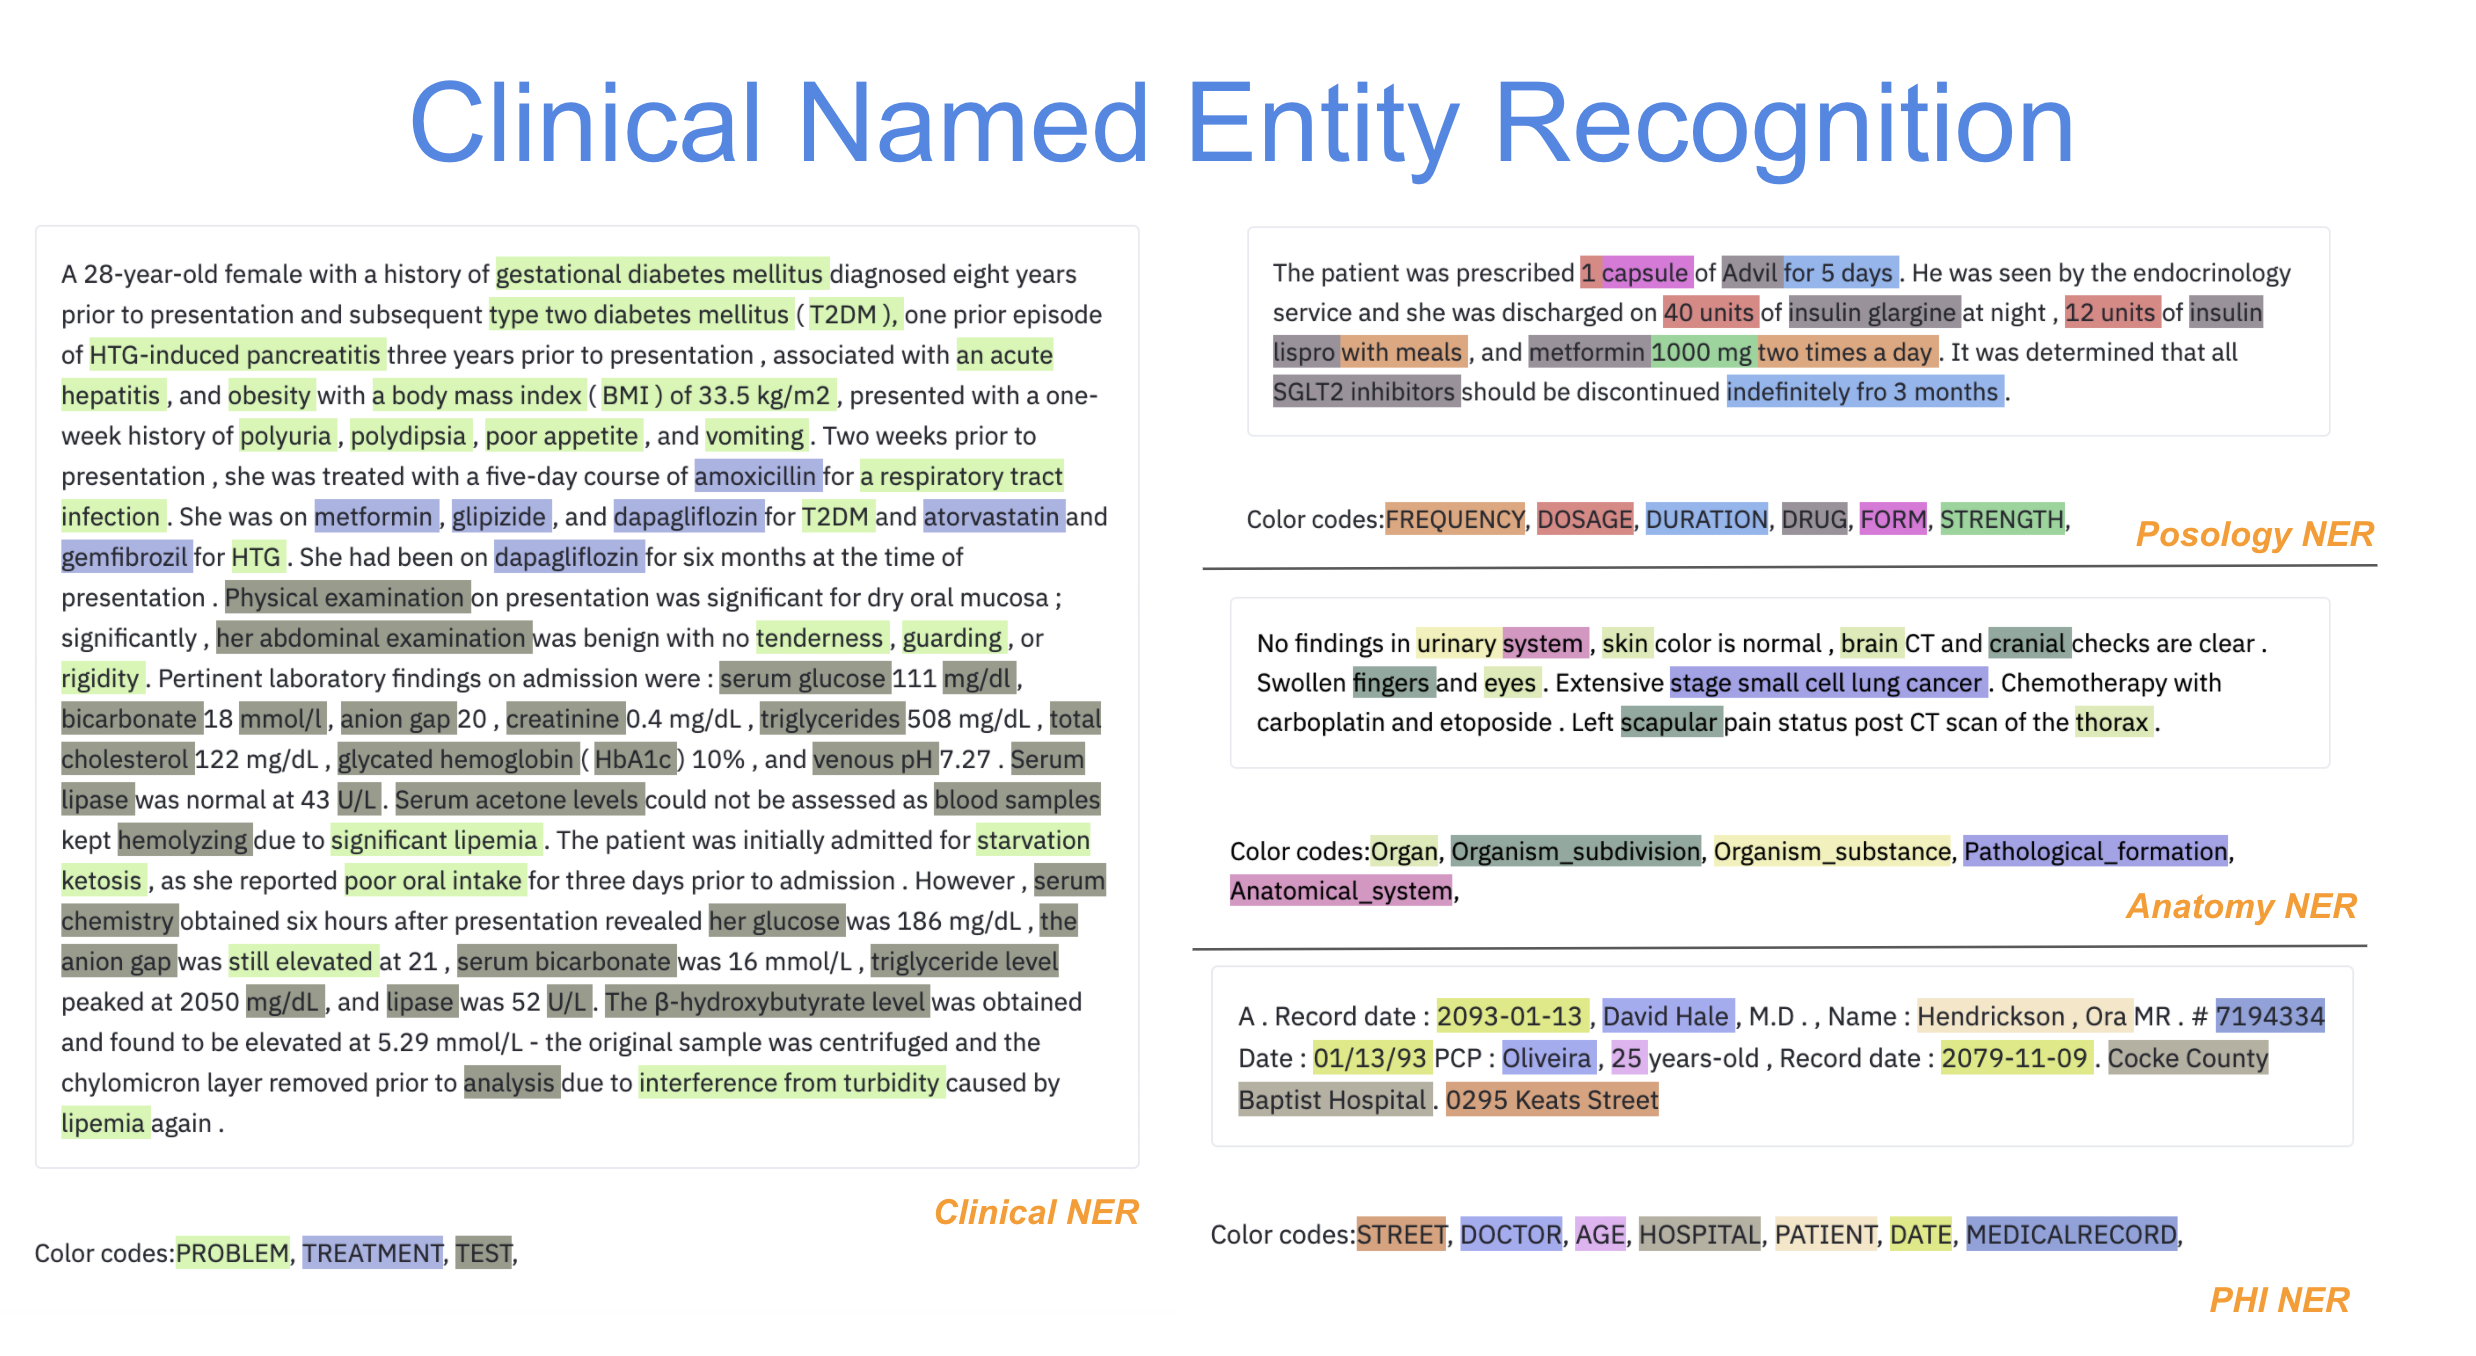

📚 For more user experience and information, check out this notebooks:

- [NERDL_Training](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/04.0.NERDL_Training.ipynb)

- [Prepare_CoNLL_from_Annotations_for_NER](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/01.1.prepare_CoNLL_from_annotations_for_NER.ipynb)

- [NerDL_Graph](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/04.1.NerDL_Graph.ipynb)

🎬 Blogposts and videos:


- [Named-Entity-Recognition-Ner-with-Bert-in-Spark-NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

- [NerDL workshop (90 min)](https://www.youtube.com/watch?v=YM-e4eOiQ34)

- [Named-Entity-Recognition-for-Healthcare-with-Sparknlp-Nerdl-and-Nercrf](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

- [Ner-for-Clinical-Text](https://medium.com/atlas-research/ner-for-clinical-text-7c73caddd180)

### 🚩 NER DL Training

**✔︎ CoNLL Data Prep**

In [15]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/conll2003/eng.train
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/src/test/resources/conll2003/eng.testa

In [16]:
with open("eng.train") as f:
    train_txt =f.read()

print (train_txt[:500])

-DOCSTART- -X- -X- O

EU NNP B-NP B-ORG
rejects VBZ B-VP O
German JJ B-NP B-MISC
call NN I-NP O
to TO B-VP O
boycott VB I-VP O
British JJ B-NP B-MISC
lamb NN I-NP O
. . O O

Peter NNP B-NP B-PER
Blackburn NNP I-NP I-PER

BRUSSELS NNP B-NP B-LOC
1996-08-22 CD I-NP O

The DT B-NP O
European NNP I-NP B-ORG
Commission NNP I-NP I-ORG
said VBD B-VP O
on IN B-PP O
Thursday NNP B-NP O
it PRP B-NP O
disagreed VBD B-VP O
with IN B-PP O
German JJ B-NP B-MISC
advice NN I-NP O
to TO B-PP O
consumers NNS B-NP


In [17]:
from sparknlp.training import CoNLL

training_data = CoNLL().readDataset(spark, './eng.train').limit(5000)

training_data.show(3)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|                 pos|               label|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|EU rejects German...|[{document, 0, 47...|[{document, 0, 47...|[{token, 0, 1, EU...|[{pos, 0, 1, NNP,...|[{named_entity, 0...|
|     Peter Blackburn|[{document, 0, 14...|[{document, 0, 14...|[{token, 0, 4, Pe...|[{pos, 0, 4, NNP,...|[{named_entity, 0...|
| BRUSSELS 1996-08-22|[{document, 0, 18...|[{document, 0, 18...|[{token, 0, 7, BR...|[{pos, 0, 7, NNP,...|[{named_entity, 0...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows



In [18]:
import pyspark.sql.functions as F

training_data.select(F.explode(F.arrays_zip(training_data.token.result,
                                            training_data.pos.result,
                                            training_data.label.result)).alias("cols")) \
             .select(F.expr("cols['0']").alias("token"),
                     F.expr("cols['1']").alias("pos"),
                     F.expr("cols['2']").alias("ner_label")).show(truncate=50)

+----------+---+---------+
|     token|pos|ner_label|
+----------+---+---------+
|        EU|NNP|    B-ORG|
|   rejects|VBZ|        O|
|    German| JJ|   B-MISC|
|      call| NN|        O|
|        to| TO|        O|
|   boycott| VB|        O|
|   British| JJ|   B-MISC|
|      lamb| NN|        O|
|         .|  .|        O|
|     Peter|NNP|    B-PER|
| Blackburn|NNP|    I-PER|
|  BRUSSELS|NNP|    B-LOC|
|1996-08-22| CD|        O|
|       The| DT|        O|
|  European|NNP|    B-ORG|
|Commission|NNP|    I-ORG|
|      said|VBD|        O|
|        on| IN|        O|
|  Thursday|NNP|        O|
|        it|PRP|        O|
+----------+---+---------+
only showing top 20 rows



In [19]:
training_data.select(F.explode(F.arrays_zip(training_data.token.result,
                                            training_data.label.result)).alias("cols")) \
             .select(F.expr("cols['0']").alias("token"),
                     F.expr("cols['1']").alias("ground_truth")).groupBy('ground_truth').count().orderBy('count', ascending=False).show(100,truncate=False)

+------------+-----+
|ground_truth|count|
+------------+-----+
|O           |55196|
|B-LOC       |2768 |
|B-PER       |2584 |
|B-ORG       |2058 |
|I-PER       |1875 |
|B-MISC      |1236 |
|I-ORG       |1105 |
|I-MISC      |455  |
|I-LOC       |357  |
+------------+-----+



In [20]:
# You can use any word embeddings you want (Glove, Elmo, Bert, custom etc.)

glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


**✔︎ Create Graph**

We will use TFNerDLGraphBuilder annotator to create a graph in the model training pipeline. This annotator inspects the data and creates the proper graph if a suitable version of TensorFlow (<= 2.7 ) is available. The graph is stored in the defined folder and loaded by the approach.
ATTENTION: Do not forget to play with the parameters of this annotator, it may affect the model performance that you want to train.

In [ ]:
!pip install -q tensorflow==2.12.0
!pip install -q tensorflow-addons

In [22]:
!mkdir ner_logs
!mkdir ner_graphs

graph_folder = "./ner_graphs"

In [23]:
graph_builder = TFNerDLGraphBuilder()\
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setLabelColumn("label")\
    .setGraphFile("auto")\
    .setGraphFolder(graph_folder)\
    .setHiddenUnitsNumber(20)

In [24]:
nerTagger = NerDLApproach()\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setLabelColumn("label")\
    .setOutputCol("ner")\
    .setMaxEpochs(3)\
    .setLr(0.003)\
    .setBatchSize(32)\
    .setRandomSeed(0)\
    .setVerbose(1)\
    .setValidationSplit(0.2)\
    .setEvaluationLogExtended(True) \
    .setEnableOutputLogs(True)\
    .setIncludeConfidence(True)\
    .setGraphFolder(graph_folder)\
    .setOutputLogsPath('ner_logs') # if not set, logs will be written to ~/annotator_logs
  # .setEnableMemoryOptimizer(True) # if not set, logs will be written to ~/annotator_logs

ner_pipeline = Pipeline(
    stages=[
        glove_embeddings,
        graph_builder,
        nerTagger
])

**✔︎ Fitting**

In [25]:
%%time

ner_model = ner_pipeline.fit(training_data)

# 1 epoch takes around 3 min with batch size=32
# if you get an error for incompatible TF graph, use 4.1 NerDL-Graph.ipynb notebook to create a graph (or see the bottom cell of this notebook)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Ner DL Graph Builder configuration:
Graph folder: ./ner_graphs
Graph file name: auto
Build params: {'ntags': 9, 'embeddings_dim': 100, 'nchars': 84, 'lstm_size': 20}


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


CPU times: user 11 s, sys: 510 ms, total: 11.5 s
Wall time: 1min 4s


In [26]:
import os

log_files = os.listdir("./ner_logs/")

with open("./ner_logs/"+log_files[0]) as log_file:
    print(log_file.read())


Name of the selected graph: /content/./ner_graphs/blstm_9_100_20_84.pb
Training started - total epochs: 3 - lr: 0.003 - batch size: 32 - labels: 9 - chars: 83 - training examples: 4006


Epoch 1/3 started, lr: 0.003, dataset size: 4006


Epoch 1/3 - 10.00s - loss: 1128.6461 - batches: 129
Quality on validation dataset (20.0%), validation examples = 801
time to finish evaluation: 1.12s
label	 tp	 fp	 fn	 prec	 rec	 f1
B-LOC	 439	 203	 102	 0.68380064	 0.81146026	 0.7421809
I-ORG	 5	 4	 251	 0.5555556	 0.01953125	 0.03773585
I-MISC	 0	 0	 85	 0.0	 0.0	 0.0
I-LOC	 0	 0	 77	 0.0	 0.0	 0.0
I-PER	 331	 150	 19	 0.6881497	 0.9457143	 0.7966306
B-MISC	 107	 31	 126	 0.7753623	 0.45922747	 0.5768194
B-ORG	 178	 138	 273	 0.56329113	 0.3946785	 0.46414602
B-PER	 423	 258	 50	 0.62114537	 0.89429176	 0.73310226
tp: 1483 fp: 784 fn: 983 labels: 8
Macro-average	 prec: 0.4859131, rec: 0.44061297, f1: 0.4621556
Micro-average	 prec: 0.6541685, rec: 0.60137874, f1: 0.6266638


Epoch 2/3 started, lr: 0.

In [27]:
test_data = CoNLL().readDataset(spark, './eng.testa').limit(1000)

test_data = glove_embeddings.transform(test_data)

test_data.show(3)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|                 pos|               label|          embeddings|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|CRICKET - LEICEST...|[{document, 0, 64...|[{document, 0, 64...|[{token, 0, 6, CR...|[{pos, 0, 6, NNP,...|[{named_entity, 0...|[{word_embeddings...|
|   LONDON 1996-08-30|[{document, 0, 16...|[{document, 0, 16...|[{token, 0, 5, LO...|[{pos, 0, 5, NNP,...|[{named_entity, 0...|[{word_embeddings...|
|West Indian all-r...|[{document, 0, 18...|[{document, 0, 18...|[{token, 0, 3, We...|[{pos, 0, 3, NNP,...|[{named_entity, 0...|[{word_embeddings...|
+--------------------+--------------------+--------------------+--------------------+--------------------+

In [28]:
predictions = ner_model.transform(test_data)
predictions.show(3)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|                 pos|               label|          embeddings|                 ner|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|CRICKET - LEICEST...|[{document, 0, 64...|[{document, 0, 64...|[{token, 0, 6, CR...|[{pos, 0, 6, NNP,...|[{named_entity, 0...|[{word_embeddings...|[{named_entity, 0...|
|   LONDON 1996-08-30|[{document, 0, 16...|[{document, 0, 16...|[{token, 0, 5, LO...|[{pos, 0, 5, NNP,...|[{named_entity, 0...|[{word_embeddings...|[{named_entity, 0...|
|West Indian all-r...|[{document, 0, 18...|[{document, 0, 18...|[{token, 0, 3, We...|[{pos, 0, 3, NNP,...|[{named_entity, 0...|[{word_embeddings...|[{

In [29]:
predictions.select('token.result','label.result','ner.result').show(3, truncate=50)

+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                            result|                                            result|                                            result|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|[CRICKET, -, LEICESTERSHIRE, TAKE, OVER, AT, TO...|             [O, O, B-ORG, O, O, O, O, O, O, O, O]|             [O, O, B-ORG, O, O, O, O, O, O, O, O]|
|                              [LONDON, 1996-08-30]|                                        [B-LOC, O]|                                        [B-LOC, O]|
|[West, Indian, all-rounder, Phil, Simmons, took...|[B-MISC, I-MISC, O, B-PER, I-PER, O, O, O, O, O...|[B-LOC, O, O, B-PER, I-PER, O, O, O, O, O, O, O...|
+--------------------------------------------------+------------------

**✔︎ Test set evaluation**

In [30]:
import pyspark.sql.functions as F

predictions.select(F.explode(F.arrays_zip(predictions.token.result,
                                          predictions.label.result,
                                          predictions.ner.result)).alias("cols")) \
            .select(F.expr("cols['0']").alias("token"),
                    F.expr("cols['1']").alias("ground_truth"),
                    F.expr("cols['2']").alias("prediction")).show(truncate=False)

+--------------+------------+----------+
|token         |ground_truth|prediction|
+--------------+------------+----------+
|CRICKET       |O           |O         |
|-             |O           |O         |
|LEICESTERSHIRE|B-ORG       |B-ORG     |
|TAKE          |O           |O         |
|OVER          |O           |O         |
|AT            |O           |O         |
|TOP           |O           |O         |
|AFTER         |O           |O         |
|INNINGS       |O           |O         |
|VICTORY       |O           |O         |
|.             |O           |O         |
|LONDON        |B-LOC       |B-LOC     |
|1996-08-30    |O           |O         |
|West          |B-MISC      |B-LOC     |
|Indian        |I-MISC      |O         |
|all-rounder   |O           |O         |
|Phil          |B-PER       |B-PER     |
|Simmons       |I-PER       |I-PER     |
|took          |O           |O         |
|four          |O           |O         |
+--------------+------------+----------+
only showing top

In [31]:
from sklearn.metrics import classification_report

preds_df = predictions.select(F.explode(F.arrays_zip(predictions.token.result,
                                                     predictions.label.result,
                                                     predictions.ner.result)).alias("cols")) \
                      .select(F.expr("cols['0']").alias("token"),
                              F.expr("cols['1']").alias("ground_truth"),
                              F.expr("cols['2']").alias("prediction")).toPandas()

print (classification_report(preds_df['ground_truth'], preds_df['prediction']))

              precision    recall  f1-score   support

       B-LOC       0.74      0.92      0.82       559
      B-MISC       0.79      0.63      0.70       190
       B-ORG       0.74      0.55      0.63       355
       B-PER       0.92      0.95      0.94       654
       I-LOC       0.49      0.42      0.45        69
      I-MISC       0.74      0.31      0.44        93
       I-ORG       0.73      0.61      0.66       181
       I-PER       0.96      0.97      0.96       443
           O       0.99      0.99      0.99     11589

    accuracy                           0.96     14133
   macro avg       0.79      0.71      0.73     14133
weighted avg       0.96      0.96      0.96     14133



**✔︎ Entity level evaluation (strict eval)**

In [32]:
!wget  -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/utils/conll_eval.py

import conll_eval

metrics = conll_eval.evaluate(preds_df['ground_truth'].values, preds_df['prediction'].values)

processed 14133 tokens with 1758 phrases; found: 1805 phrases; correct: 1410.
accuracy:  80.42%; (non-O)
accuracy:  96.04%; precision:  78.12%; recall:  80.20%; FB1:  79.15
              LOC: precision:  71.55%; recall:  89.09%; FB1:  79.36  696
             MISC: precision:  71.79%; recall:  58.95%; FB1:  64.74  156
              ORG: precision:  65.94%; recall:  51.27%; FB1:  57.69  276
              PER: precision:  91.29%; recall:  94.50%; FB1:  92.86  677


In [33]:
# micro, macro, avg
metrics[0]

(78.1163434903047, 80.2047781569966, 79.14678641594163)

In [34]:
import pandas as pd

pd.DataFrame(metrics[1], columns=['entity','precision','recall','f1','support'])

entity  precision     recall         f1  support
0    LOC  71.551724  89.087657  79.362550      696
1   MISC  71.794872  58.947368  64.739884      156
2    ORG  65.942029  51.267606  57.686212      276
3    PER  91.285081  94.495413  92.862509      677

**✔︎ Splitting Dataset Into Train and Test Set**


Also we will use `.setTestDataset('ner_dl_test.parquet')` for checking test-loss values of each epoch in the logs file and `.useBestModel(True)` parameter whether to restore and use the model that has achieved the best performance at the end of the training. .

In [35]:
from sparknlp.training import CoNLL

conll_data = CoNLL().readDataset(spark, './eng.train')

(training_data, test_data) = conll_data.randomSplit([0.7, 0.3], seed = 100)

print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 9739
Test Dataset Count: 4302


In [36]:
!mkdir ner_logs_best

In [37]:
glove_embeddings.transform(test_data).write.parquet('ner_dl_test.parquet')

In [38]:
%%time
nerTagger = NerDLApproach()\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setLabelColumn("label")\
    .setOutputCol("ner")\
    .setMaxEpochs(5)\
    .setLr(0.003)\
    .setBatchSize(32)\
    .setRandomSeed(0)\
    .setVerbose(1)\
    .setValidationSplit(0.2)\
    .setEvaluationLogExtended(True) \
    .setEnableOutputLogs(True)\
    .setIncludeConfidence(True)\
    .setUseBestModel(True)\
    .setGraphFolder(graph_folder)\
    .setTestDataset('ner_dl_test.parquet')\
    .setOutputLogsPath('ner_logs_best') # if not set, logs will be written to ~/annotator_logs

ner_pipeline = Pipeline(
    stages=[
        glove_embeddings,
        graph_builder,
        nerTagger
])

ner_model = ner_pipeline.fit(training_data)

Ner DL Graph Builder configuration:
Graph folder: ./ner_graphs
Graph file name: auto
Build params: {'ntags': 9, 'embeddings_dim': 100, 'nchars': 85, 'lstm_size': 20}


/usr/local/lib/python3.10/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1702: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


CPU times: user 5.15 s, sys: 144 ms, total: 5.3 s
Wall time: 2min 13s


In [39]:
log_files = os.listdir("./ner_logs_best/")
log_files

['NerDLApproach_4e6764cc8c35.log']

In [40]:
with open("./ner_logs_best/"+log_files[0]) as log_file:
    print(log_file.read())

Name of the selected graph: /content/./ner_graphs/blstm_9_100_20_85.pb
Training started - total epochs: 5 - lr: 0.003 - batch size: 32 - labels: 9 - chars: 84 - training examples: 7760


Epoch 1/5 started, lr: 0.003, dataset size: 7760


Epoch 1/5 - 17.18s - loss: 1560.5681 - batches: 245
Quality on validation dataset (20.0%), validation examples = 1552
time to finish evaluation: 1.84s
label	 tp	 fp	 fn	 prec	 rec	 f1
B-LOC	 900	 328	 125	 0.732899	 0.8780488	 0.7989347
I-ORG	 394	 126	 166	 0.75769234	 0.70357144	 0.7296297
I-MISC	 16	 1	 146	 0.9411765	 0.09876543	 0.17877094
I-LOC	 18	 6	 142	 0.75	 0.1125	 0.19565216
I-PER	 592	 63	 40	 0.9038168	 0.93670887	 0.91996896
B-MISC	 338	 125	 164	 0.7300216	 0.67330676	 0.70051813
B-ORG	 592	 141	 337	 0.80763984	 0.63724434	 0.7123947
B-PER	 861	 149	 65	 0.8524752	 0.92980564	 0.88946277
tp: 3711 fp: 939 fn: 1185 labels: 8
Macro-average	 prec: 0.80946517, rec: 0.6212439, f1: 0.7029735
Micro-average	 prec: 0.79806453, rec: 0.7579657, f

In [41]:
test_data = glove_embeddings.transform(test_data)

predictions = ner_model.transform(test_data)

from sklearn.metrics import classification_report

preds_df = predictions.select(F.explode(F.arrays_zip(predictions.token.result,
                                                     predictions.label.result,
                                                     predictions.ner.result)).alias("cols")) \
                      .select(F.expr("cols['0']").alias("token"),
                              F.expr("cols['1']").alias("ground_truth"),
                              F.expr("cols['2']").alias("prediction")).toPandas()

print (classification_report(preds_df['ground_truth'], preds_df['prediction'], digits=4))


              precision    recall  f1-score   support

       B-LOC     0.9162    0.9064    0.9113      2159
      B-MISC     0.8336    0.8424    0.8380      1047
       B-ORG     0.8467    0.8515    0.8491      1926
       B-PER     0.9346    0.9594    0.9468      2042
       I-LOC     0.8013    0.7278    0.7628       349
      I-MISC     0.7229    0.6332    0.6751       379
       I-ORG     0.8219    0.7969    0.8092      1147
       I-PER     0.9691    0.9744    0.9717      1446
           O     0.9936    0.9946    0.9941     52122

    accuracy                         0.9757     62617
   macro avg     0.8711    0.8541    0.8620     62617
weighted avg     0.9754    0.9757    0.9755     62617



**✔︎ Ner log parser**

In [42]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/utils/ner_log_parser.py

In [43]:
import ner_log_parser
%matplotlib inline

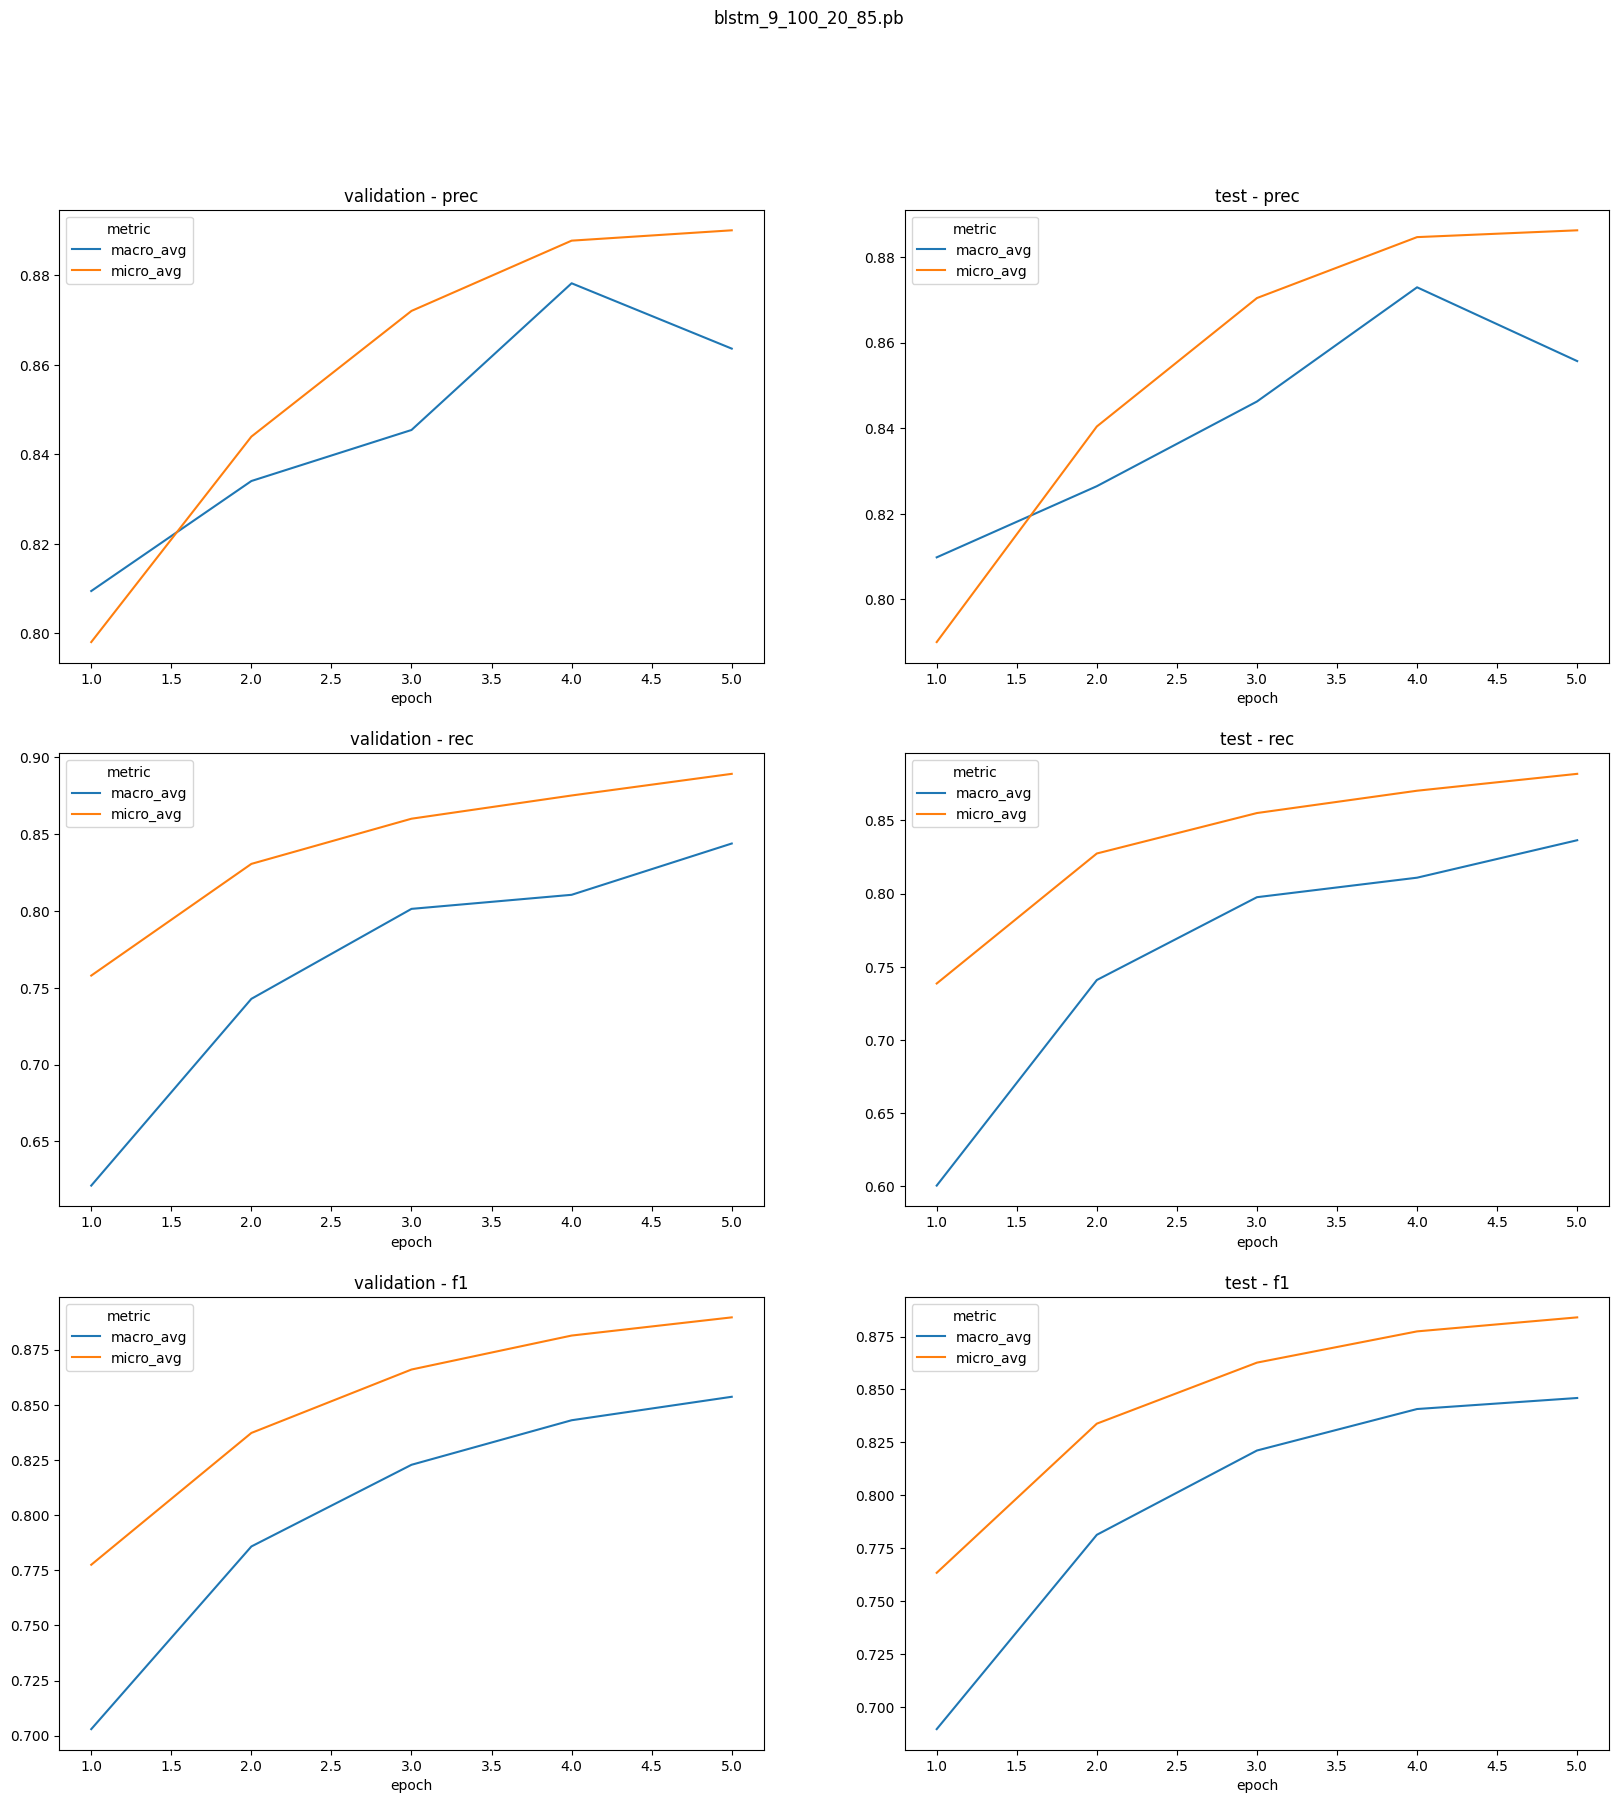

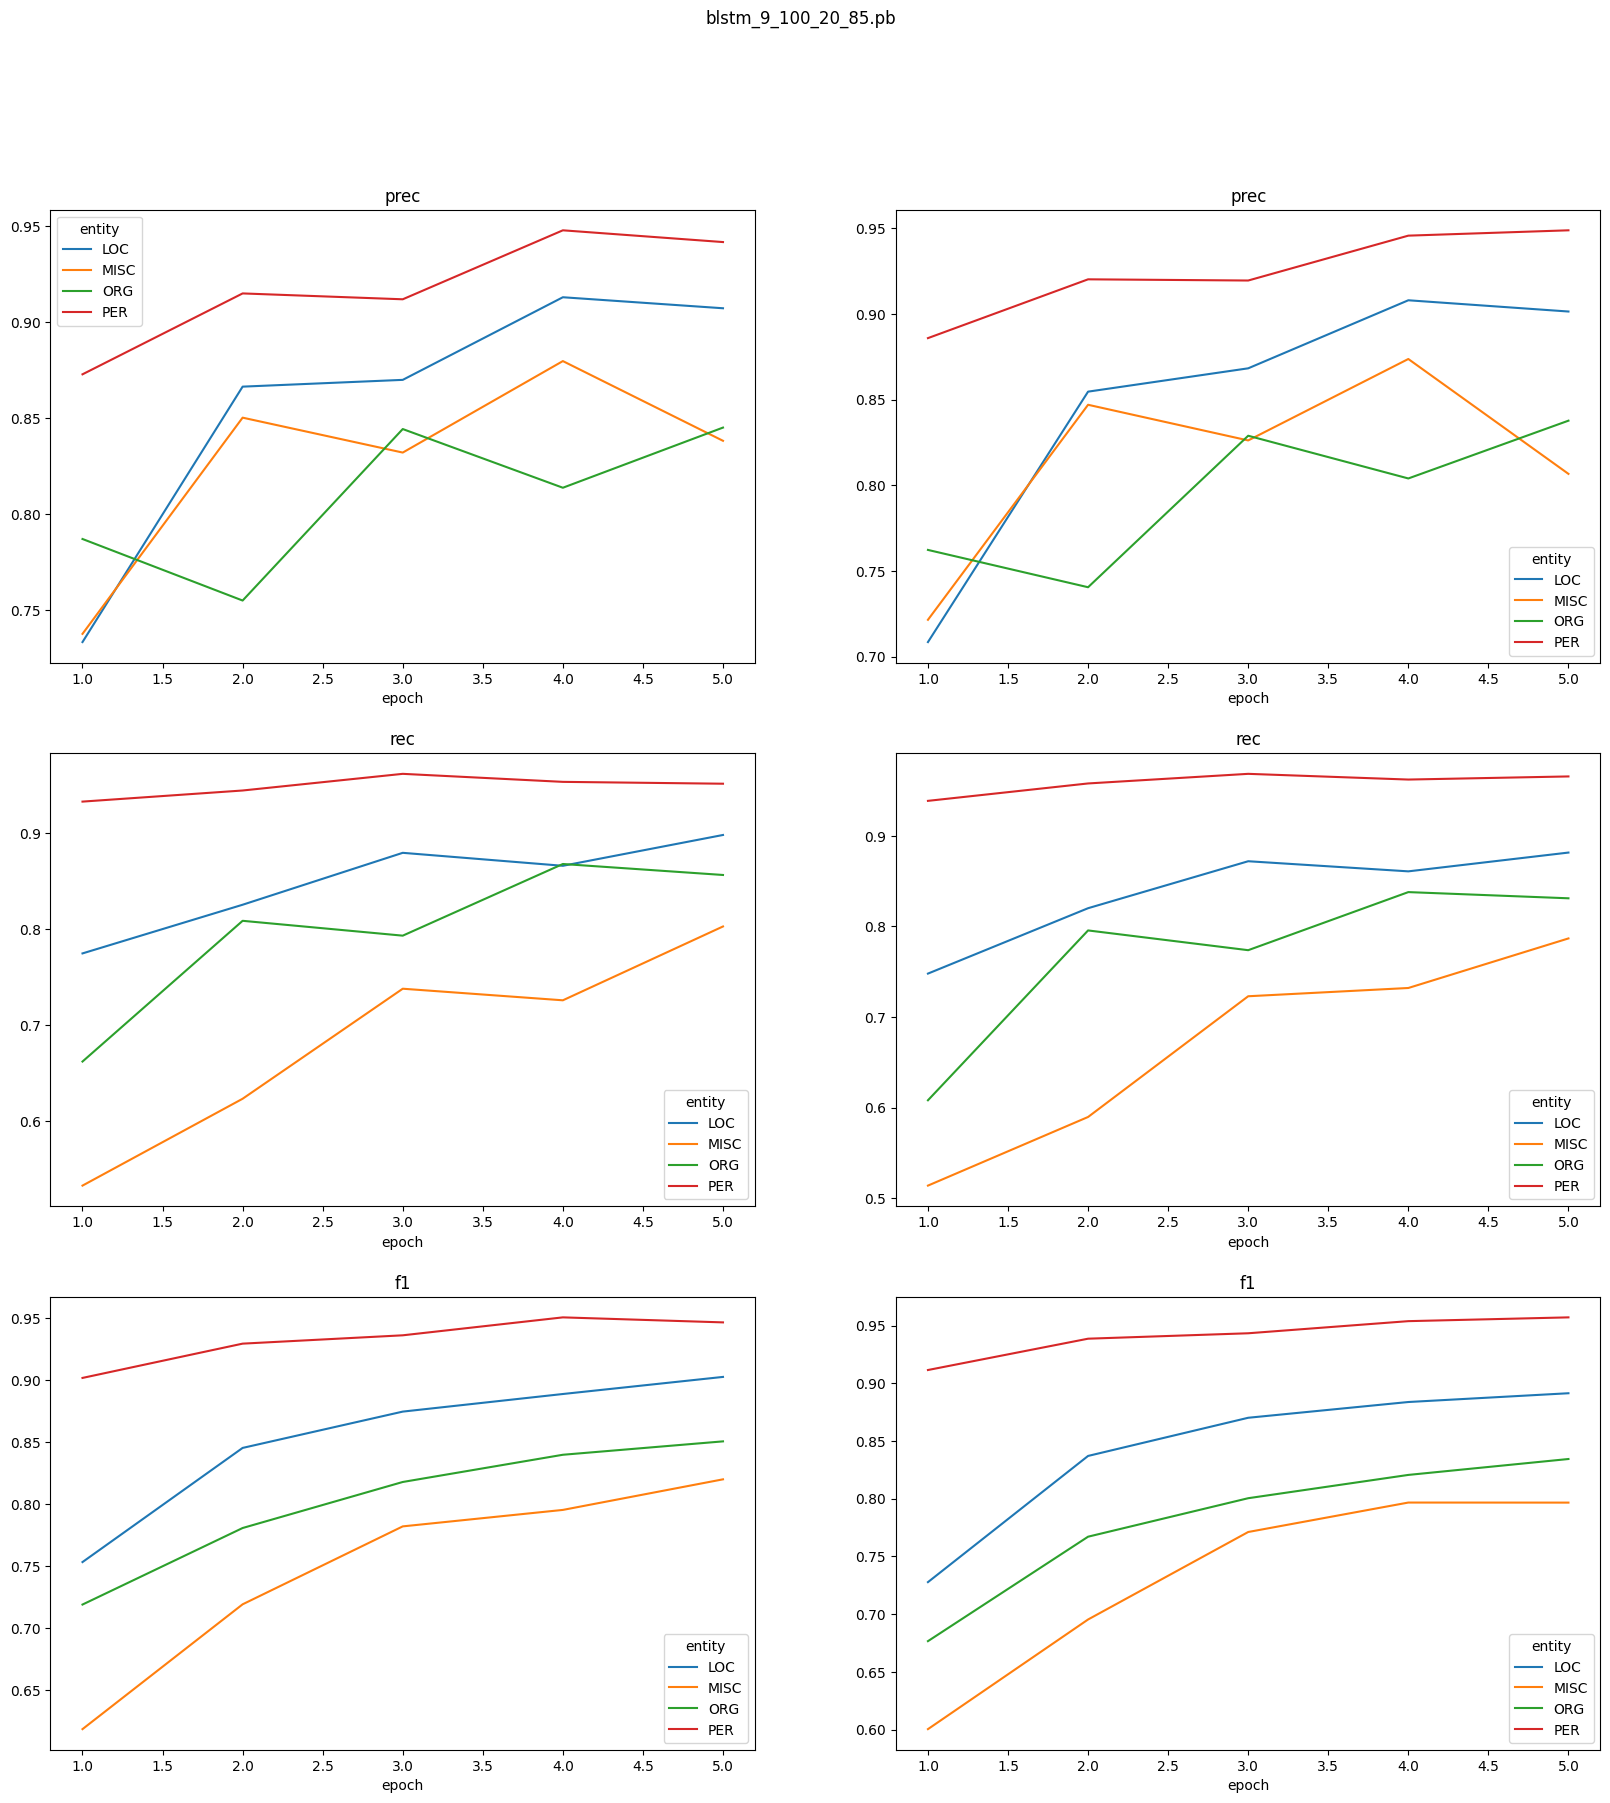

In [44]:
ner_log_parser.get_charts('./ner_logs_best/'+log_files[0])

**✔︎ Plotting Loss**

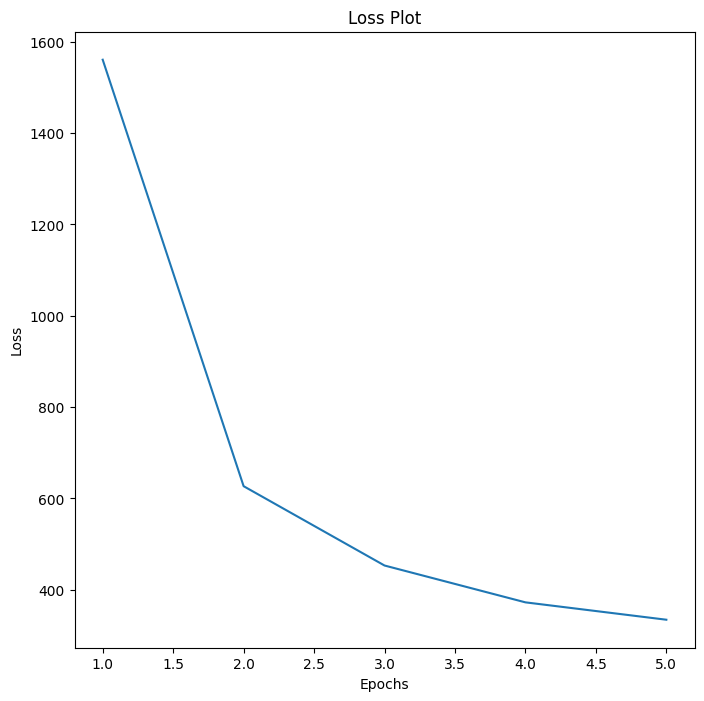

In [45]:
ner_log_parser.loss_plot('./ner_logs_best/'+log_files[0])

**✔︎ Saving the trained model**


In [46]:
ner_model.stages

[WORD_EMBEDDINGS_MODEL_48cffc8b9a76,
 TFNerDLGraphBuilderModel_f048796b3e9b,
 NerDLModel_57c31db07ca3]

In [47]:
ner_model.stages[-1].write().overwrite().save('NER_glove_e5_b32')

In [48]:
!ls -lt

total 5532
drwxr-xr-x 4 root root    4096 Oct  3 15:17 NER_glove_e5_b32
drwxr-xr-x 2 root root    4096 Oct  3 15:17 __pycache__
-rw-r--r-- 1 root root    3826 Oct  3 15:17 ner_log_parser.py
drwxr-xr-x 2 root root    4096 Oct  3 15:14 ner_logs_best
drwxr-xr-x 2 root root    4096 Oct  3 15:14 ner_graphs
drwxr-xr-x 2 root root    4096 Oct  3 15:14 ner_dl_test.parquet
-rw-r--r-- 1 root root    7431 Oct  3 15:13 conll_eval.py
drwxr-xr-x 2 root root    4096 Oct  3 15:12 ner_logs
-rw-r--r-- 1 root root  827443 Oct  3 15:09 eng.testa
-rw-r--r-- 1 root root 3283420 Oct  3 15:09 eng.train
drwxr-xr-x 1 root root    4096 Sep 29 13:23 sample_data
-rw-r--r-- 1 root root 1504408 Mar 16  2020 news_category_test.csv


**✔︎ Prediction Pipeline**

In [49]:
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence = SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentence')

token = Tokenizer()\
    .setInputCols(['sentence'])\
    .setOutputCol('token')

glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d')\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

# load trained model
loaded_ner_model = NerDLModel.load("NER_glove_e5_b32")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")

converter = NerConverter()\
    .setInputCols(["document", "token", "ner"])\
    .setOutputCol("ner_span")

ner_prediction_pipeline = Pipeline(
    stages = [
        document,
        sentence,
        token,
        glove_embeddings,
        loaded_ner_model,
        converter
])

prediction_model = ner_prediction_pipeline.fit(spark.createDataFrame([['']]).toDF("text"))

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [50]:
text = "Peter Parker is a nice guy and lives in New York."
sample_data = spark.createDataFrame([[text]]).toDF("text")

In [51]:
preds = prediction_model.transform(sample_data)

preds.select(F.explode(F.arrays_zip(preds.ner_span.result,
                                    preds.ner_span.metadata)).alias("entities")) \
      .select(F.expr("entities['0']").alias("chunk"),
              F.expr("entities['1'].entity").alias("entity")).show(truncate=False)

+------------+------+
|chunk       |entity|
+------------+------+
|Peter Parker|PER   |
|New York    |LOC   |
+------------+------+



**✔︎ with LightPipeline**

In [52]:
from sparknlp.base import LightPipeline

light_model = LightPipeline(prediction_model)

In [53]:
text = "Peter Parker is a nice guy and lives in New York."

result = light_model.annotate(text)

list(zip(result['token'], result['ner']))

[('Peter', 'B-PER'),
 ('Parker', 'I-PER'),
 ('is', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('guy', 'O'),
 ('and', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('New', 'B-LOC'),
 ('York', 'I-LOC'),
 ('.', 'O')]

In [54]:
import pandas as pd

result = light_model.fullAnnotate(text)

ner_df= pd.DataFrame([(int(x.metadata['sentence']), x.result, x.begin, x.end, y.result) for x,y in zip(result[0]["token"], result[0]["ner"])],
                      columns=['sent_id','token','start','end','ner'])
ner_df

sent_id   token  start  end    ner
0         0   Peter      0    4  B-PER
1         0  Parker      6   11  I-PER
2         0      is     13   14      O
3         0       a     16   16      O
4         0    nice     18   21      O
5         0     guy     23   25      O
6         0     and     27   29      O
7         0   lives     31   35      O
8         0      in     37   38      O
9         0     New     40   42  B-LOC
10        0    York     44   47  I-LOC
11        0       .     48   48      O

**✔︎ Highlight Entities**

In [55]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('recognize_entities_dl', lang='en')

recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]


In [56]:
ann_text = pipeline.fullAnnotate('Peter Parker is a nice persn and lives in New York. Bruce Wayne is also a nice guy and lives in Gotham City.')[0]
ann_text.keys()

dict_keys(['entities', 'document', 'token', 'ner', 'embeddings', 'sentence'])

In [57]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()
print ('Standard Output')
visualiser.display(ann_text, label_col='entities', document_col='document')

# Change color of an entity label
visualiser.set_label_colors({'LOC':'#008080', 'PER':'#800080'})
visualiser.display(ann_text, label_col='entities')

# Set label filter
visualiser.display(ann_text, label_col='entities', document_col='document',
                   labels=['PER'])

print ('\nColor code for label: \n"LOC": {}\n"PER": {}' .format(visualiser.get_label_color('LOC'),visualiser.get_label_color('PER')) )

Standard Output



Color code for label: 
"LOC": #008080
"PER": #800080


### 🚩 BertForTokenClassification



📚 For more user experience and information, check out this notebooks:

- [Transformers_for_Token_Classification_in_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/04.2.Transformers_for_Token_Classification_in_SparkNLP.ipynb)

- [Import_Transformers_Into_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/04.3.Import_Transformers_Into_SparkNLP.ipynb)

📌 BertForTokenClassification can load Bert Models with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.


📌 You can also import any models trained with the transformers library into Spark NLP for greater inference speed & scalability. Access our tutorials to do so in [this discussion thread](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669). You will find notebooks like [this one](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/transformers/HuggingFace%20in%20Spark%20NLP%20-%20BertForTokenClassification.ipynb) to import BertForTokenClassification models. The process is very straightforward and can be done in a few lines of code. Once you've downloaded the model and extracted its contents as described in the notebooks, it's as simple as running the following snippet:

✔︎ Now, let's create a Spark NLP Pipeline with bert_base_token_classifier_conll03 model and check the results.

In [58]:
document_assembler = DocumentAssembler() \
    .setInputCol('text') \
    .setOutputCol('document')

tokenizer = Tokenizer() \
    .setInputCols(['document']) \
    .setOutputCol('token')

tokenClassifier = BertForTokenClassification \
    .pretrained('bert_base_token_classifier_conll03', 'en') \
    .setInputCols(['token', 'document']) \
    .setOutputCol('ner') \
    .setCaseSensitive(True) \
    .setMaxSentenceLength(512)

# since output column is IOB/IOB2 style, NerConverter can extract entities
ner_converter = NerConverter() \
    .setInputCols(['document', 'token', 'ner']) \
    .setOutputCol('entities')

pipeline = Pipeline(stages=[document_assembler,
                            tokenizer,
                            tokenClassifier,
                            ner_converter])

example = spark.createDataFrame([['My name is John Parker! I live in New York and I am a member of the New York Road Runners.']]).toDF("text")
model = pipeline.fit(example)
result= model.transform(example)

bert_base_token_classifier_conll03 download started this may take some time.
Approximate size to download 385.4 MB
[OK!]


✔︎ We can check the classes of bert_base_token_classifier_conll03 model by using getClasses() function

In [59]:
tokenClassifier.getClasses()

['B-LOC', 'I-ORG', 'I-MISC', 'I-LOC', 'I-PER', 'B-MISC', 'B-ORG', 'O', 'B-PER']

✔︎ Checking the ner labels of each token

In [60]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.ner.result)).alias("cols"))\
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

+-------+---------+
|  token|ner_label|
+-------+---------+
|     My|        O|
|   name|        O|
|     is|        O|
|   John|    B-PER|
| Parker|    I-PER|
|      !|        O|
|      I|        O|
|   live|        O|
|     in|        O|
|    New|    B-LOC|
|   York|    I-LOC|
|    and|        O|
|      I|        O|
|     am|        O|
|      a|        O|
| member|        O|
|     of|        O|
|    the|        O|
|    New|    B-ORG|
|   York|    I-ORG|
|   Road|    I-ORG|
|Runners|    I-ORG|
|      .|        O|
+-------+---------+



✔︎ Inspecting the chunks

In [61]:
result_df_1 = result.select(F.explode(F.arrays_zip(result.entities.result,
                                                   result.entities.begin,
                                                   result.entities.end,
                                                   result.entities.metadata)).alias("col"))\
                    .select(F.expr("col['0']").alias("entities"),
                            F.expr("col['1']").alias("begin"),
                            F.expr("col['2']").alias("end"),
                            F.expr("col['3']['entity']").alias("ner_label"))

result_df_1.show(50, truncate=False)

+---------------------+-----+---+---------+
|entities             |begin|end|ner_label|
+---------------------+-----+---+---------+
|John Parker          |11   |21 |PER      |
|New York             |34   |41 |LOC      |
|New York Road Runners|68   |88 |ORG      |
+---------------------+-----+---+---------+



### 🚩 ZeroShot NER

📚 For more user experience and information, check out this notebooks:

- [ZeroShot NER](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/04.4.ZeroShot_NER.ipynb)

ZeroShotNerModel implements zero shot named entity recognition by utilizing RoBERTa transformer models fine tuned on a question answering task.

Its input is a list of document annotations and it automatically generates questions which are used to recognize entities. The definitions of entities is given by a dictionary structures, specifying a set of questions for each entity. The model is based on RoBertaForQuestionAnswering.

In [62]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = SentenceDetector() \
    .setInputCols(["document"]) \
    .setOutputCol("sentence")

tokenizer = Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("token")

zero_shot_ner = ZeroShotNerModel() \
    .pretrained() \
    .setEntityDefinitions(
        {
            "NAME": ["What is his name?", "What is my name?", "What is her name?"],
            "CITY": ["Which city?", "Which is the city?"]
        }) \
    .setInputCols(["sentence", "token"]) \
    .setOutputCol("zero_shot_ner")

ner_converter = NerConverter()\
    .setInputCols(["sentence", "token", "zero_shot_ner"])\
    .setOutputCol("ner_chunk")

pipeline = Pipeline(stages = [
    document_assembler,
    sentence_detector,
    tokenizer,
    zero_shot_ner,
    ner_converter])

zero_shot_ner_model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

zero_shot_ner_roberta download started this may take some time.
Approximate size to download 442.3 MB
[OK!]


In [63]:
from pyspark.sql.types import StringType

text_list = ["My name is Clara, I live in New York and Hellen lives in Paris."]

data = spark.createDataFrame(text_list, StringType()).toDF("text")

results = zero_shot_ner_model.transform(data)

In [64]:
results.selectExpr("document", "explode(zero_shot_ner) AS entity") \
    .select(
        "document.result",
        "entity.result",
        "entity.metadata.word",
        "entity.metadata.confidence",
        "entity.metadata.question") \
    .show(truncate=False)

+-----------------------------------------------------------------+------+------+----------+------------------+
|result                                                           |result|word  |confidence|question          |
+-----------------------------------------------------------------+------+------+----------+------------------+
|[My name is Clara, I live in New York and Hellen lives in Paris.]|O     |My    |null      |null              |
|[My name is Clara, I live in New York and Hellen lives in Paris.]|O     |name  |null      |null              |
|[My name is Clara, I live in New York and Hellen lives in Paris.]|O     |is    |null      |null              |
|[My name is Clara, I live in New York and Hellen lives in Paris.]|B-NAME|Clara |0.93601286|What is my name?  |
|[My name is Clara, I live in New York and Hellen lives in Paris.]|O     |,     |null      |null              |
|[My name is Clara, I live in New York and Hellen lives in Paris.]|O     |I     |null      |null        

In [66]:
results.select(F.explode(F.arrays_zip(results.ner_chunk.result,
                                      results.ner_chunk.metadata)).alias("cols"))\
       .select(F.expr("cols['0']").alias("chunk"),
               F.expr("cols['1']['entity']").alias("ner_label"),
               F.expr("cols['1']['confidence']").alias("confidence")).show(50, truncate=100)

+--------+---------+----------+
|   chunk|ner_label|confidence|
+--------+---------+----------+
|   Clara|     NAME|0.93601286|
|New York|     CITY|0.83294845|
|  Hellen|     NAME| 0.4536752|
|   Paris|     CITY| 0.5328989|
+--------+---------+----------+



# 📍 Text Classification

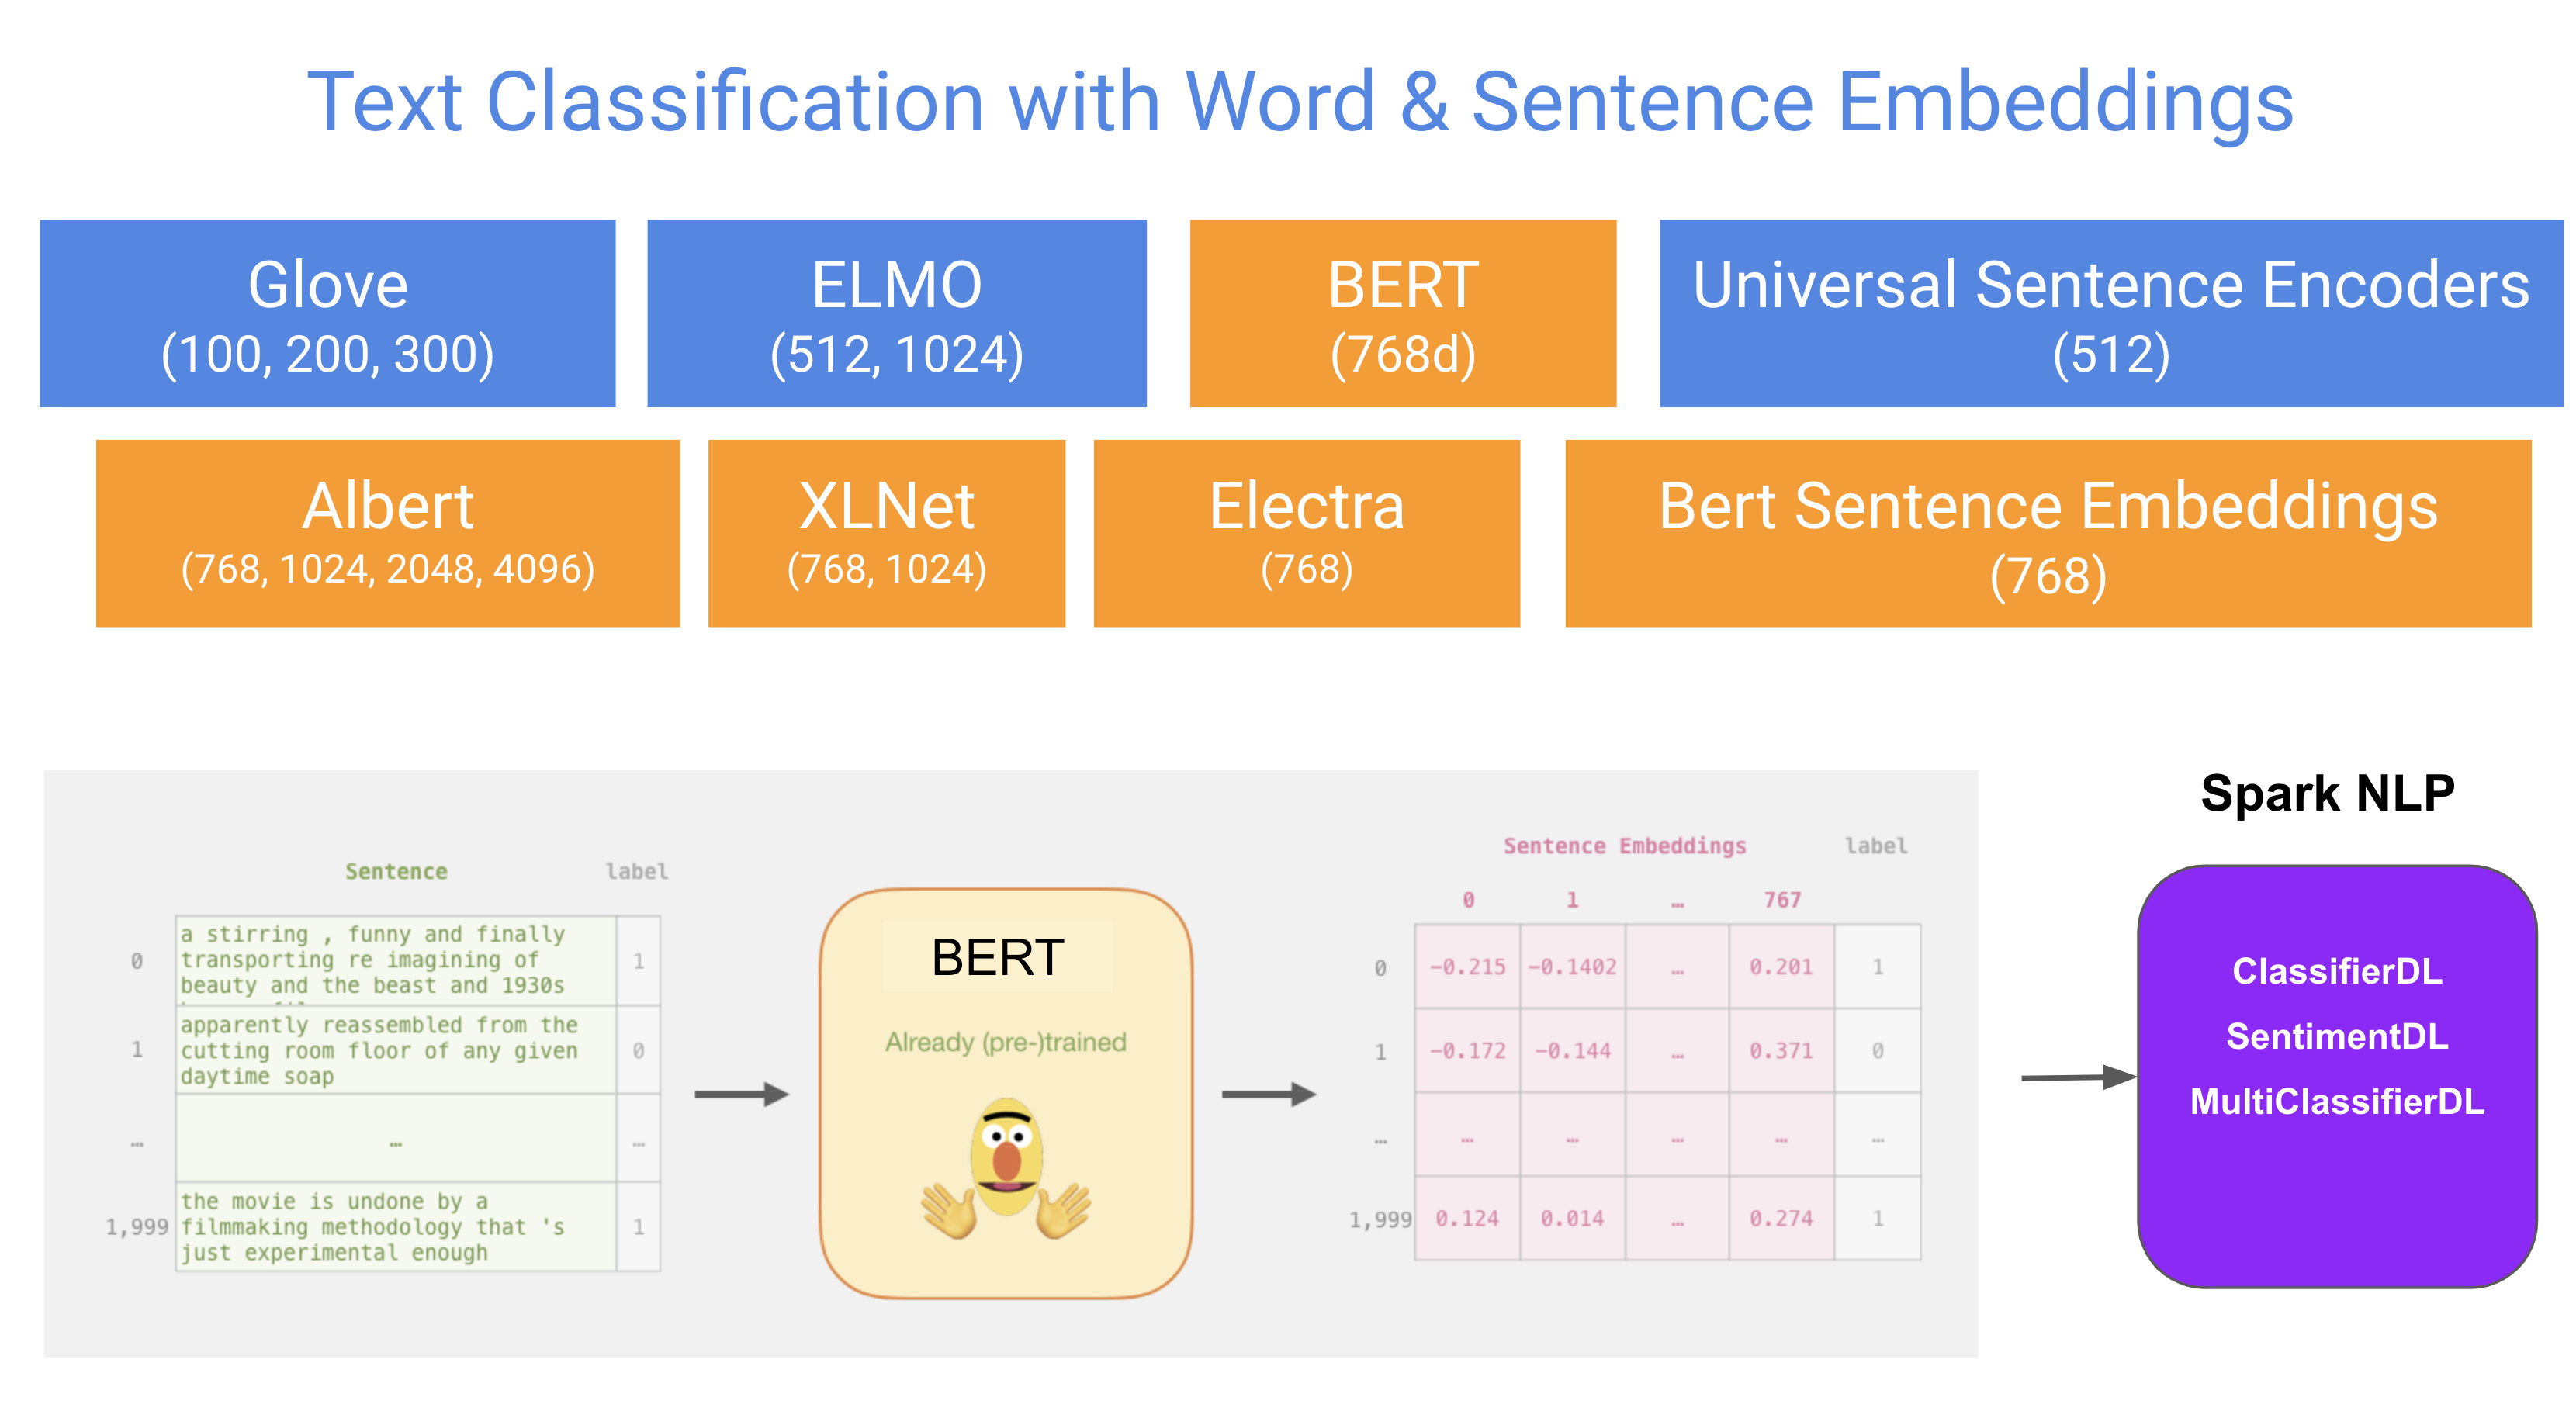

📚 For more user experience and information, check out this notebooks :

- [Text_Classification_with_ClassifierDL](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.0.Text_Classification_with_ClassifierDL.ipynb)

- [SentimentDL_Train_Multiclass_Sentiment_Classifier](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/SentimentDL_train_multiclass_sentiment_classifier.ipynb)

- [MultiClassifierDL_Train_Multi_Label_Toxic_Classifier](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/MultiClassifierDL_train_multi_label_toxic_classifier.ipynb)

- [Text_Classification_Examples_in_SparkML_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.1.Text_Classification_Examples_in_SparkML_SparkNLP.ipynb)

- [Transformers_for_Sequence_Classification_in_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.2.Transformers_for_Sequence_Classification_in_SparkNLP.ipynb)

- [Multi_Lingual_Training_and_Models](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.3.Multi_Lingual_Training_and_Models.ipynb)

## 🚩 ClassifierDL

📚 For more user experience and information, check out this notebook  ➤➤
        [Text_Classification_with_ClassifierDL](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.0.Text_Classification_with_ClassifierDL.ipynb)


📌 Relevant blogpost: [Text-Classification-in-Spark-NLP](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32)

### 🔹 Pretrained Model

**✔︎ classifierdl_use_emotion Model**

In [67]:
text ='I am SO happy the news came out in time for my birthday this weekend! My inner 7-year-old cannot WAIT!'

In [68]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained(lang="en") \
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")

document_classifier = ClassifierDLModel.pretrained("classifierdl_use_emotion", 'en') \
    .setInputCols(["sentence_embeddings"]) \
    .setOutputCol("class")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler,
        use,
        document_classifier
])

clf_pipelineFit = nlpPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

clf_lp_pipeline = LightPipeline(clf_pipelineFit)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]


In [69]:
clf_lp_pipeline.annotate(text)['class']

['surprise']

### 🔹 Training

✔︎ Load Dataset

In [70]:
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_test.csv

✔︎ Train Dataset

In [71]:
trainDataset = spark.read \
    .option("header", True) \
    .csv("news_category_train.csv")

trainDataset.show(truncate=50)

+--------+--------------------------------------------------+
|category|                                       description|
+--------+--------------------------------------------------+
|Business| Short sellers, Wall Street's dwindling band of...|
|Business| Private investment firm Carlyle Group, which h...|
|Business| Soaring crude prices plus worries about the ec...|
|Business| Authorities have halted oil export flows from ...|
|Business| Tearaway world oil prices, toppling records an...|
|Business| Stocks ended slightly higher on Friday but sta...|
|Business| Assets of the nation's retail money market mut...|
|Business| Retail sales bounced back a bit in July, and n...|
|Business|" After earning a PH.D. in Sociology, Danny Baz...|
|Business| Short sellers, Wall Street's dwindling  band o...|
|Business| Soaring crude prices plus worries  about the e...|
|Business| OPEC can do nothing to douse scorching  oil pr...|
|Business| Non OPEC oil exporters should consider  increa...|
|Busines

In [72]:
trainDataset.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|   World|30000|
|Sci/Tech|30000|
|  Sports|30000|
|Business|30000|
+--------+-----+



✔︎ Test Dataset

In [73]:
testDataset = spark.read \
    .option("header", True) \
    .csv("news_category_test.csv")


testDataset.groupBy("category") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+--------+-----+
|category|count|
+--------+-----+
|   World| 1900|
|Sci/Tech| 1900|
|  Sports| 1900|
|Business| 1900|
+--------+-----+



In [ ]:
# if we want to split the dataset
'''
(trainingData, testData) = trainDataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))
'''

In [75]:
document_assembler = DocumentAssembler() \
    .setInputCol("description") \
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized")

stopwords_cleaner = StopWordsCleaner()\
    .setInputCols("normalized")\
    .setOutputCol("cleanTokens")\
    .setCaseSensitive(False)

lemma = LemmatizerModel.pretrained('lemma_antbnc') \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("lemma")

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


📌 **with Glove 100d embeddings**

In [76]:
glove_embeddings = WordEmbeddingsModel().pretrained() \
    .setInputCols(["document",'lemma'])\
    .setOutputCol("embeddings")\
    .setCaseSensitive(False)

embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")

classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("category")\
    .setMaxEpochs(8)\
    .setEnableOutputLogs(True)
    #.setOutputLogsPath('logs')

clf_pipeline = Pipeline(
    stages=[
        document_assembler,
        tokenizer,
        normalizer,
        stopwords_cleaner,
        lemma,
        glove_embeddings,
        embeddingsSentence,
        classsifierdl
])

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
'''
default classifierDL params:

    maxEpochs -> 10,
    lr -> 5e-3f,
    dropout -> 0.5f,
    batchSize -> 64,
    enableOutputLogs -> false,
    verbose -> Verbose.Silent.id,
    validationSplit -> 0.0f,
    outputLogsPath -> ""

'''

In [78]:
# Train (3 min for 3 epochs)
%%time

clf_pipelineModel = clf_pipeline.fit(trainDataset)

CPU times: user 989 ms, sys: 106 ms, total: 1.09 s
Wall time: 2min 47s


In [79]:
import os
log_file_name = os.listdir("/root/annotator_logs")[0]

with open("/root/annotator_logs/"+log_file_name, "r") as log_file :
    print(log_file.read())

Training started - epochs: 8 - learning_rate: 0.005 - batch_size: 64 - training_examples: 120000 - classes: 4
Epoch 0/8 - 13.31s - loss: 1629.5529 - acc: 0.86796665 - batches: 1875
Epoch 1/8 - 12.84s - loss: 1606.5092 - acc: 0.8807167 - batches: 1875
Epoch 2/8 - 13.02s - loss: 1599.6333 - acc: 0.885225 - batches: 1875
Epoch 3/8 - 12.91s - loss: 1595.1276 - acc: 0.88865 - batches: 1875
Epoch 4/8 - 12.66s - loss: 1591.1294 - acc: 0.8911667 - batches: 1875
Epoch 5/8 - 12.78s - loss: 1589.1573 - acc: 0.89313334 - batches: 1875
Epoch 6/8 - 12.89s - loss: 1587.3057 - acc: 0.89505 - batches: 1875
Epoch 7/8 - 13.14s - loss: 1583.0074 - acc: 0.89684165 - batches: 1875



In [80]:
# get the predictions on test Set

preds = clf_pipelineModel.transform(testDataset)

In [81]:
preds.select('category','description',"class.result").show(10, truncate=80)

+--------+--------------------------------------------------------------------------------+----------+
|category|                                                                     description|    result|
+--------+--------------------------------------------------------------------------------+----------+
|Business|Unions representing workers at Turner   Newall say they are 'disappointed' af...|[Business]|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 mil...|[Sci/Tech]|
|Sci/Tech| A company founded by a chemistry researcher at the University of Louisville ...|[Sci/Tech]|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts his shift with a blur of color...|[Sci/Tech]|
|Sci/Tech| Southern California's smog fighting agency went after emissions of the bovin...|[Sci/Tech]|
|Sci/Tech|"The British Department for Education and Skills (DfES) recently launched a "...|[Sci/Tech]|
|Sci/Tech|"confessed author of the Netsky and Sasser viruses, is responsi

In [82]:
preds_df = preds.select('category','description',"class.result").toPandas()

# The result is an array since in Spark NLP you can have multiple sentences.
# Let's explode the array and get the item(s) inside of result column out
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

In [83]:
# We are going to use sklearn to evalute the results on test dataset
from sklearn.metrics import classification_report

print (classification_report(preds_df['category'], preds_df['result']))

              precision    recall  f1-score   support

    Business       0.83      0.85      0.84      1900
    Sci/Tech       0.84      0.87      0.85      1900
      Sports       0.95      0.96      0.96      1900
       World       0.92      0.86      0.89      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



**✔︎ Getting prediction from Trained model**

In [84]:
from sparknlp.base import LightPipeline

light_model = LightPipeline(clf_pipelineModel)

In [85]:
testDataset.select('description').take(2)

[Row(description="Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."),
 Row(description=' TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for privately funded suborbital space flight, has officially announced the first launch date for its manned rocket.')]

In [86]:
text='''
Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group, which has a reputation for making well-timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market.
'''
result = light_model.annotate(text)

result['class']

['Business']

In [87]:
light_model.annotate('the soccer games will be postponed.')

{'lemma': ['soccer', 'game', 'postpone'],
 'document': ['the soccer games will be postponed.'],
 'normalized': ['the', 'soccer', 'games', 'will', 'be', 'postponed'],
 'sentence_embeddings': ['the soccer games will be postponed.'],
 'cleanTokens': ['soccer', 'games', 'postponed'],
 'token': ['the', 'soccer', 'games', 'will', 'be', 'postponed', '.'],
 'class': ['Sports'],
 'embeddings': ['soccer', 'game', 'postpone']}

**✔︎ Save model and Zip it for Modelshub Upload/Downloads**

In [88]:
# Save a Spark NLP pipeline
clf_pipelineModel.save('my_nlp_pipeline')

# cd into saved dir and zip
! cd ./my_nlp_pipeline ; zip -r my_nlp_pipeline.zip *

  adding: metadata/ (stored 0%)
  adding: metadata/part-00000 (deflated 26%)
  adding: metadata/._SUCCESS.crc (stored 0%)
  adding: metadata/.part-00000.crc (stored 0%)
  adding: metadata/_SUCCESS (stored 0%)
  adding: stages/ (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/ (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/metadata/ (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/metadata/part-00000 (deflated 40%)
  adding: stages/2_NORMALIZER_0b2dccdececa/metadata/._SUCCESS.crc (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/metadata/.part-00000.crc (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/metadata/_SUCCESS (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/fields/ (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/fields/slangDict/ (stored 0%)
  adding: stages/2_NORMALIZER_0b2dccdececa/fields/slangDict/part-00003 (deflated 27%)
  adding: stages/2_NORMALIZER_0b2dccdececa/fields/slangDict/.part-00005.crc (stored 0%)
  adding: stages/2_NO

## 🚩 SentimentDL

📚 For more user experience and information, check out this notebook  ➤➤
        [Text_Classification_with_ClassifierDL](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.0.Text_Classification_with_ClassifierDL.ipynb)

📚 For more user experience and information, check out this notebook  ➤➤
        [SentimentDL_Train_Multiclass_Sentiment_Classifier](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/SentimentDL_train_multiclass_sentiment_classifier.ipynb)

In [89]:
!wget -q aclimdb_train.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sentiment-corpus/aclimdb/aclimdb_train.csv
!wget -q aclimdb_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sentiment-corpus/aclimdb/aclimdb_test.csv

In [90]:
trainDataset = spark.read \
      .option("header", True) \
      .csv("aclimdb_train.csv")

trainDataset.show(5,truncate=30)

+------------------------------+--------+
|                          text|   label|
+------------------------------+--------+
|This is an Excellent little...|positive|
|The Sarah Silverman program...|positive|
|"Prom Night" is a title-onl...|negative|
|So often a band will get to...|positive|
|"Pet Sematary" is an adapta...|positive|
+------------------------------+--------+
only showing top 5 rows



In [91]:
testDataset = spark.read \
      .option("header", True) \
      .csv("aclimdb_test.csv")

testDataset.show(5,truncate = 30)

+------------------------------+--------+
|                          text|   label|
+------------------------------+--------+
|The Second Woman is about t...|negative|
|In my opinion the directing...|positive|
|I am listening to Istanbul,...|positive|
|Before I speak my piece, I ...|negative|
|ManBearPig is a pretty funn...|positive|
+------------------------------+--------+
only showing top 5 rows



In [92]:
# actual content is inside description column
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained("tfhub_use_lg", "en") \
    .setInputCols("document") \
    .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
sentimentdl = SentimentDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("label")\
    .setMaxEpochs(5)\
    .setEnableOutputLogs(True)

pipeline = Pipeline(
    stages = [
        document,
        use,
        sentimentdl])

tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
[OK!]


In [93]:
%%time
pipelineModel = pipeline.fit(trainDataset)

CPU times: user 8.44 s, sys: 914 ms, total: 9.35 s
Wall time: 21min 53s


In [94]:
result = pipelineModel.transform(testDataset)

In [95]:
result_df = result.select('text','label',"class.result").toPandas()
result_df.head(10)

text     label      result
0  The Second Woman is about the story of a myste...  negative  [positive]
1  In my opinion the directing, editing, lighting...  positive  [positive]
2  I am listening to Istanbul, intent, my eyes cl...  positive  [positive]
3  Before I speak my piece, I would like to make ...  negative   [neutral]
4  ManBearPig is a pretty funny episode of South ...  positive  [positive]
5  A buddy and I went to see this movie when it c...  negative  [negative]
6  It is incredible that there were two films wit...  negative  [negative]
7  Dire! Dismal! Awful! Laughable! Disappointing!...  negative  [negative]
8  HLOTS was an outstanding series, its what NYPD...  positive  [positive]
9  This is just one of those films which cannot j...  negative  [negative]

## 🚩 BertForSequenceClassification


📚 For more user experience and information, check out this notebook  ➤➤
        [Transformers_for_Sequence_Classification_in_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/05.2.Transformers_for_Sequence_Classification_in_SparkNLP.ipynb)

📌 BertForSequenceClassification can load Bert Models with sequence classification/regression head on top (a linear layer on top of the pooled output) e.g. for multi-class document classification tasks.

📌 You can also import any models trained with the transformers library into Spark NLP for greater inference speed & scalability. Access our tutorials to do so in [this discussion thread](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669). You will find notebooks like [this one](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/transformers/HuggingFace%20in%20Spark%20NLP%20-%20BertForSequenceClassification.ipynb) to import BertForSequenceClassification models. The process is very straightforward and can be done in a few lines of code. Once you've downloaded the model and extracted its contents as described in the notebooks, it's as simple as running the following snippet:

✔︎ Let's create a Spark NLP Pipeline with bert_base_sequence_classifier_imdb model and check the results.

In [96]:
document_assembler = DocumentAssembler() \
    .setInputCol('text') \
    .setOutputCol('document')

tokenizer = Tokenizer() \
    .setInputCols(['document']) \
    .setOutputCol('token')

sequenceClassifier = BertForSequenceClassification \
    .pretrained('bert_base_sequence_classifier_imdb', 'en') \
    .setInputCols(['token', 'document']) \
    .setOutputCol('pred_class') \
    .setCaseSensitive(True) \
    .setMaxSentenceLength(512)

pipeline = Pipeline(
    stages=[
        document_assembler,
        tokenizer,
        sequenceClassifier
])

sample_text= [["I really liked that movie!"], ["The last movie I watched was awful!"]]
sample_df= spark.createDataFrame(sample_text).toDF("text")

result = pipeline.fit(sample_df).transform(sample_df)

bert_base_sequence_classifier_imdb download started this may take some time.
Approximate size to download 387.6 MB
[OK!]


✔︎ We can check the classes of bert_base_sequence_classifier_imdb model by using getClasses() function.

In [97]:
sequenceClassifier.getClasses()

['pos', 'neg']

✔︎ And this is the result on fit/transform

In [98]:
result_df= result.select(F.explode(F.arrays_zip(result.document.result,
                                                result.pred_class.result)).alias("col"))\
                 .select(F.expr("col['0']").alias("sentence"),
                         F.expr("col['1']").alias("prediction"))

result_df.show(truncate=False)

+-----------------------------------+----------+
|sentence                           |prediction|
+-----------------------------------+----------+
|I really liked that movie!         |pos       |
|The last movie I watched was awful!|neg       |
+-----------------------------------+----------+



# 📍 TAPAS for Table Queastion Answering Using Spark NLP



📚 For more user experience and information, check out this notebook  ➤➤
        [Table_Question_Answering](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/15.0.Table_Question_Answering.ipynb)

📌 [TAPAS](https://arxiv.org/abs/2004.02349) is a Zero-shot Question Answering architecture, based on Bert, to carry out Table Understanding. By asking a question on natural language using these models, you can retrieve the content of the cell or cells which best answer to those questions.

✔︎ Let's create an example table and some questions

In [99]:
json_data = """
{
  "header": ["name", "money", "age"],
  "rows": [
    ["Donald Trump", "$100,000,000", "75"],
    ["Elon Musk", "$20,000,000,000,000", "55"]
  ]
}
"""

queries = [
    "Who earns less than 200,000,000?",
    "Who earns 100,000,000?",
    "How much money has Donald Trump?",
    "How old are they?",
]

In [100]:
data = spark.createDataFrame([
        [json_data, " ".join(queries)]
    ]).toDF("table_json", "questions")

✔︎ Let's create pipeline

In [101]:
from sparknlp.annotator import TapasForQuestionAnswering, SentenceDetector
from sparknlp.base import MultiDocumentAssembler, TableAssembler


#TAPAS needs a specific annotator, called MultiDocumentAssembler to assemble the table and the questions.
document_assembler = MultiDocumentAssembler() \
    .setInputCols("table_json", "questions") \
    .setOutputCols("document_table", "document_questions")

sentence_detector = SentenceDetector() \
    .setInputCols(["document_questions"]) \
    .setOutputCol("questions")

# Then, we tell Spark NLP to manage document_table column as a table using a new annotator, TableAssembler
table_assembler = TableAssembler()\
    .setInputCols(["document_table"])\
    .setOutputCol("table")

# Last component is TapasForQuestionAnswering, which will carry out the inference process
tapas = TapasForQuestionAnswering\
    .pretrained("table_qa_tapas_base_finetuned_wtq", "en")\
    .setInputCols(["questions", "table"])\
    .setOutputCol("answers")

pipeline = Pipeline(
    stages=[
        document_assembler,
        sentence_detector,
        table_assembler,
        tapas
])

table_qa_tapas_base_finetuned_wtq download started this may take some time.
Approximate size to download 394.7 MB
[OK!]


✔︎ And this is the result on fit/transform

In [102]:
model = pipeline.fit(data).transform(data)

model.selectExpr("explode(answers) AS answer")\
     .select("answer")\
     .show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|answer                                                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|{chunk, 0, 12, Donald Trump, {question -> Who earns less than 200,000,000?, aggregation -> NONE, cell_positions -> [0, 0], cell_scores -> 1.0}, []}    |
|{chunk, 0, 12, Donald Trump, {question -> Who earns 100,000,000?, aggregation -> NONE, cell_positions -> [0, 0], cell_scores -> 1.0}, []}              |
|{chunk, 0, 17, SUM($100,000,000), {question -> How much money has Donald Trump?, aggregation -> SUM, cell_positions -> [1, 0], cell_scores -> 1.0}, []}|
|{chunk, 0, 15, AVERAGE(75, 55), {question -> How old are they?, aggregation

# 📍 ViT for Image Classification with Transformers





📚 For more user experience and information, check out this notebook  ➤➤
        [ViT_for_Image_Classification](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/16.0.ViT_for_Image_Classification.ipynb)

📌 When pre-trained on large amounts of data and transferred to multiple mid-sized or small image recognition benchmarks (ImageNet, CIFAR-100, VTAB, etc.), Vision Transformer (ViT) attains excellent results compared to state-of-the-art convolutional networks while requiring substantially fewer computational resources to train.




📌You can check [Scale Vision Transformers (ViT) Beyond Hugging Face](https://hackernoon.com/scale-vision-transformers-vit-beyond-hugging-face) article to learn deeper how ViT works and how it is implemeted in Spark NLP.



📌 Additional blogposts and videos:


*   [Vision Transformer (ViT) - Hugging Face](https://huggingface.co/docs/transformers/model_doc/vit)
*   [Vision Transformers (ViT) in Image Recognition – 2022 Guide](https://viso.ai/deep-learning/vision-transformer-vit/)
*   [Image Classification using Huggingface ViT | by Kenji Tee](https://medium.com/@kenjiteezhen/image-classification-using-huggingface-vit-261888bfa19f)
*   [Vision Transformer for Image Classification - Video](https://www.youtube.com/watch?v=HZ4j_U3FC94)
*   [Using Transformers for Image Classification | HuggingFace - Video](https://www.youtube.com/watch?v=Bjp7hebC67E)

 ✔︎ Download Images

In [103]:
!wget -q https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/images/images.zip

import shutil
shutil.unpack_archive("images.zip", "images", "zip")

In [104]:
data_df = spark.read.format("image").option("dropInvalid", value = True).load(path="./images/images/")

✔︎ Pipeline with ViTForImageClassification

In [105]:
image_assembler = ImageAssembler() \
    .setInputCol("image") \
    .setOutputCol("image_assembler")

image_classifier = ViTForImageClassification \
    .pretrained() \
    .setInputCols("image_assembler") \
    .setOutputCol("classes")

pipeline = Pipeline(
    stages=[
        image_assembler,
        image_classifier,
])

model = pipeline.fit(data_df)

image_classifier_vit_base_patch16_224 download started this may take some time.
Approximate size to download 309.7 MB
[OK!]


In [106]:
# let us check the counts of classes in this model
len(image_classifier.getClasses())

999

In [107]:
image_classifier.getClasses()[:10]

['turnstile',
 'damselfly',
 'mixing bowl',
 'sea snake',
 'cockroach, roach',
 'buckle',
 'beer glass',
 'bulbul',
 'lumbermill, sawmill',
 'whippet']

✔︎ Lets transform the data.

In [108]:
image_df = model.transform(data_df)

In [109]:
image_df.show(truncate=40)

+----------------------------------------+----------------------------------------+----------------------------------------+
|                                   image|                         image_assembler|                                 classes|
+----------------------------------------+----------------------------------------+----------------------------------------+
|{file:///content/images/images/palace...|[{image, file:///content/images/image...|[{category, 0, 5, palace, {nChannels ...|
|{file:///content/images/images/egypti...|[{image, file:///content/images/image...|[{category, 0, 11, Egyptian cat, {nCh...|
|{file:///content/images/images/hippop...|[{image, file:///content/images/image...|[{category, 0, 55, hippopotamus, hipp...|
|{file:///content/images/images/hen.JP...|[{image, file:///content/images/image...|[{category, 0, 2, hen, {nChannels -> ...|
|{file:///content/images/images/ostric...|[{image, file:///content/images/image...|[{category, 0, 24, ostrich, Struthio ...|


In [110]:
image_df.select(F.explode(F.arrays_zip(image_df.classes.metadata,
                                       image_df.classes.result)).alias("cols"))\
        .select(F.expr("cols['0']['origin']").alias("images"),
                F.expr("cols['0']['width']").alias("width"),
                F.expr("cols['0']['height']").alias("height"),
                F.expr("cols['1']").alias("class")).show(truncate=False)

+-----------------------------------------------+-----+------+--------------------------------------------------------+
|images                                         |width|height|class                                                   |
+-----------------------------------------------+-----+------+--------------------------------------------------------+
|file:///content/images/images/palace.JPEG      |500  |334   |palace                                                  |
|file:///content/images/images/egyptian_cat.jpeg|640  |480   |Egyptian cat                                            |
|file:///content/images/images/hippopotamus.JPEG|500  |333   |hippopotamus, hippo, river horse, Hippopotamus amphibius|
|file:///content/images/images/hen.JPEG         |500  |375   |hen                                                     |
|file:///content/images/images/ostrich.JPEG     |300  |400   |ostrich, Struthio camelus                               |
|file:///content/images/images/junco.JPE

# 📍 Automatic Speech Recognition in Spark NLP




📚 For more user experience and information, check out this notebook  ➤➤
        [Automatic_Speech_Recognition_Wav2Vec2](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/17.0.Automatic_Speech_Recognition_Wav2Vec2.ipynb)

📌Automatic Speech Recognition or ASR, as it’s known in short, is the technology that allows human beings to use their voices to speak with a computer interface in a way that, in its most sophisticated variations, resembles normal human conversation.

📌The main goal of an automatic speech recognition system (ASR) is to “simulate” the human listener that can “understand” a spoken language and “respond”. This means the ASR must first of all convert the speech into another medium such as text.

📌**Wav2Vec2ForCTC annotator in Spark NLP:**

`Wav2Vec2ForCTC` can load Wav2Vec2 models for the Automatic Speech Recognition (ASR) task. Wav2Vec2 is a multi-modal model, that combines speech and text. It's the first multi-modal model of its kind we welcome in Spark NLP. This annotator is compatible with all the models trained/fine-tuned by using Wav2Vec2ForCTC for PyTorch or TFWav2Vec2ForCTC for TensorFlow models in HuggingFace.

☞The accepted dataset is an already processed/re-sampled audio file in the format of Array[Floats]


🔗 List of all available ASR [models](https://nlp.johnsnowlabs.com/models?task=Automatic+Speech+Recognition&type=model)

🔗 List of all available ASR [pipelines](https://nlp.johnsnowlabs.com/models?task=Automatic+Speech+Recognition&type=pipeline)

📌Additional blogposts and videos:

* https://huggingface.co/tasks/automatic-speech-recognition
* https://huggingface.co/docs/transformers/model_doc/wav2vec2
* https://medium.com/usabilitygeek/automatic-speech-recognition-asr-software-an-introduction-824390b9282d

### 🔹 Spark NLP ASR Model

✔︎ Loading an audio file. Let's download a sample Wav file

In [111]:
!wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/audio/samples/wavs/ngm_12484_01067234848.wav

--2023-10-03 16:49:38--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/audio/samples/wavs/ngm_12484_01067234848.wav
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.170.48, 52.217.171.72, 52.216.57.72, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.170.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417836 (408K) [audio/wav]
Saving to: ‘ngm_12484_01067234848.wav’

ngm_12484_010672348 100%[===================>] 408.04K  --.-KB/s    in 0.08s   

2023-10-03 16:49:38 (5.07 MB/s) - ‘ngm_12484_01067234848.wav’ saved [417836/417836]



✔︎ Let's listen to the audio

In [112]:
from IPython.display import Audio

FILE_PATH = "ngm_12484_01067234848.wav"
Audio(filename=FILE_PATH)

✔︎ We will use librosa library to load/resample our Wav file

In [113]:
import librosa
data,sampleing_rate = librosa.load(FILE_PATH, sr=16000)

#let's convert them to floats
data=[float(x) for x in data]

✔︎ This is how we can create PySpark DataFrame from the librosa results

In [114]:
schema = StructType([StructField("audio_content", ArrayType(FloatType())),
                     StructField("sampling_rate", LongType())])

df = pd.DataFrame({
    "audio_content":[data],
    "sampling_rate":[sampleing_rate]
})

spark_df = spark.createDataFrame(df, schema)

In [115]:
spark_df.show(1)

+--------------------+-------------+
|       audio_content|sampling_rate|
+--------------------+-------------+
|[-5.3283205E-5, -...|        16000|
+--------------------+-------------+



✔︎ Simplest and fastest way is to use a pre-trained pipeline for ASR

In [116]:
audio_assembler = AudioAssembler() \
    .setInputCol("audio_content") \
    .setOutputCol("audio_assembler")

speech_to_text = Wav2Vec2ForCTC \
    .pretrained("asr_wav2vec2_base_960h")\
    .setInputCols("audio_assembler") \
    .setOutputCol("text")

pipeline = Pipeline(
    stages=[
        audio_assembler,
        speech_to_text,
])

pipelineDF = pipeline.fit(spark_df).transform(spark_df)

asr_wav2vec2_base_960h download started this may take some time.
Approximate size to download 217 MB
[OK!]


In [117]:
pipelineDF.select("text.result", "text.metadata").show(truncate=False)

+-----------------------------------------------+----------------------------------------------+
|result                                         |metadata                                      |
+-----------------------------------------------+----------------------------------------------+
|[PEOPLE WHO DIED WHILE LIVING IN OTHER PLACES ]|[{audio -> 0, sentence -> 0, length -> 69632}]|
+-----------------------------------------------+----------------------------------------------+



### 🔹 Spark NLP ASR-NER Pipeline

In [118]:
!wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/audio/samples/1664116679869-voicemaker.in-speech.mp3

--2023-10-03 16:50:35--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/audio/samples/1664116679869-voicemaker.in-speech.mp3
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.131.248, 52.217.196.56, 52.217.224.192, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.131.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40221 (39K) [audio/mp3]
Saving to: ‘1664116679869-voicemaker.in-speech.mp3’

1664116679869-voice 100%[===================>]  39.28K  --.-KB/s    in 0.02s   

2023-10-03 16:50:35 (2.01 MB/s) - ‘1664116679869-voicemaker.in-speech.mp3’ saved [40221/40221]



In [119]:
from IPython.display import Audio

FILE_PATH = "./1664116679869-voicemaker.in-speech.mp3"
Audio(FILE_PATH)

In [120]:
data,sampleing_rate = librosa.load(FILE_PATH, sr=16000)
data=[float(x) for x in data]


schema = StructType([StructField("audio_content", ArrayType(FloatType())),
                     StructField("sampling_rate", LongType())])

df = pd.DataFrame({
    "audio_content":[data],
    "sampling_rate":[sampleing_rate]
})

spark_df = spark.createDataFrame(df, schema)

In [121]:
audio_assembler = AudioAssembler() \
    .setInputCol("audio_content") \
    .setOutputCol("audio_assembler")

speech_to_text = Wav2Vec2ForCTC \
    .pretrained("asr_wav2vec2_base_960h")\
    .setInputCols("audio_assembler") \
    .setOutputCol("document")

token = Tokenizer() \
    .setInputCols("document") \
    .setOutputCol("token")

normalizer = Normalizer() \
    .setInputCols("token") \
    .setOutputCol("normalized") \
    .setLowercase(True)

bert = BertEmbeddings.pretrained("small_bert_L4_256") \
    .setInputCols("document", "normalized") \
    .setOutputCol("embeddings")

ner_onto = NerDLModel.pretrained("onto_small_bert_L4_256", "en") \
    .setInputCols(["document", "normalized", "embeddings"]) \
    .setOutputCol("ner")

entities = NerConverter() \
    .setInputCols(["document", "normalized", "ner"]) \
    .setOutputCol("entities")

pipeline = Pipeline(stages=[
    audio_assembler,
    speech_to_text,
    token,
    normalizer,
    bert,
    ner_onto,
    entities
])

asr_pipelineDF = pipeline.fit(spark_df).transform(spark_df)

asr_wav2vec2_base_960h download started this may take some time.
Approximate size to download 217 MB
[OK!]
small_bert_L4_256 download started this may take some time.
Approximate size to download 40.5 MB
[OK!]
onto_small_bert_L4_256 download started this may take some time.
Approximate size to download 14.1 MB
[OK!]


In [122]:
asr_pipelineDF.select("document.result").show(1, False)

asr_pipelineDF.select("normalized.result").show(1, False)

asr_pipelineDF.select("ner.result").show(1, False)

asr_pipelineDF.select("entities.result").show(1, False)

+--------------------------------------------------------------------------------------------------------+
|result                                                                                                  |
+--------------------------------------------------------------------------------------------------------+
|[THE MONALISA IS THE SIXTENTH CENTURY OIL PAINTING CREATED BY LEONARDO IT'S HELD AT THE LUVRE IN PARIS ]|
+--------------------------------------------------------------------------------------------------------+

+-----------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                 |
+-----------------------------------------------------------------------------------------------------------------------+
|[the, monalisa, is, the, sixtenth, century, oil, painting, created, by, leonardo, its, held, at, 

# 📍 GPT2Transformer: OpenAI Text-To-Text Transformer



📌 GPT-2 displays a broad set of capabilities, including the ability to generate conditional synthetic text samples of unprecedented quality, where the model is primed with an input and it generates a lengthy continuation.



📚 Check out detailed notebook  ➤➤
        [GPT2_Transformer_In_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/14.0.GPT2_Transformer_In_SparkNLP.ipynb)

# 📍 T5 in Spark NLP

📌 **Question Answering and Summarization with T5**

Google's T5 is a Sequence to Sequence model that was trained on over 15 different NLP datasets with various problem types, raning from Text Summarization, Question Answering, Translation to various semantical deduction tasks, which enriches T5's ability to map token sequences to semantic vectors which contain more meaning, which T5 leverages to generalize across various tasks and even to never before trained tasks.


📚 Check out detailed notebook  ➤➤
        [T5_Question_Answering_and_Summarization_with_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/13.0.T5_Question_Answering_and_Summarization_with_SparkNLP.ipynb)

📌 **T5 Tasks with Spark NLP**

[The T5 model](https://arxiv.org/pdf/1910.10683.pdf) is trained on various datasets for 17 different tasks which fall into 8 categories.



1. Text Summarization
2. Question Answering
3. Translation
4. Sentiment analysis
5. Natural Language Inference
6. Coreference Resolution
7. Sentence Completion
8. Word Sense Disambiguation


📚 Check out detailed notebook  ➤➤
        [T5_Workshop_with_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/13.1.T5_Workshop_with_SparkNLP.ipynb)



📌 **SQL Code Generation and Style Transfer with T5**

Google's T5 is a Sequence to Sequence model that was trained on over 15 different NLP datasets with various problem types, raning from Text Summarization, Question Answering, Translation to various semantical deduction tasks, which enriches T5's ability to map token sequences to semantic vectors which contain more meaning, which T5 leverages to generalize across various tasks and even to never before trained tasks.



📚 Check out detailed notebook  ➤➤
        [T5_SQL_Code_Generation_and_Style_Transfer_with_SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/13.2.T5_SQL_Code_Generation_and_Style_Transfer_with_SparkNLP.ipynb)

# 📍 NLU 20 Minutes Crashcourse - The Fast & Easy Data Science Route



📌 [NLU](https://nlu.johnsnowlabs.com/) is a Python wrapper around Spark NLP. It gives you all of Spark NLPs features in 1 line of code and supports all the common Pythonic Data Structures like Pandas and Modin Dataframes. It's the ultimate tool to swifitly explore the models in Spark NLP and evaluate them for different use cases.

📚 Check out detailed notebook  ➤➤
        [NLU_Crashcourse_Every_SparkNLP_Model_in_One_Line](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/open-source-nlp/12.0.NLU_Crashcourse_Every_SparkNLP_Model_in_One_Line.ipynb)